In [203]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import sys


# 0. Data preparation

In [204]:
### PLEASE CHANGE THE WORKING/FILE DIRECTORY! THANK YOU
#Set the working directory
os.chdir('C:\\Users\\piotr\\OneDrive - Erasmus University Rotterdam\\Documents\\Github repositories\\Predictive-Analytics-in-Business\\Project 2\\')

In [205]:
# # Step 1: Load the original Excel file
# file_path = 'crunchbase_data.xlsx'  # Replace with your file path

# # Step 2: Read each sheet into a separate DataFrame
# companies_df = pd.read_excel(file_path, sheet_name='Companies')
# rounds_df = pd.read_excel(file_path, sheet_name='Rounds')
# investments_df = pd.read_excel(file_path, sheet_name='Investments')
# acquisitions_df = pd.read_excel(file_path, sheet_name='Acquisitions')

# # Step 3: Save each DataFrame as a new Excel file
# companies_df.to_excel('Companies.xlsx', index=False)
# rounds_df.to_excel('Rounds.xlsx', index=False)
# investments_df.to_excel('Investments.xlsx', index=False)
# acquisitions_df.to_excel('Acquisitions.xlsx', index=False)

# Step 4: Loading the saved files (demonstration)
# You can load these files later as needed
df_org = pd.read_excel('Companies.xlsx')
df_rd = pd.read_excel('Rounds.xlsx')
df_inv = pd.read_excel('Investments.xlsx')
df_aq = pd.read_excel('Acquisitions.xlsx')


In [206]:
# df_org = pd.read_excel('Companies.xlsx')

In [207]:
#shapes of al;l dfs
print('Original dataframes')
print(df_org.shape)
print(df_rd.shape)
print(df_inv.shape)
print(df_aq.shape)

Original dataframes
(49438, 18)
(83870, 16)
(114506, 24)
(13070, 22)


# 1. Data Cleaning

In [208]:
# NA number in df_org
df_org.isna().sum()

permalink                0
name                     1
homepage_url          3449
category_list         3961
market                3968
funding_total_usd        0
status                1314
country_code          5273
state_code           19277
region                5273
city                  6116
funding_rounds           0
founded_at           10884
founded_month        10956
founded_quarter      10956
founded_year         10956
first_funding_at         0
last_funding_at          0
dtype: int64

In [209]:
df_org

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01 00:00:00,2012-06,2012-Q2,2012.00,2012-06-30 00:00:00,2012-06-30 00:00:00
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,NaN,2010-06-04 00:00:00,2010-09-23 00:00:00
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1,2012-10-26 00:00:00,2012-10,2012-Q4,2012.00,2012-08-09 00:00:00,2012-08-09 00:00:00
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,1,2011-04-01 00:00:00,2011-04,2011-Q2,2011.00,2011-04-01 00:00:00,2011-04-01 00:00:00
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,Fort Worth,2,2014-01-01 00:00:00,2014-01,2014-Q1,2014.00,2014-08-17 00:00:00,2014-09-26 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000,operating,GBR,NaN,London,London,1,2013-01-28 00:00:00,2013-01,2013-Q1,2013.00,2014-03-24 00:00:00,2014-03-24 00:00:00
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1587301,operating,CHN,NaN,Beijing,Beijing,1,NaN,NaN,NaN,NaN,2012-04-01 00:00:00,2012-04-01 00:00:00
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398,operating,HRV,NaN,Split,Split,5,2012-05-13 00:00:00,2012-05,2012-Q2,2012.00,2011-11-01 00:00:00,2014-09-10 00:00:00
49436,/organization/a-list-games,[a]list games,http://www.alistgames.com,|Games|,Games,9300000,operating,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2011-11-21 00:00:00,2011-11-21 00:00:00


In [210]:
#Drop na in df_org['founded at'] and print the number of observations
df_org_2 = df_org.dropna(subset=['founded_at'])
df_org_2.shape

(38554, 18)

In [211]:
# NA in df_org_2
df_org_2.isna().sum()

permalink                0
name                     1
homepage_url          2139
category_list         1989
market                1994
funding_total_usd        0
status                 918
country_code          3035
state_code           13774
region                3035
city                  3474
funding_rounds           0
founded_at               0
founded_month           72
founded_quarter         72
founded_year            72
first_funding_at         0
last_funding_at          0
dtype: int64

In [212]:
# Convert to datetime, set out-of-bounds dates to NaT
df_org_2['founded_at'] = pd.to_datetime(df_org_2['founded_at'], errors='coerce')

# Count the NaT values (which are the out-of-bounds dates)
nat_count = df_org_2['founded_at'].isna().sum()
print(f"Number of out-of-bounds dates: {nat_count}")

# Remove the rows with NaT values in 'founded_at'
df_org_2 = df_org_2.dropna(subset=['founded_at'])


Number of out-of-bounds dates: 1


C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\4085459168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org_2['founded_at'] = pd.to_datetime(df_org_2['founded_at'], errors='coerce')


In [213]:

# df_org_3 column 
# df_org_2.dtypes

# Change founded_at to datetime
df_org_2['founded_at'] = pd.to_datetime(df_org_2['founded_at'])

In [214]:
#Limit the data to 1990 onwards
df_org_3 = df_org_2[df_org_2['founded_at'] > '1990-01-01']

In [215]:
df_org_3.shape


(37406, 18)

In [216]:
# df_org_3 na count
df_org_3.isna().sum()

permalink                0
name                     1
homepage_url          2039
category_list         1820
market                1825
funding_total_usd        0
status                 846
country_code          2987
state_code           13532
region                2987
city                  3410
funding_rounds           0
founded_at               0
founded_month            0
founded_quarter          0
founded_year             0
first_funding_at         0
last_funding_at          0
dtype: int64

In [217]:
#Describe the df_org_3 {'founded_at'}
df_org_3['founded_at'].describe()

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\1120784324.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_org_3['founded_at'].describe()


count                   37406
unique                   3163
top       2012-01-01 00:00:00
freq                     2181
first     1990-03-01 00:00:00
last      2014-12-13 00:00:00
Name: founded_at, dtype: object

In [218]:
df_org = df_org_3.copy()

In [219]:
# Get the shapes
print('Aquisitions: ', df_aq.shape)
print('Investments: ', df_inv.shape)
print('Organizations: ', df_org.shape)
print('Rounds: ', df_rd.shape)

Aquisitions:  (13070, 22)
Investments:  (114506, 24)
Organizations:  (37406, 18)
Rounds:  (83870, 16)


### Cleaning

In [220]:
# Clean column names - get rid of extra whitespaces
df_rd = df_rd.rename(columns=lambda x: x.strip())
df_aq = df_aq.rename(columns=lambda x: x.strip())
df_org = df_org.rename(columns=lambda x: x.strip())
df_inv = df_inv.rename(columns=lambda x: x.strip())

In [221]:
# Convert the 'raised_amount_usd' column of df_inv to strings and then replace commas
df_inv['raised_amount_usd'] = df_inv['raised_amount_usd'].astype(str).str.replace(',', '')
# Convert the modified column to numeric
df_inv['raised_amount_usd'] = pd.to_numeric(df_inv['raised_amount_usd'], errors='coerce')

# Do the same for the 'raised_amount_usd' column of df_rd
df_rd['raised_amount_usd'] = df_rd['raised_amount_usd'].astype(str).str.replace(',', '')
df_rd['raised_amount_usd'] = pd.to_numeric(df_rd['raised_amount_usd'], errors='coerce')

# And for the 'price_amount' column of df_aq
df_aq['price_amount'] = df_aq['price_amount'].astype(str).str.replace(',', '')
df_aq['price_amount'] = pd.to_numeric(df_aq['price_amount'], errors='coerce')


In [222]:
# Create variables on quarters/months 
df_inv['funded_month'] = df_inv['funded_month'].str[-2:]
df_inv['funded_quarter'] = df_inv['funded_quarter'].str[-2:]

df_aq['acquired_month'] = df_aq['acquired_month'].str[-2:]
df_aq['acquired_quarter'] = df_aq['acquired_quarter'].str[-2:]

df_rd['funded_month'] = df_rd['funded_month'].str[-2:]
df_rd['funded_quarter'] = df_rd['funded_quarter'].str[-2:]

In [223]:
#Types of columns in df_org
df_org

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012.00,2012-06-30 00:00:00,2012-06-30 00:00:00
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1,2012-10-26,2012-10,2012-Q4,2012.00,2012-08-09 00:00:00,2012-08-09 00:00:00
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,1,2011-04-01,2011-04,2011-Q2,2011.00,2011-04-01 00:00:00,2011-04-01 00:00:00
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,Fort Worth,2,2014-01-01,2014-01,2014-Q1,2014.00,2014-08-17 00:00:00,2014-09-26 00:00:00
5,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,7000000,NaN,USA,FL,Ft. Lauderdale,Oakland Park,1,2011-10-10,2011-10,2011-Q4,2011.00,2013-05-31 00:00:00,2013-05-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,|Biotechnology|,Biotechnology,15419877,closed,MYS,NaN,MYS - Other,Damansara New Village,4,1994-01-01,1994-01,1994-Q1,1994.00,2008-01-01 00:00:00,2013-02-15 00:00:00
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,2686600,operating,AUT,NaN,Vienna,Gerasdorf Bei Wien,1,2007-01-01,2007-01,2007-Q1,2007.00,2013-01-29 00:00:00,2013-01-29 00:00:00
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000,operating,GBR,NaN,London,London,1,2013-01-28,2013-01,2013-Q1,2013.00,2014-03-24 00:00:00,2014-03-24 00:00:00
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398,operating,HRV,NaN,Split,Split,5,2012-05-13,2012-05,2012-Q2,2012.00,2011-11-01 00:00:00,2014-09-10 00:00:00


In [224]:
#Display types of columns and number of NA'
# df_org.dtypes
df_org.isna().sum()

permalink                0
name                     1
homepage_url          2039
category_list         1820
market                1825
funding_total_usd        0
status                 846
country_code          2987
state_code           13532
region                2987
city                  3410
funding_rounds           0
founded_at               0
founded_month            0
founded_quarter          0
founded_year             0
first_funding_at         0
last_funding_at          0
dtype: int64

In [225]:
# Convert 'founded_at' to datetime, coerce out-of-bounds dates to NaT
df_org['founded_at'] = pd.to_datetime(df_org['founded_at'], format='%Y-%m-%d', errors='coerce')

# Count the number of NaT values (which are the out-of-bounds dates)
nat_count_org = df_org['founded_at'].isna().sum()
print(f"Number of out-of-bounds dates in df_org: {nat_count_org}")

# Remove the rows with NaT values in 'founded_at'
df_org = df_org.dropna(subset=['founded_at'])

# Repeat the process for other columns
df_inv['funded_year'] = pd.to_datetime(df_inv['funded_year'], format='%Y', errors='coerce')
nat_count_inv = df_inv['funded_year'].isna().sum()
print(f"Number of out-of-bounds dates in df_inv: {nat_count_inv}")
df_inv = df_inv.dropna(subset=['funded_year'])

df_aq['acquired_year'] = pd.to_datetime(df_aq['acquired_year'], format='%Y', errors='coerce')
nat_count_aq = df_aq['acquired_year'].isna().sum()
print(f"Number of out-of-bounds dates in df_aq: {nat_count_aq}")
df_aq = df_aq.dropna(subset=['acquired_year'])


Number of out-of-bounds dates in df_org: 0
Number of out-of-bounds dates in df_inv: 0
Number of out-of-bounds dates in df_aq: 2


In [226]:
# Fix the datetime format
df_org['founded_at'] = pd.to_datetime(df_org['founded_at'], format = '%Y-%m-%d')
df_inv['funded_year'] = pd.to_datetime(df_inv['funded_year'], format='%Y')
df_aq['acquired_year'] = pd.to_datetime(df_aq['acquired_year'], format='%Y')

In [227]:
# Now the conversion should work
df_aq['acquired_at']= pd.to_datetime(df_aq['acquired_at'], format = '%Y-%m-%d')

### Empty rows and duplicates

In [228]:
# Get the shapes
print('Aquisitions: ', df_aq.shape)
print('Investments: ', df_inv.shape)
print('Organizations: ', df_org.shape)
print('Rounds: ', df_rd.shape)

Aquisitions:  (13068, 22)
Investments:  (114506, 24)
Organizations:  (37406, 18)
Rounds:  (83870, 16)


In [229]:
# Drop rows that are fully empty
df_aq.dropna(axis=0, how='all', inplace=True)
df_inv.dropna(axis=0, how='all', inplace=True)
df_org.dropna(axis=0, how='all', inplace=True)
df_rd.dropna(axis=0, how='all', inplace=True)

In [230]:
# Get the shapes
print('Aquisitions: ', df_aq.shape)
print('Investments: ', df_inv.shape)
print('Organizations: ', df_org.shape)
print('Rounds: ', df_rd.shape)

Aquisitions:  (13068, 22)
Investments:  (114506, 24)
Organizations:  (37406, 18)
Rounds:  (83870, 16)


In [231]:
print('Fully duplicated rows')
print('AQ', df_aq.duplicated().sum())
print('INV', df_inv.duplicated().sum())
print('ORG', df_org.duplicated().sum())
print('RD', df_rd.duplicated().sum())

Fully duplicated rows
AQ 58
INV 0
ORG 0
RD 0


In [232]:
# Getting rid of 58 full duplicates
df_aq.drop_duplicates(inplace=True)

## Imputing each dataset separately and merging

### Organizations dataset

In [233]:
#Drop the missing value ['name'] in df_org
df_org.dropna(subset=['name'], inplace=True)

In [234]:
df_org.isna().sum()

permalink                0
name                     0
homepage_url          2039
category_list         1820
market                1825
funding_total_usd        0
status                 846
country_code          2986
state_code           13531
region                2986
city                  3409
funding_rounds           0
founded_at               0
founded_month            0
founded_quarter          0
founded_year             0
first_funding_at         0
last_funding_at          0
dtype: int64

This is the base dataset that all of the other datasets will be merged to. For now we will take care of the missing variables for state code and market. Status will be filled in once we merge the organisations and acquisitions dataset.  

In [235]:
# checking for any missing variables for market, but which have a category list and imputing based on that
df_org[(df_org['market'].isna()) & (df_org['category_list'].notnull())]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
11735,/organization/digitalcade,Digitalcade,http://www.digitalcade.com,|Entertainment|Skill Gaming|Mobile|,NaN,100000,operating,NaN,NaN,NaN,NaN,1,2012-03-01,2012-03,2012-Q1,2012.00,2014-10-27 00:00:00,2014-10-27 00:00:00
18973,/organization/high-brew-coffee,High Brew Coffee,http://highbrewcoffee.com,|Consumer Goods|Coffee|Brewing|,NaN,4400000,operating,USA,TX,Austin,Austin,1,2013-01-01,2013-01,2013-Q1,2013.00,2014-08-28 00:00:00,2014-08-28 00:00:00
22974,/organization/klique,Klique,http://www.klique.com,|Group Email|Group SMS|Social Media|,NaN,2075000,operating,USA,FL,"Naples, Florida",Naples,1,2013-01-01,2013-01,2013-Q1,2013.00,2014-04-07 00:00:00,2014-04-07 00:00:00
43167,/organization/three-spires-brewing-co,Three Spires Brewing Co,http://www.threespiresbrewing.com,|Brewing|,NaN,30000,operating,NaN,NaN,NaN,NaN,1,2013-10-01,2013-10,2013-Q4,2013.00,2014-02-25 00:00:00,2014-02-25 00:00:00
44766,/organization/ubalo,Ubalo,http://ubalo.com,|Cloud Computing|Pervasive Computing|,NaN,0,acquired,NaN,NaN,NaN,NaN,1,2011-01-01,2011-01,2011-Q1,2011.00,2012-01-01 00:00:00,2012-01-01 00:00:00


In [236]:
# we notice that the state code is missing for non-US countries so we impute that data in
df_org['state_code'].fillna('non-US', inplace = True)

### Rounds dataset

Since we are getting these datasets ready for merging, we subset it on the data that will be added to the organisations dataset. The other datapoints are already included in the organisations dataset.

In [237]:
rounds_sub = ['company_permalink', 'funding_round_permalink', 'funding_round_type', 'funding_round_code', 'funded_at', 'funded_month', 'funded_quarter', 'funded_year', 'raised_amount_usd']
df_rd_sub = df_rd[rounds_sub]

In [238]:
df_rd_sub.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         61000
funded_at                      0
funded_month                  10
funded_quarter                10
funded_year                   10
raised_amount_usd          12831
dtype: int64

In [239]:
df_rd_sub['funded_at']

0        2012-06-30 00:00:00
1        2010-09-23 00:00:00
2        2010-06-04 00:00:00
3        2012-08-09 00:00:00
4        2011-04-01 00:00:00
                ...         
83865    2011-11-21 00:00:00
83866    2013-04-04 00:00:00
83867    2008-06-01 00:00:00
83868    2011-01-03 00:00:00
83869    2009-08-17 00:00:00
Name: funded_at, Length: 83870, dtype: object

In [240]:
# Or, Option 3: Coerce out-of-bounds dates to NaT
df_rd_sub['funded_at'] = pd.to_datetime(df_rd_sub['funded_at'], format='%Y-%m-%d', errors='coerce')

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\4212981911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rd_sub['funded_at'] = pd.to_datetime(df_rd_sub['funded_at'], format='%Y-%m-%d', errors='coerce')


In [241]:
df_rd_sub['funded_month'] = df_rd_sub['funded_at'].dt.month
df_rd_sub['funded_year'] = df_rd_sub['funded_at'].dt.year
df_rd_sub['funded_quarter'] = df_rd_sub['funded_at'].dt.quarter

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\3765251328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rd_sub['funded_month'] = df_rd_sub['funded_at'].dt.month
C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\3765251328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rd_sub['funded_year'] = df_rd_sub['funded_at'].dt.year
C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\3765251328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [242]:
#filling in funding_round_code with the value unknown
df_rd_sub['funding_round_code'].fillna('Unknown', inplace = True)

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\3738850632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rd_sub['funding_round_code'].fillna('Unknown', inplace = True)


#### First merge - organisations and rounds dataset

In [243]:
# Merge
df_merge_1 = pd.merge(df_org, df_rd_sub, how='left', left_on='permalink', right_on='company_permalink')

# Remove duplicate column from the right table
df_merge_1.drop('company_permalink', axis=1, inplace=True)

In [244]:
# converting the raised amount variable to numeric
df_merge_1['raised_amount_usd'] = pd.to_numeric(df_merge_1['raised_amount_usd'], errors = 'coerce')

In [245]:
df_merge_1.shape

(67537, 26)

### Acquisitions dataset

Only a subset of these variable will be used for the modelling from the dataset as many are already included in the original organisation dataset (i.e. company information). 

In [246]:
acquisitions_sub = ['company_permalink', 'acquirer_permalink', 'acquirer_name', 'acquirer_category_list', 'acquirer_market', 
                    'acquirer_country_code', 'acquirer_state_code', 'acquirer_region', 'acquirer_city', 'acquired_at', 
                    'acquired_month', 'acquired_quarter', 'acquired_year', 'price_amount', 'price_currency_code']

df_aq_sub = df_aq[acquisitions_sub]

In [247]:
df_aq_sub.isna().sum() 

company_permalink            0
acquirer_permalink           0
acquirer_name                0
acquirer_category_list    1500
acquirer_market           1506
acquirer_country_code      839
acquirer_state_code       3279
acquirer_region            839
acquirer_city              958
acquired_at                  0
acquired_month               0
acquired_quarter             0
acquired_year                0
price_amount              9304
price_currency_code          4
dtype: int64

In [248]:
# checking for any cases where the market information is missing but the category list info is not and using that to fill in the values
df_aq_sub[(df_aq_sub['acquirer_market'].isna()) & (df_aq_sub['acquirer_category_list'].notnull())]

,company_permalink,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_market,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,acquired_quarter,acquired_year,price_amount,price_currency_code
4601,/organization/gastronauci-pl,/organization/zomato,Zomato,|Hospitality|Local Search|Restaurants|Content ...,NaN,IND,NaN,New Delhi,Gurgaon,2014-09-23,09,Q3,2014-01-01,NaN,USD
4931,/organization/greencrest-capital,/organization/oppenheimer-co-inc,"Oppenheimer & Co., Inc.",|Financial Services|,NaN,USA,NY,New York City,New York,2013-11-21,11,Q4,2013-01-01,NaN,USD
6738,/organization/lunchtime,/organization/zomato,Zomato,|Hospitality|Local Search|Restaurants|Content ...,NaN,IND,NaN,New Delhi,Gurgaon,2014-08-22,08,Q3,2014-01-01,NaN,USD
7080,/organization/menu-mania,/organization/zomato,Zomato,|Hospitality|Local Search|Restaurants|Content ...,NaN,IND,NaN,New Delhi,Gurgaon,2014-07-01,07,Q3,2014-01-01,NaN,USD
8091,/organization/obedovat,/organization/zomato,Zomato,|Hospitality|Local Search|Restaurants|Content ...,NaN,IND,NaN,New Delhi,Gurgaon,2014-08-22,08,Q3,2014-01-01,NaN,USD
8986,/organization/power-loft,/organization/copt,COPT,|Real Estate|,NaN,USA,MD,Baltimore,Columbia,2010-09-17,09,Q3,2010-01-01,NaN,USD


We can fill in the few missing month/year/quarter values with the acquired date variable. 

In [249]:
# Fix the datetime format
df_aq_sub['acquired_month'] = df_aq_sub['acquired_at'].dt.month
df_aq_sub['acquired_year'] = df_aq_sub['acquired_at'].dt.year
df_aq_sub['acquired_quarter'] = df_aq_sub['acquired_at'].dt.quarter

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\3797794380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aq_sub['acquired_month'] = df_aq_sub['acquired_at'].dt.month
C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\3797794380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aq_sub['acquired_year'] = df_aq_sub['acquired_at'].dt.year
C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\3797794380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

The remaining missing values are filled with the term 'unknown'. 

In [250]:
df_aq_sub['acquirer_market'].fillna('Unknown', inplace = True)
df_aq_sub['acquirer_category_list'].fillna('Unknown', inplace = True)

#where the value is missing and the acquirer country code is not empty - should happen only for non-US countries
df_aq_sub['acquirer_state_code'] = np.where((df_aq_sub['acquirer_country_code'].notnull()) & 
                                            (df_aq_sub['acquirer_state_code'].isna()), 'non-US', df_aq_sub['acquirer_state_code'])
#fill the rest with unknown
df_aq_sub['acquirer_state_code'].fillna('Unknown', inplace = True)
df_aq_sub['acquirer_country_code'].fillna('Unknown', inplace = True)
df_aq_sub['acquirer_region'].fillna('Unknown', inplace = True)
df_aq_sub['acquirer_city'].fillna('Unknown', inplace = True)
df_aq_sub['price_currency_code'].fillna('Unknown', inplace = True)

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\1981680092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aq_sub['acquirer_market'].fillna('Unknown', inplace = True)
C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\1981680092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aq_sub['acquirer_category_list'].fillna('Unknown', inplace = True)
C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\1981680092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

#### Second merge - previous dataset and acquisitions

In [251]:
df_merge_2 = pd.merge(df_merge_1, df_aq_sub, how = 'left', left_on = 'permalink', right_on = 'company_permalink')
df_merge_2.drop('company_permalink', axis = 1, inplace = True)

In [252]:
df_merge_2.shape

(67714, 40)

In [253]:
df_merge_1.shape

(67537, 26)

Comparing the number of rows between the two datasets, we see the number of rows increased slightly. This is because some companies have multiple acquirers.

In [254]:
df_merge_2.isna().sum()

permalink                      0
name                           0
homepage_url                2475
category_list               2047
market                      2052
funding_total_usd              0
status                      1425
country_code                3921
state_code                     0
region                      3921
city                        4491
funding_rounds                 0
founded_at                     0
founded_month                  0
founded_quarter                0
founded_year                   0
first_funding_at               0
last_funding_at                0
funding_round_permalink       16
funding_round_type            16
funding_round_code            16
funded_at                     22
funded_month                  22
funded_quarter                22
funded_year                   22
raised_amount_usd           9859
acquirer_permalink         61305
acquirer_name              61305
acquirer_category_list     61305
acquirer_market            61305
acquirer_c

### Investments dataset

In [255]:
inv_sub = ['funding_round_permalink', 'investor_permalink', 'investor_name', 
           'investor_country_code', 'investor_region', 'investor_city']
df_inv_sub = df_inv[inv_sub]

In [256]:
df_inv_sub.isna().sum()

funding_round_permalink        0
investor_permalink            66
investor_name                 66
investor_country_code      27985
investor_region            27985
investor_city              28499
dtype: int64

Based on the variables on display here, only two of the variables would be actually used in the final modelling phase - investor country code and investor region. Let's also check whether there are any cases where the city is known but the region is not.

In [257]:
df_inv_sub[(df_inv_sub['investor_region'].isna()) & (df_inv_sub['investor_city'].notnull())]

,funding_round_permalink,investor_permalink,investor_name,investor_country_code,investor_region,investor_city


It seems that is never the case. This means we can go ahead and drop the missing observations for investor country code and investor region, since these add no value.

In [258]:
df_inv_sub.dropna(subset = ['investor_region'], axis = 0, inplace = True)

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\502957779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inv_sub.dropna(subset = ['investor_region'], axis = 0, inplace = True)


There are only a few missing values for investor city, which can again be filled by unknown.

In [259]:
df_inv_sub['investor_city'].fillna('Unknown', inplace = True)

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\4014632715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inv_sub['investor_city'].fillna('Unknown', inplace = True)


### Creating the final dataset

In [260]:
df_full = pd.merge(df_merge_2, df_inv_sub, how = 'left', on = 'funding_round_permalink')

In [261]:
df_full.shape

(105134, 45)

In [262]:
# Fully empty rows at this point?
df_full.dropna(how='all', inplace=True)

In [263]:
df_full.shape # none of the rows are fully empty now

(105134, 45)

In [264]:
df_full.isna().sum()

permalink                      0
name                           0
homepage_url                3387
category_list               2191
market                      2196
funding_total_usd              0
status                      1893
country_code                4961
state_code                     0
region                      4961
city                        5725
funding_rounds                 0
founded_at                     0
founded_month                  0
founded_quarter                0
founded_year                   0
first_funding_at               0
last_funding_at                0
funding_round_permalink       16
funding_round_type            16
funding_round_code            16
funded_at                     22
funded_month                  22
funded_quarter                22
funded_year                   22
raised_amount_usd          11547
acquirer_permalink         91807
acquirer_name              91807
acquirer_category_list     91807
acquirer_market            91807
acquirer_c

#### Imptutation of the remaining missing variables in our merged dataset

In [265]:
# if `raised_amount_usd`` is larger than 0 and `status` is n/a - fill with string "acquired"
df_full['status'] = np.where((df_full['acquirer_permalink'].notnull()) & (df_full['status'].isna()), 'acquired', df_full['status'])

# for the rest of the empty status - change to unknown
df_full['status'] = np.where(df_full['status'].isna(), 'Unknown', df_full['status'])

In [266]:
#drop the 10 observations with a missing funding round permalink and other info
df_full.dropna(subset = ['funding_round_permalink'], axis = 0, inplace = True)

In [267]:
# fill in the other modeling variables with none using regular expressions
import re

col_names = list(df_full.columns)
r = re.compile('acquirer\S+|investor\S+')
to_fill = list(filter(r.match, col_names))
to_fill

df_full[to_fill] = df_full[to_fill].fillna('None')

In [268]:
df_full.isna().sum()

permalink                      0
name                           0
homepage_url                3387
category_list               2191
market                      2196
funding_total_usd              0
status                         0
country_code                4956
state_code                     0
region                      4956
city                        5720
funding_rounds                 0
founded_at                     0
founded_month                  0
founded_quarter                0
founded_year                   0
first_funding_at               0
last_funding_at                0
funding_round_permalink        0
funding_round_type             0
funding_round_code             0
funded_at                      6
funded_month                   6
funded_quarter                 6
funded_year                    6
raised_amount_usd          11531
acquirer_permalink             0
acquirer_name                  0
acquirer_category_list         0
acquirer_market                0
acquirer_c

In [269]:
# filling in the price information - the price amount where the acquirer information is missing is kept empty for now
df_full['price_currency_code'].fillna('None', inplace = True)
df_full['price_amount'] = np.where((df_full['acquired_at'].isna()) & (df_full['price_amount'].isna()), 0, df_full['price_amount'])

In [270]:
# Drop empty rows that are left
df_full.dropna(how = 'all', inplace=True)

df_full.reset_index(inplace=True, drop=True)

In [271]:
# What are we working with now in terms of observations and features?
df_full.shape

(105118, 45)

In [272]:
for i, col in enumerate(df_full.columns):
    print(i, col)

0 permalink
1 name
2 homepage_url
3 category_list
4 market
5 funding_total_usd
6 status
7 country_code
8 state_code
9 region
10 city
11 funding_rounds
12 founded_at
13 founded_month
14 founded_quarter
15 founded_year
16 first_funding_at
17 last_funding_at
18 funding_round_permalink
19 funding_round_type
20 funding_round_code
21 funded_at
22 funded_month
23 funded_quarter
24 funded_year
25 raised_amount_usd
26 acquirer_permalink
27 acquirer_name
28 acquirer_category_list
29 acquirer_market
30 acquirer_country_code
31 acquirer_state_code
32 acquirer_region
33 acquirer_city
34 acquired_at
35 acquired_month
36 acquired_quarter
37 acquired_year
38 price_amount
39 price_currency_code
40 investor_permalink
41 investor_name
42 investor_country_code
43 investor_region
44 investor_city


In [96]:
# #Drop NA from the merged data - columns: raised_amount_usd, funded_at, funded_month 
# df_reordered.dropna(subset=['raised_amount_usd', 'funded_at', 'funded_month'], inplace=True)                 

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\3780905518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reordered.dropna(subset=['raised_amount_usd', 'funded_at', 'funded_month'], inplace=True)


In [273]:
df_full

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_market,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,acquired_quarter,acquired_year,price_amount,price_currency_code,investor_permalink,investor_name,investor_country_code,investor_region,investor_city
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012.00,2012-06-30 00:00:00,2012-06-30 00:00:00,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,Unknown,2012-06-30,6.00,2.00,2012.00,1750000.00,/organization/magnify,Waywire Networks,|Curated Web|Video|,Curated Web,USA,NY,New York City,New York,2013-10-17,10.00,4.00,2013.00,NaN,USD,/organization/afsquare,AFSquare,USA,Los Angeles,Culver City
1,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012.00,2012-06-30 00:00:00,2012-06-30 00:00:00,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,Unknown,2012-06-30,6.00,2.00,2012.00,1750000.00,/organization/magnify,Waywire Networks,|Curated Web|Video|,Curated Web,USA,NY,New York City,New York,2013-10-17,10.00,4.00,2013.00,NaN,USD,/organization/first-round-capital,First Round,USA,SF Bay Area,San Francisco
2,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012.00,2012-06-30 00:00:00,2012-06-30 00:00:00,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,Unknown,2012-06-30,6.00,2.00,2012.00,1750000.00,/organization/magnify,Waywire Networks,|Curated Web|Video|,Curated Web,USA,NY,New York City,New York,2013-10-17,10.00,4.00,2013.00,NaN,USD,/organization/innovation-endeavors,Innovation Endeavors,USA,SF Bay Area,Palo Alto
3,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,non-US,Tallinn,Tallinn,1,2012-10-26,2012-10,2012-Q4,2012.00,2012-08-09 00:00:00,2012-08-09 00:00:00,/funding-round/f06b420775f7cb6c1541a9db526534bb,seed,Unknown,2012-08-09,8.00,3.00,2012.00,40000.00,None,None,None,None,None,None,None,None,NaT,NaN,NaN,NaN,0.00,None,/organization/start-up-chile,Start-Up Chile,CHL,Santiago,Santiago
4,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,non-US,London,London,1,2011-04-01,2011-04,2011-Q2,2011.00,2011-04-01 00:00:00,2011-04-01 00:00:00,/funding-round/33c3f135f05d7b734b8d7b7c8ae82647,seed,Unknown,2011-04-01,4.00,2.00,2011.00,1500000.00,None,None,None,None,None,None,None,None,NaT,NaN,NaN,NaN,0.00,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105113,/organization/x,[x+1],http://www.xplusone.com/,|Enterprise Software|,Enterprise Software,45000000,operating,USA,NY,New York City,New York,4,1999-01-01,1999-01,1999-Q1,1999.00,2008-06-01 00:00:00,2013-04-04 00:00:00,/funding-round/deb408bbd9f539af78ea69fb532ffa75,venture,B,2011-01-03,1.00,1.00,2011.00,10000000.00,None,None,None,None,None,None,None,None,NaT,NaN,NaN,NaN,0.00,None,/organization/advanced-technology-ventures,Advanced Technology Ventures,USA,SF Bay Area,Palo Alto
105114,/organization/x,[x+1],http://www.xplusone.com/,|Enterprise Software|,Enterprise Software,45000000,operating,USA,NY,New Y

In [274]:
df_reordered.isna().sum()

permalink                      0
name                           0
homepage_url                2566
category_list               1386
state_code                     0
founded_at                     0
founded_month                  0
founded_quarter                0
founded_year                   0
funding_round_permalink        0
funded_quarter                 0
funded_year                    0
raised_amount_usd              0
acquirer_permalink             0
acquirer_name                  0
acquirer_category_list         0
acquirer_market                0
acquirer_country_code          0
acquirer_state_code            0
acquirer_region                0
acquirer_city                  0
acquired_at                81273
acquired_year              81273
price_amount                7460
funding_total_usd              0
market                         0
status                         0
country_code                4014
region                      4014
city                        4658
funding_ro

In [275]:
# reset index df_reordered
df_full.reset_index(drop=True, inplace=True)
df_full.to_csv('df_full.csv', index=False)

In [99]:
# # reset index df_reordered
# df_reordered.reset_index(drop=True, inplace=True)

In [100]:
# #Write csv df_reordered
# df_reordered.to_csv('df_reordered.csv', index=False)

# 2. Exploratory Data Analysis - Separate Data Sets

Key Insights from Exploratory Data Analysis:

ORGANIZATIONS & INVESTMENTS, GENERAL TRENDS FOR ALL DATA FRAMES:
	
COUNTRIES:

• Software has been the biggest market  in terms of number of start-ups funded.

• In the US, which is the biggest start-up market in the world by a great margin, most start-ups were founded in California, New York and Massachusetts.

MARKETS:

• Biotechnology sector has received the highest part of total financing over the years.

• TOP 10 markets have a great share in both: Number of start-ups founded and funding received.

FUNDING:

• Start-up funding is highly positively skewed. The amount of total funding received is varies from a few couple thousand USD to 5.7 bn USD.
 
• The level of start-up financing corresponded with the most significant macronomiceconomic events, such as dot-com bubble or the US financial crisis of 2008.


ROUNDS:
	
The mean raised amount has grown exponentially from round A to round H

In rounds that were classified as the following types:
	
Post IPO Debt

Secondary Market

Post IPO Equity

Private Equity

the mean raised amount was substantially higher than among other types.
	
ACQUISITIONS:

The mean acquisition price has decreased in the periods of economic downturn

Acquisition prices in the first quarter were much higher than in the other quarters

In [101]:
pd.set_option('display.max_columns', None)

## 2.1 Organisations

In [102]:
df_org.head(10)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30 00:00:00,2012-06-30 00:00:00
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,non-US,Tallinn,Tallinn,1,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09 00:00:00,2012-08-09 00:00:00
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,non-US,London,London,1,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01 00:00:00,2011-04-01 00:00:00
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,Fort Worth,2,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17 00:00:00,2014-09-26 00:00:00
5,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,7000000,NaN,USA,FL,Ft. Lauderdale,Oakland Park,1,2011-10-10,2011-10,2011-Q4,2011.0,2013-05-31 00:00:00,2013-05-31 00:00:00
7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,2000000,operating,NaN,non-US,NaN,NaN,1,2007-01-01,2007-01,2007-Q1,2007.0,2008-03-19 00:00:00,2008-03-19 00:00:00
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2010-01,2010-Q1,2010.0,2014-07-24 00:00:00,2014-07-24 00:00:00
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,40000,operating,CHL,non-US,Santiago,Las Condes,1,2012-01-01,2012-01,2012-Q1,2012.0,2013-02-18 00:00:00,2013-02-18 00:00:00
14,/organization/1-618-technology,1.618 Technology,NaN,|Real Estate|,Real Estate,0,operating,USA,FL,Orlando,Orlando,1,2013-12-07,2013-12,2013-Q4,2013.0,2014-01-22 00:00:00,2014-01-22 00:00:00
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,|Education|,Education,4400000,operating,GBR,non-US,London,London,2,2013-01-01,2013-01,2013-Q1,2013.0,2013-01-01 00:00:00,2014-10-09 00:00:00


### 2.1.1 Descriptive statistics

In [103]:
df_org.describe()

,funding_total_usd,funding_rounds,founded_year
count,3.740500e+04,37405.000000,37405.000000
mean,1.245431e+07,1.805186,2008.242267
std,6.769162e+07,1.385001,4.717834
min,0.000000e+00,1.000000,1990.000000
25%,6.500000e+04,1.000000,2006.000000
50%,1.000000e+06,1.000000,2010.000000
75%,6.927500e+06,2.000000,2012.000000
max,5.700000e+09,18.000000,2014.000000


### 2.1.2 Funding aquired by the startups

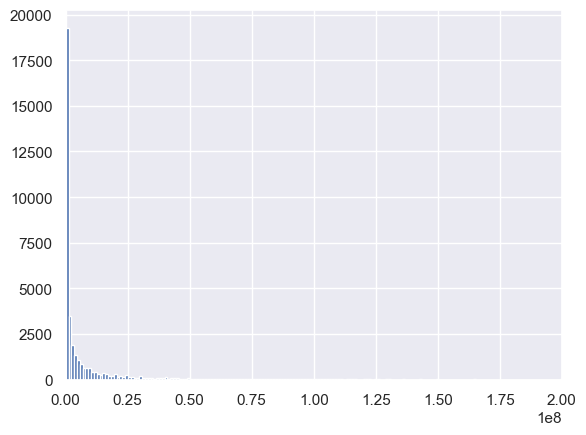

In [105]:
#Histogram of total funding aquired by the startups

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_org['funding_total_usd'], bins = 5000)
ax.set_xlim(left=0, right=200000000);

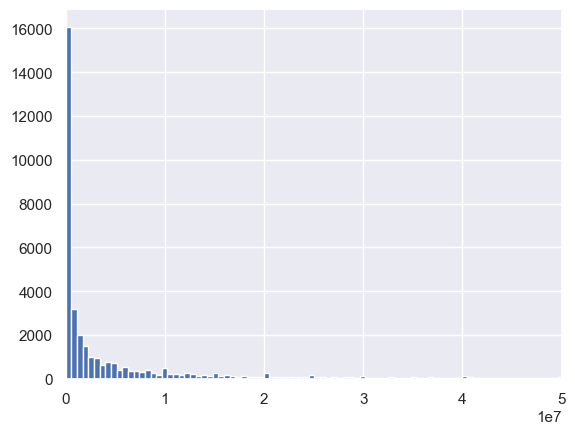

In [106]:
#Histogram of total funding aquired by the startups - zoom on the values smaller than 50000000 (50 mln USD)

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_org['funding_total_usd'], bins = 10000)
ax.set_xlim(left=0, right=50000000);

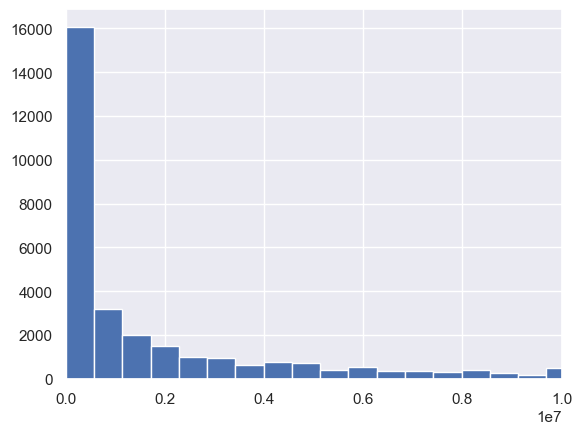

In [107]:
#Histogram of total funding aquired by the startups - zoom on the values smaller than 10000000 (10 mln USD)

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_org['funding_total_usd'], bins = 10000)
ax.set_xlim(left=0, right=10000000);

The distribution of the total funding aquired by the start-ups is highly positively skewed, with median 2.08 of million USD much lower than the mean value of 15.73 million USD. A significant 'long tail' can be observed, with startups receiving much more funding than the average - the maximal value of total funding received is equal to 5.7 bn USD. Most of the startups took part in one or two funding rounds.

#### Start-ups that aquired the most funding

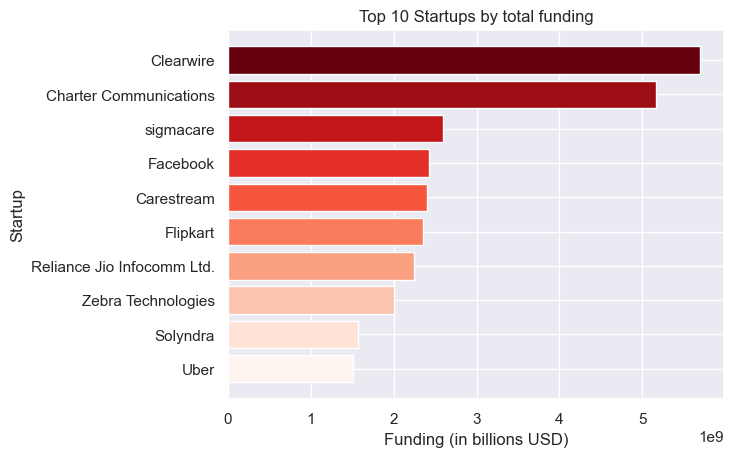

In [108]:
#Values of top 10 start-ups
top_10_startups = df_org.sort_values(by=['funding_total_usd'],ascending=False).head(10)
top_10_startups = top_10_startups.iloc[::-1]

#Create the bar plot
colors = plt.cm.get_cmap('Reds')(np.linspace(0, 1, len(top_10_startups)))
plt.barh(top_10_startups['name'], top_10_startups['funding_total_usd'], color=colors)
plt.xlabel('Funding (in billions USD)')
plt.ylabel('Startup')
plt.title('Top 10 Startups by total funding')
plt.show()

All the start-ups from the top 10 (in terms of total funding received) had raised funding exceeding 1 bn USD.

### 2.1.3 Status of the start-ups

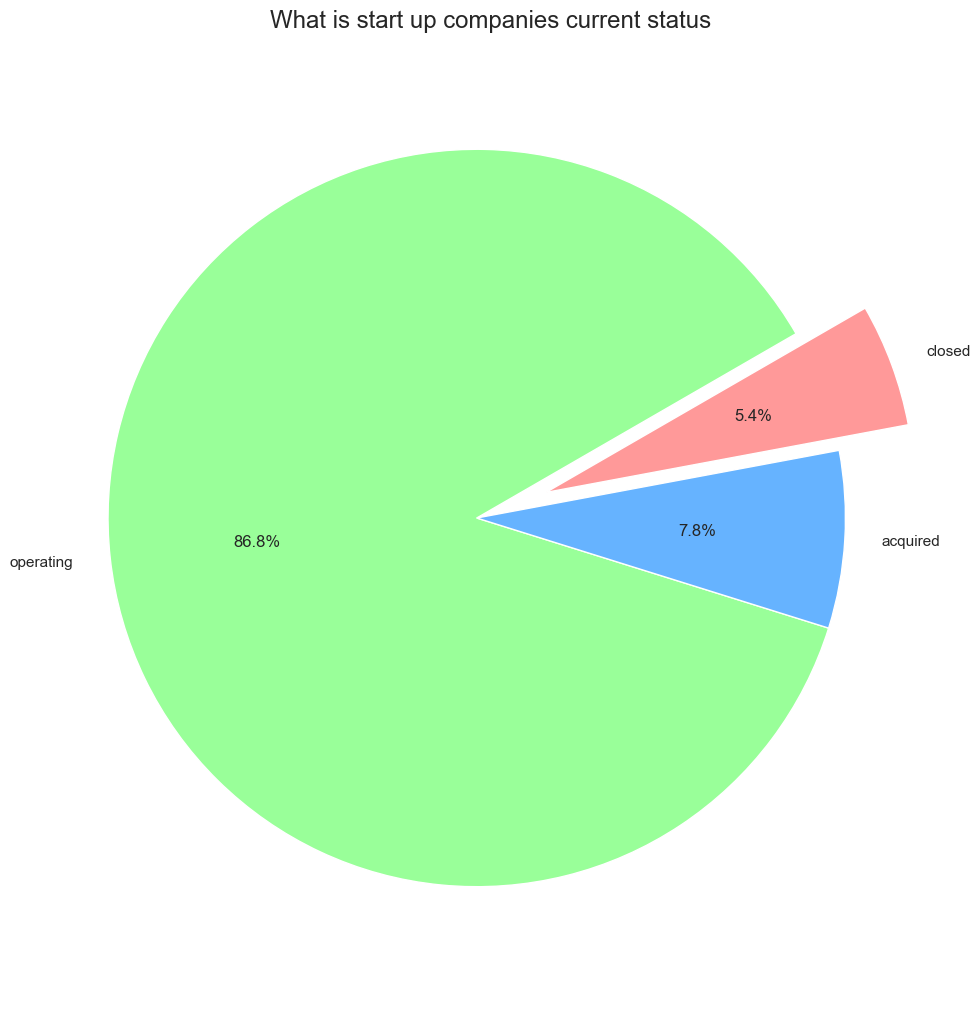

In [109]:
plt.rcParams['figure.figsize'] = 10,10
labels = df_org['status'].value_counts().index.tolist()
sizes = df_org['status'].value_counts().tolist()
explode = (0, 0, 0.2)
colors = ['#99ff99','#66b3ff','#ff9999']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("What is start up companies current status", fontdict=None, position= [0.48,1], size = 'x-large')
plt.show()

It can be noted that the majority of start-ups are still operating (as for 2015), and more companies were acquired than suspended their operations.

### 2.1.4 The most common markets (industries)

In [110]:
len(df_org['market'].unique())

735

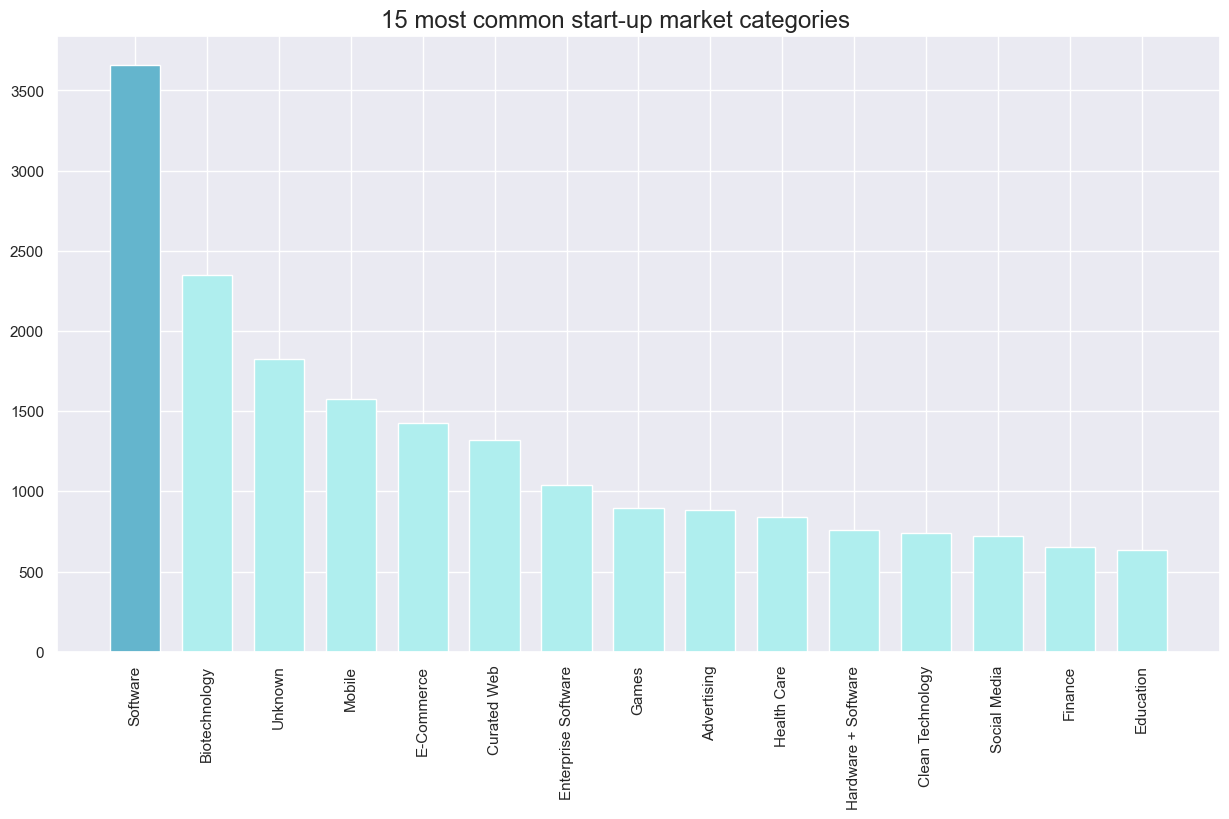

In [111]:
#Plot the 15 most common start-up market categories  
plt.rcParams['figure.figsize'] = 15,8
height = df_org['market'].value_counts()[:15].tolist()
bars =  df_org['market'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("15 most common start-up market categories", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [112]:
df_org['count'] = 1
country_market = df_org[['count','country_code','market']].groupby(['country_code','market']).agg({'count': 'sum'})
country_market_pct = country_market.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
country_market_pct.reset_index(inplace = True)

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\217426570.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  country_market_pct = country_market.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


In [113]:
USA_market_pct = country_market_pct[country_market_pct['country_code'] == "USA"]
USA_market_pct = USA_market_pct.sort_values('count',ascending = False)[0:10]

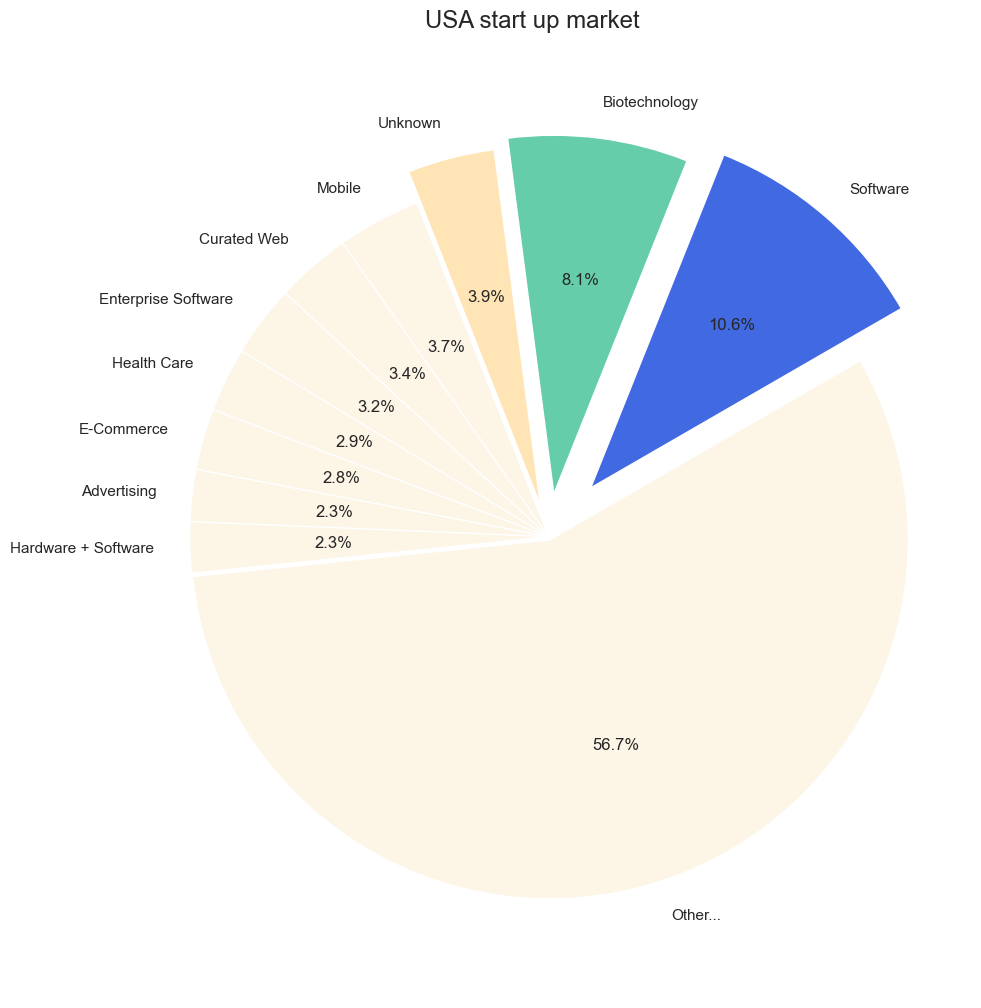

In [114]:
## Plot the breakdown of start-up market categories in the USA
plt.rcParams['figure.figsize'] =10,10
labels = list(USA_market_pct['market'])+['Other...']
sizes = list(USA_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['royalblue','mediumaquamarine','moccasin'] +['oldlace']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("USA start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()


On the charts above, the most common market categories for the global market and the American market were provided. Most of the startups both globally and on the US market were operating on Software, Biotechnology and Mobile markets.

#### The most successful start-ups (in terms of total funding raised)

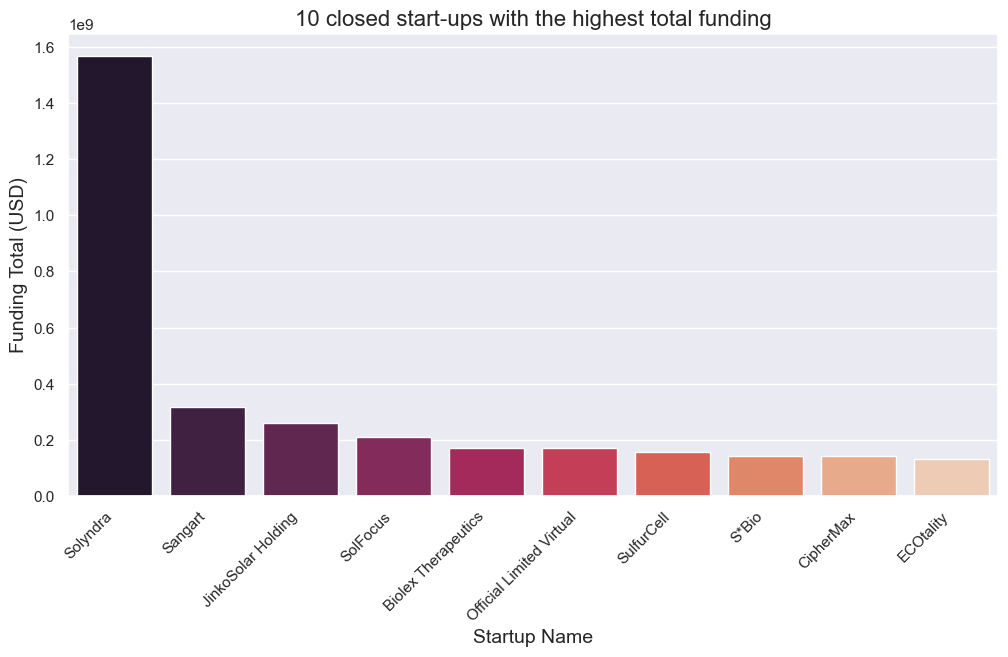

In [119]:
df_top = df_org[df_org['status']=='closed']
df_top10_top = df_fail.sort_values(by=['funding_total_usd'], ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='funding_total_usd', data=df_top10_top, palette='rocket')
plt.title('10 closed start-ups with the highest total funding', fontsize=16)
plt.xlabel('Startup Name', fontsize=14)
plt.ylabel('Funding Total (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

A great disproportion between groups of closed start-ups that aquired the most and the least fudning can be observed. The first group did not survive on the market despite the funding exceeding 100 million USD, whilst the second group acquired only a few thousand dollars in total.  

### 2.1.5 Total start-up funding compared to different benchmarks

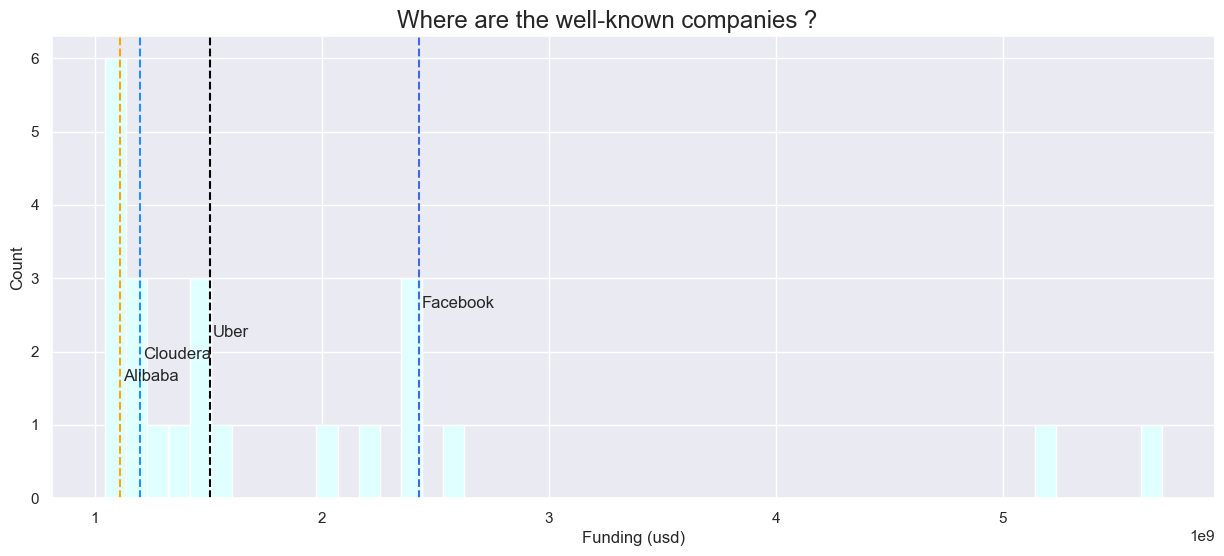

In [120]:
#Extract the total funding of the well-known companies 
Facebook_total_funding = df_org['funding_total_usd'][df_org['name']=="Facebook"].values[0]
Uber_total_funding = df_org['funding_total_usd'][df_org['name']=="Uber"].values[0]
Alibaba_total_funding = df_org['funding_total_usd'][df_org['name']=="Alibaba"].values[0]
Cloudera_total_funding = df_org['funding_total_usd'][df_org['name']=="Cloudera"].values[0]

plt.rcParams['figure.figsize'] = 15,6
plt.hist(df_org['funding_total_usd'][(df_org['funding_total_usd'] >= 1000000000)].dropna(), bins=50,color = 'lightcyan' )
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Where are the well-known companies ? ", fontdict=None, position= [0.48,1.05], size = 'x-large')

#Add the values the well-known companies benchmarks
plt.axvline(Facebook_total_funding,color='royalblue',linestyle ="--")
plt.text(Facebook_total_funding+15000000, 2.6,"Facebook")

plt.axvline(Uber_total_funding,color='black',linestyle ="--")
plt.text(Uber_total_funding+10000000, 2.2,"Uber")

plt.axvline(Cloudera_total_funding,color='dodgerblue',linestyle ="--")
plt.text(Cloudera_total_funding+10000000, 1.9,"Cloudera")

plt.axvline(Alibaba_total_funding,color='orange',linestyle ="--")
plt.text(Alibaba_total_funding+10000000, 1.6,"Alibaba")


plt.show()

Among the companies that received more than 1 bn USD total funding, the chosen well-known companies are not the leaders.  Facebook which is in the top 5 of companies that received the most funding, and Uber closes the top 10.

In [121]:
#Change the type of 'founded_at' column
df_org['founded_at'] = pd.to_datetime(df_org['founded_at'])

### 2.1.6 When the companies were founded?

In [122]:
df_org['founded_at'] = pd.to_datetime(df_org['founded_at'], errors = 'coerce' )

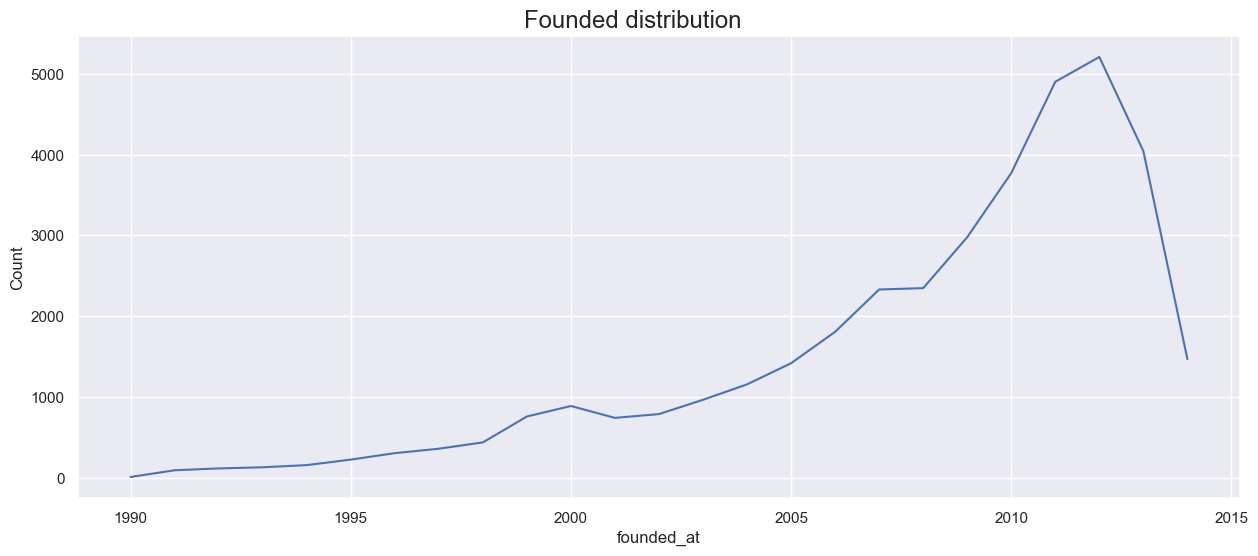

In [123]:
plt.rcParams['figure.figsize'] = 15,6
df_org['name'].groupby(df_org["founded_at"].dt.year).count().plot(kind="line")

plt.ylabel('Count')
plt.title("Founded distribution ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

Number of star-ups funded was growing till early 2010s, when it reached a peak and drasticly declined. The most companies were founded in 2011 and 2012.

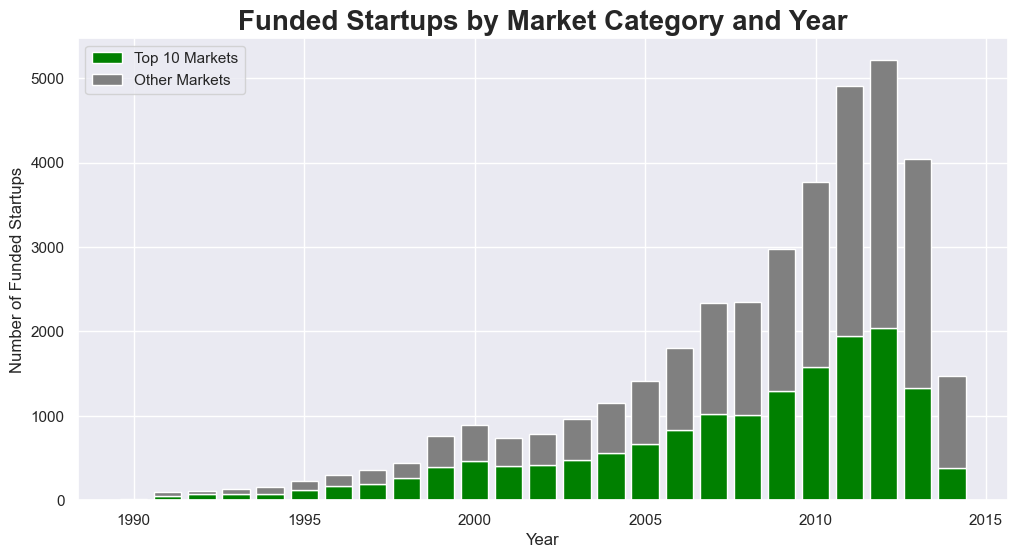

In [124]:

market_counts = df_org.groupby([df_org["founded_at"].dt.year, "market"])["name"].count().unstack(fill_value=0)
top_10_markets = market_counts.sum().nlargest(10).index.tolist()

#Additional column will represent categories outside the top 10, market as "other
market_counts["Other"] = market_counts.sum(axis=1) - market_counts[top_10_markets].sum(axis=1)

top_10_counts = market_counts[top_10_markets].sum(axis=1)
other_counts = market_counts["Other"]

# Plot it as a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_10_counts.index, top_10_counts, color="green", label="Top 10 Markets")
ax.bar(other_counts.index, other_counts, bottom=top_10_counts, color="gray", label="Other Markets")

#Labels and formatting
ax.set_xlabel("Year")
ax.set_ylabel("Number of Funded Startups")
ax.set_title("Funded Startups by Market Category and Year", fontdict={'fontsize': 20, 'fontweight': 'bold', 'verticalalignment': 'baseline'}, loc='center')
ax.legend()

plt.show()

It can be noted that the top 10 markets accound for a vast part of all start-ups count in a given year - in some years around to the half of all companies founded. 

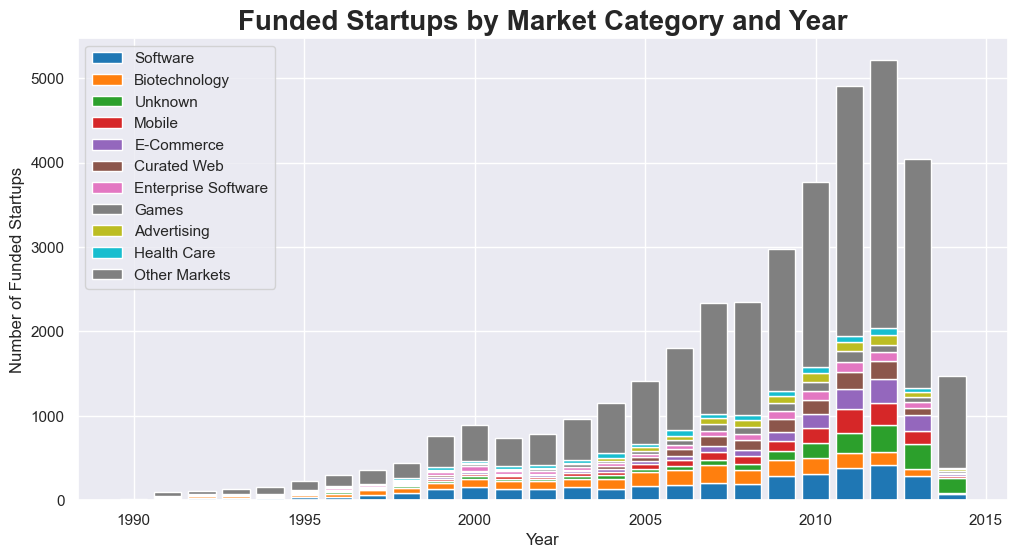

In [125]:
market_counts = df_org.groupby([df_org["founded_at"].dt.year, "market"])["name"].count().unstack(fill_value=0)

top_10_markets = market_counts.sum().nlargest(10).index.tolist()

for market in top_10_markets:
    market_counts[market] = market_counts[market] if market in market_counts.columns else 0
market_counts["Other"] = market_counts.sum(axis=1) - market_counts[top_10_markets].sum(axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

#Separate the top 10 market categories on the plot
market_colors = plt.get_cmap('tab10').colors
for i, market in enumerate(top_10_markets):
    ax.bar(market_counts.index, market_counts[market], bottom=market_counts[top_10_markets[:i]].sum(axis=1), color=market_colors[i], label=market)
ax.bar(market_counts.index, market_counts["Other"], bottom=market_counts[top_10_markets].sum(axis=1), color="gray", label="Other Markets")

# Labels and formatting
ax.set_xlabel("Year")
ax.set_ylabel("Number of Funded Startups")

ax.set_title("Funded Startups by Market Category and Year", fontdict={'fontsize': 20, 'fontweight': 'bold', 'verticalalignment': 'baseline'}, loc='center')

ax.legend()

plt.show()


By breaking down the top 10 industries, it can be observed that the share of Software and Biotechnology market has been very significant from late 1990's until 2014. From around 2005 till 2014 the number of start-ups founded and oriented on Mobile market has increased dynamicly. 

#### How many companies were founded yearly given the economic events

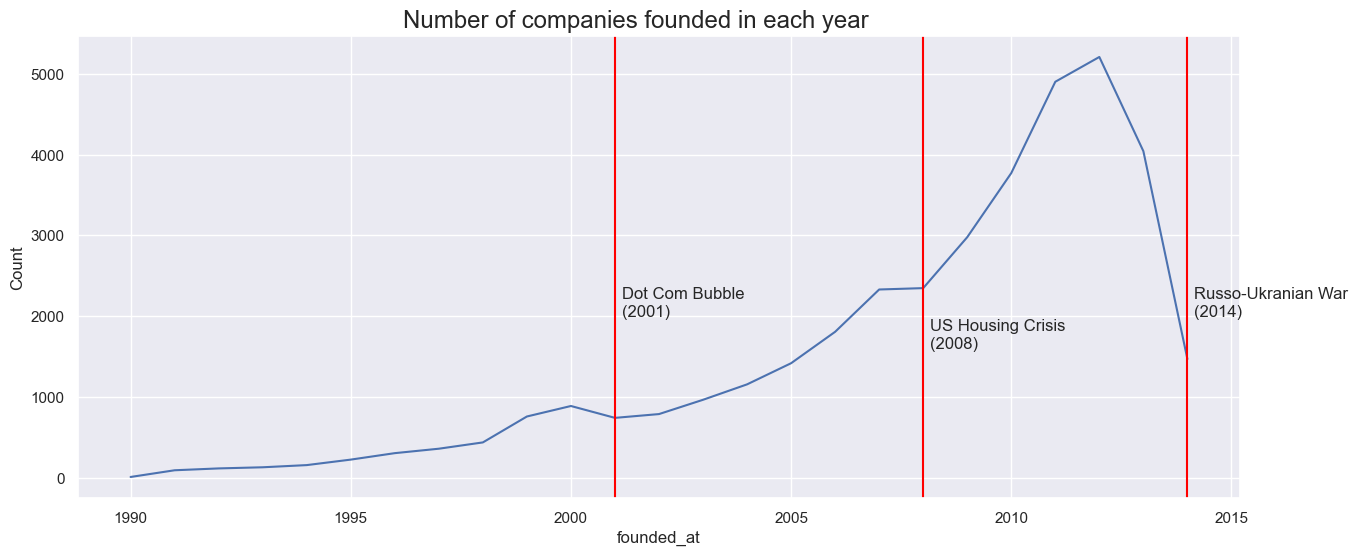

In [126]:
plt.rcParams['figure.figsize'] = 15,6
df_org['name'].groupby(df_org["founded_at"].dt.year).count().plot(kind="line")

plt.ylabel('Count')
plt.title("Number of companies founded in each year", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.axvline(2008,color='red')
plt.text(2008+0.15, 1600,"US Housing Crisis \n(2008)")
plt.axvline(2001,color='red')
plt.text(2001+0.15, 2000,"Dot Com Bubble \n(2001)")

plt.axvline(2014,color='red')
plt.text(2014+0.15, 2000,"Russo-Ukranian War \n(2014)")
plt.show()

As can be observed, all of the decline in number of start-ups founded happened at the same time as major global crises.

In [128]:
Facebook_founded_year = df_org['founded_at'][df_org['name']=="Facebook"].dt.year.values[0]
Uber_founded_year  = df_org['founded_at'][df_org['name']=="Uber"].dt.year.values[0]
Alibaba_founded_year  = df_org['founded_at'][df_org['name']=="Alibaba"].dt.year.values[0]

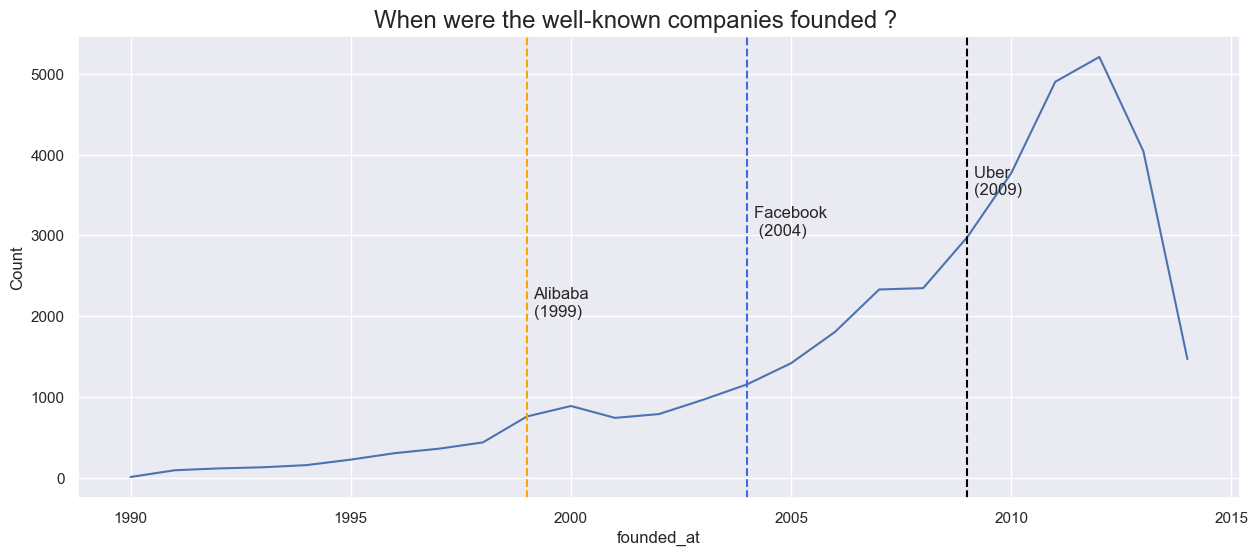

In [129]:
plt.rcParams['figure.figsize'] = 15,6
df_org['name'][df_org["founded_at"].dt.year >= 1990].groupby(df_org["founded_at"].dt.year).count().plot(kind="line")
plt.ylabel('Count')

plt.axvline(Facebook_founded_year,color='royalblue',linestyle ="--")
plt.text(Facebook_founded_year+0.15, 3000,"Facebook \n (2004)")

plt.axvline(Uber_founded_year,color='black',linestyle ="--")
plt.text(Uber_founded_year+0.15, 3500,"Uber \n(2009)")

plt.axvline(Alibaba_founded_year,color='orange',linestyle ="--")
plt.text(Alibaba_founded_year+0.15, 2000,"Alibaba \n(1999)")


plt.title("When were the well-known companies founded ?", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

### 2.1.7 Analysis of funding distribution grouped on yearly basis

In [130]:
df_org.groupby(df_org["founded_at"].dt.year)["funding_total_usd"].sum()

founded_at
1990      187836500
1991     4017930124
1992     2690839545
1993     7818240719
1994     3032152308
1995     6266378754
1996     6882358415
1997     7935087685
1998    11719911068
1999    20010261788
2000    20657148326
2001    20553107437
2002    20259339672
2003    28060654213
2004    35361527201
2005    37491681343
2006    36810380015
2007    49826937589
2008    30420981863
2009    31577318862
2010    28398149701
2011    25123069354
2012    19774950151
2013     9081116052
2014     1895980515
Name: funding_total_usd, dtype: int64

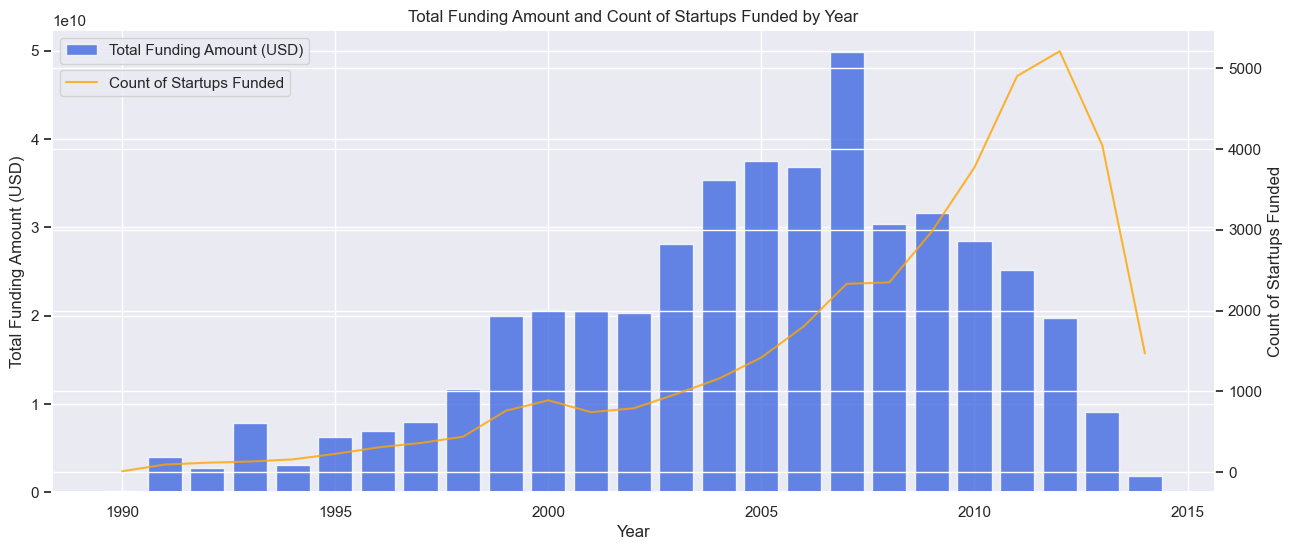

In [132]:
#Group by year
funding_by_year = df_org.groupby(df_org["founded_at"].dt.year)["funding_total_usd"].sum()
count_by_year = df_org.groupby(df_org["founded_at"].dt.year)["name"].count()
fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()

#Create a bar chart 
ax1.bar(funding_by_year.index, funding_by_year.values, color='royalblue', alpha=0.8)

#Labels and formatting
ax1.set_ylabel('Total Funding Amount (USD)')
ax2.plot(count_by_year.index, count_by_year.values, color='orange', alpha=0.8)
ax2.set_ylabel('Count of Startups Funded')
ax1.set_title('Total Funding Amount and Count of Startups Funded by Year')
ax1.set_xlabel('Year')
ax1.legend(['Total Funding Amount (USD)'], loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(['Count of Startups Funded'], loc='upper left', bbox_to_anchor=(0, 0.93))
plt.show()

It can be observed that the increase and decrease trends in the total amount of funding and count of start-ups go hand-in-hand. However, there seems to be a slight lagging in which the increase in total funding, is followed by an increase in the count a couple of years later. For example, the total funding reached its peak in 2007 whereas the count reached its peak in 2012.

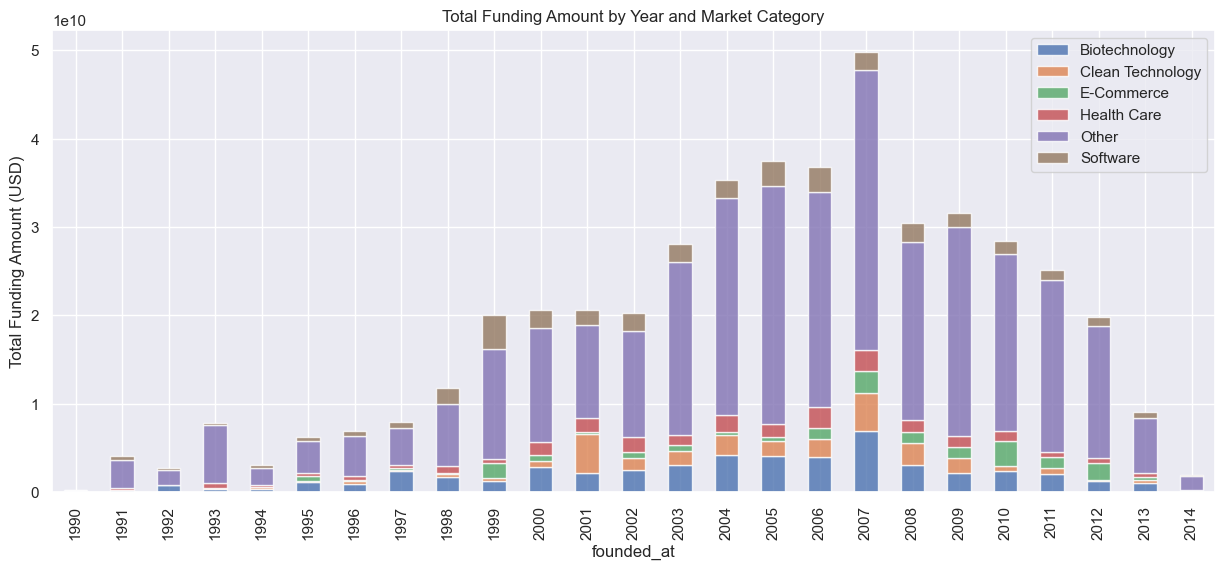

In [133]:
top_markets = df_org.groupby('market')['funding_total_usd'].sum().nlargest(5).index.tolist()
df_funding_by_year = df_org.groupby([df_org['founded_at'].dt.year, 'market'])['funding_total_usd'].sum().reset_index()
df_funding_by_year.loc[~df_funding_by_year['market'].isin(top_markets), 'market'] = 'Other'
df_funding_by_year = df_funding_by_year.groupby(['founded_at', 'market'])['funding_total_usd'].sum().unstack()
fig, ax = plt.subplots(figsize=(15,6))

# Plot it
df_funding_by_year.plot(kind='bar', stacked=True, ax=ax, alpha=0.8)
ax.set_ylabel('Total Funding Amount (USD)')

# Labels and formatiing
ax.set_title('Total Funding Amount by Year and Market Category')
ax.legend()
plt.show()


In [134]:
# Top invested categories, can be compared with the graph above including the total number of startups
df_org.groupby('market').sum()['funding_total_usd'].sort_values(ascending=False).head()

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\3823176633.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_org.groupby('market').sum()['funding_total_usd'].sort_values(ascending=False).head()


market
Biotechnology       50475008288
Software            33972237394
Clean Technology    26288381890
Health Care         22337304858
E-Commerce          18489802394
Name: funding_total_usd, dtype: int64

### Funding by country analyses

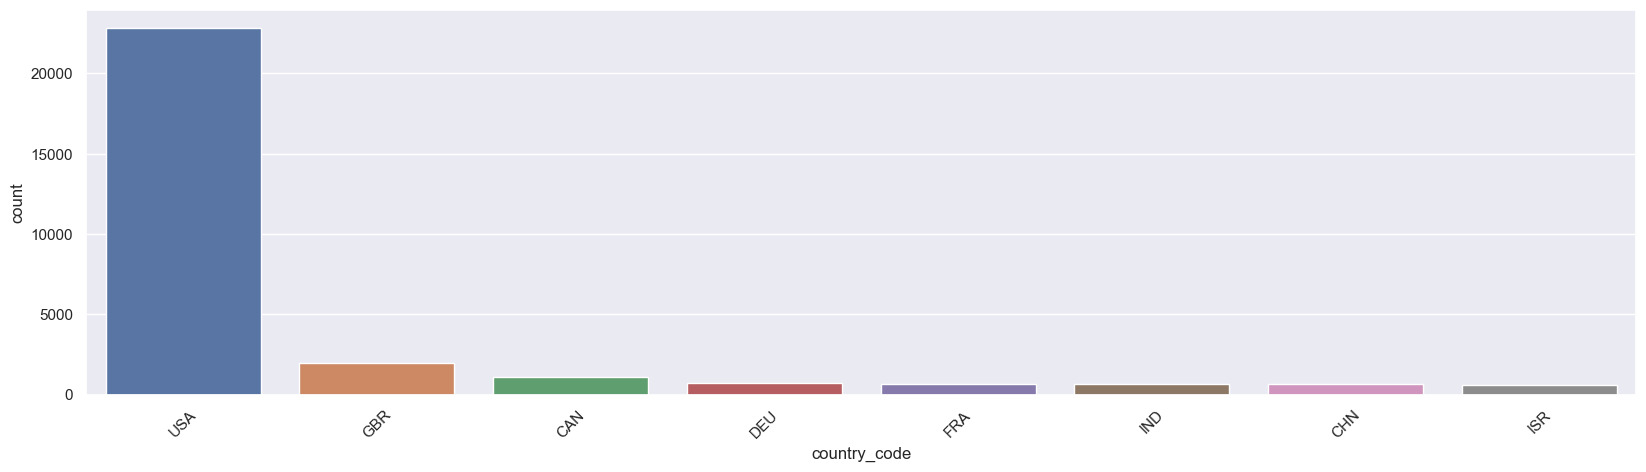

In [135]:
#Country
plt.figure(figsize=(20,5))
sns.countplot(x ='country_code', data = df_org, order=df_org['country_code'].value_counts().iloc[:8].index)
plt.xticks(rotation=45)
plt.show()

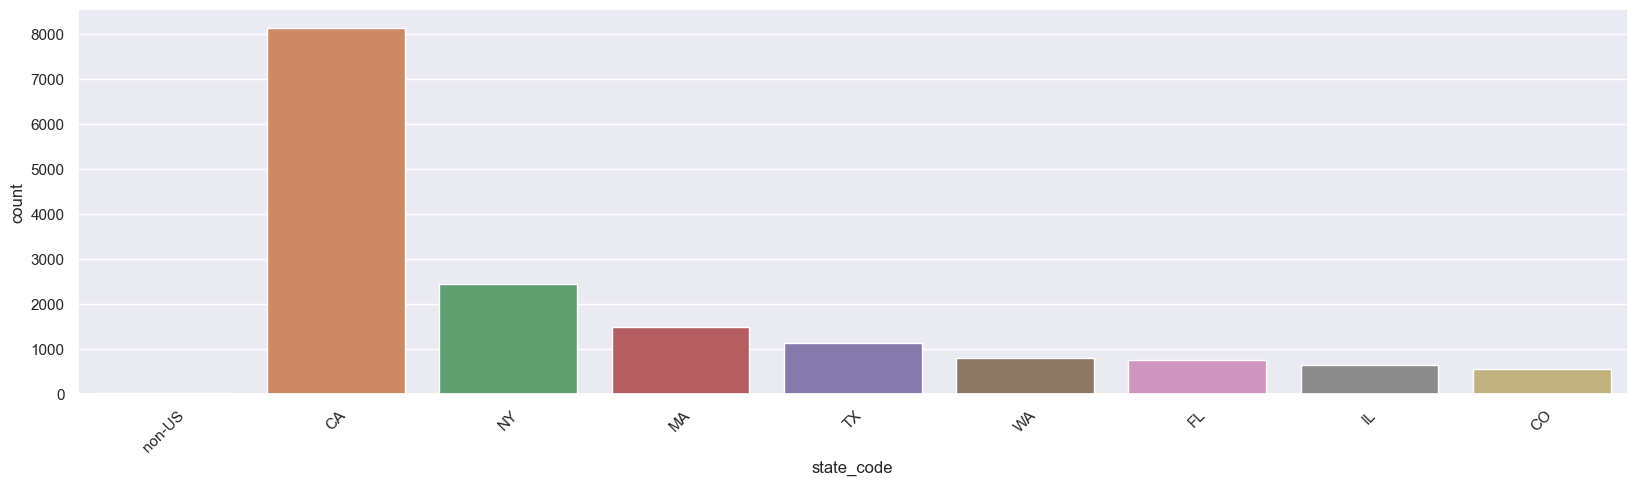

In [136]:
plt.figure(figsize=(20,5))
g = sns.countplot(x ='state_code', data = df_org[(df_org['country_code'] =='USA')], order=df_org['state_code'].value_counts().iloc[:9].index)
plt.xticks(rotation=45)
plt.show()

The US is the country in which most start-ups are founded. California leads by a great margin compared to the other states in the US.    

## 2.2 Rounds

In [137]:
df_rd.head(10)

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/organization/waywire,#waywire,|Entertainment|Politics|Social Media|News|,News,USA,NY,New York City,New York,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,NaN,2012-06-30 00:00:00,06,Q2,2012.0,1750000.0
1,/organization/tv-communications,&TV Communications,|Games|,Games,USA,CA,Los Angeles,Los Angeles,/funding-round/59a3669a64e39360c2b939300bcda162,venture,NaN,2010-09-23 00:00:00,09,Q3,2010.0,3000000.0
2,/organization/tv-communications,&TV Communications,|Games|,Games,USA,CA,Los Angeles,Los Angeles,/funding-round/86d22afc65107b6941e6c43c671ecbb8,venture,NaN,2010-06-04 00:00:00,06,Q2,2010.0,1000000.0
3,/organization/rock-your-paper,'Rock' Your Paper,|Publishing|Education|,Publishing,EST,NaN,Tallinn,Tallinn,/funding-round/f06b420775f7cb6c1541a9db526534bb,seed,NaN,2012-08-09 00:00:00,08,Q3,2012.0,40000.0
4,/organization/in-touch-network,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,GBR,NaN,London,London,/funding-round/33c3f135f05d7b734b8d7b7c8ae82647,seed,NaN,2011-04-01 00:00:00,04,Q2,2011.0,1500000.0
5,/organization/r-ranch-and-mine,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,USA,TX,Dallas,Fort Worth,/funding-round/029720f7eeb218f51c43df5155671472,equity_crowdfunding,NaN,2014-08-17 00:00:00,08,Q3,2014.0,10000.0
6,/organization/r-ranch-and-mine,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,USA,TX,Dallas,Fort Worth,/funding-round/766b0bcead9ca8560af5e1ade579fb7f,equity_crowdfunding,NaN,2014-09-26 00:00:00,09,Q3,2014.0,50000.0
7,/organization/club-domains,.Club Domains,|Software|,Software,USA,FL,Ft. Lauderdale,Oakland Park,/funding-round/aee671c9707f8278a9544c8ae37650e0,venture,B,2013-05-31 00:00:00,05,Q2,2013.0,7000000.0
8,/organization/fox-networks,.Fox Networks,|Advertising|,Advertising,ARG,NaN,Buenos Aires,Buenos Aires,/funding-round/69a1536a6f4506538afd7aa7241ddbe1,undisclosed,NaN,2007-01-16 00:00:00,01,Q1,2007.0,4912393.0
9,/organization/0-6-com,0-6.com,|Curated Web|,Curated Web,NaN,NaN,NaN,NaN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19 00:00:00,03,Q1,2008.0,2000000.0


### 2.2.1 Descriptive statistics

Compared to the organisations data frame, the variable 'raised_amount_usd' has got lower mean. The observation count is higher by around 2.5 times compared to organisations data frame. The standard devation is around 25% higher than for the organisations data frame. The median is slighly lower, while the maximal value is around 2 times higher.

In [138]:
df_rd.describe()

,funded_year,raised_amount_usd
count,83860.000000,7.103900e+04
mean,2011.018173,9.160854e+06
std,2.889240,9.657045e+07
min,1921.000000,0.000000e+00
25%,2010.000000,3.538865e+05
50%,2012.000000,1.700000e+06
75%,2013.000000,6.514874e+06
max,2015.000000,2.127194e+10


### 2.2.2 Funding aquired by the startups

The distribution of funding raised in a given round is a bit more skewed than the distribution of the toal funding, but the pattern is similar -  similar to a negative exponential distribution.

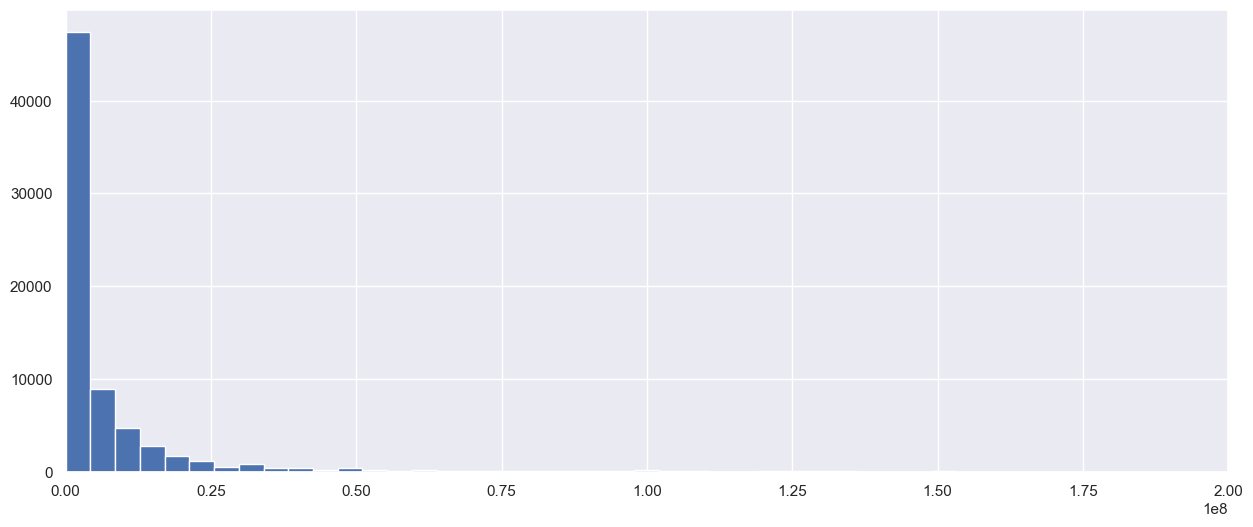

In [139]:
#Similar histogram as for organisations

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_rd['raised_amount_usd'], bins = 5000)
ax.set_xlim(left=0, right=200000000);

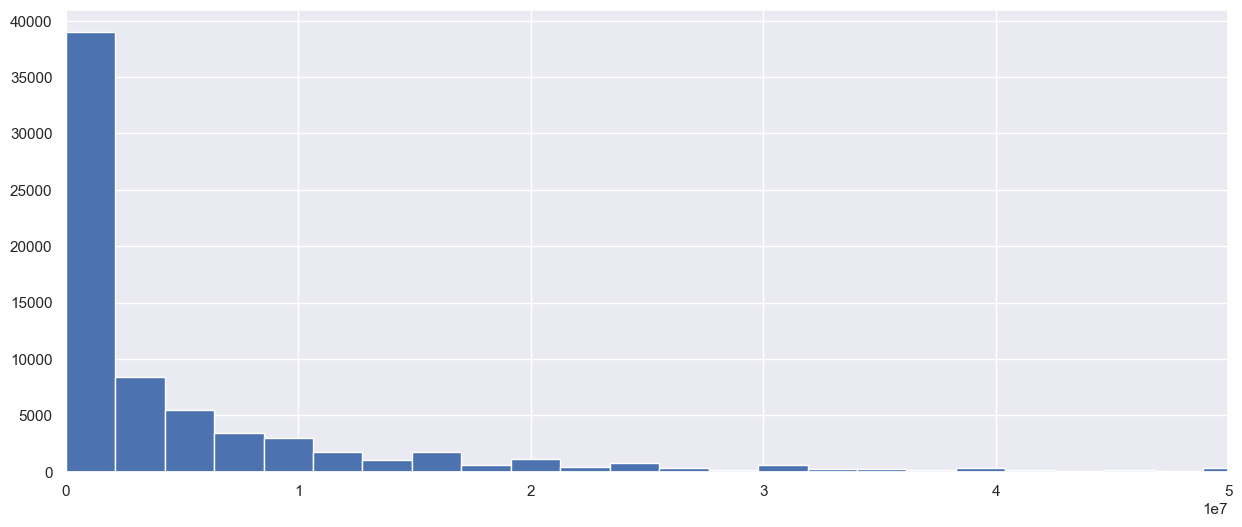

In [140]:
#Histogram of total funding aquired by the startups - zoom on the values smaller than 50000000 (50 mln USD)

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_rd['raised_amount_usd'], bins = 10000)
ax.set_xlim(left=0, right=50000000);

#### Start-ups that aquired the most funding

Verizon Communications, Sberbank and Chaler Communications received the most 

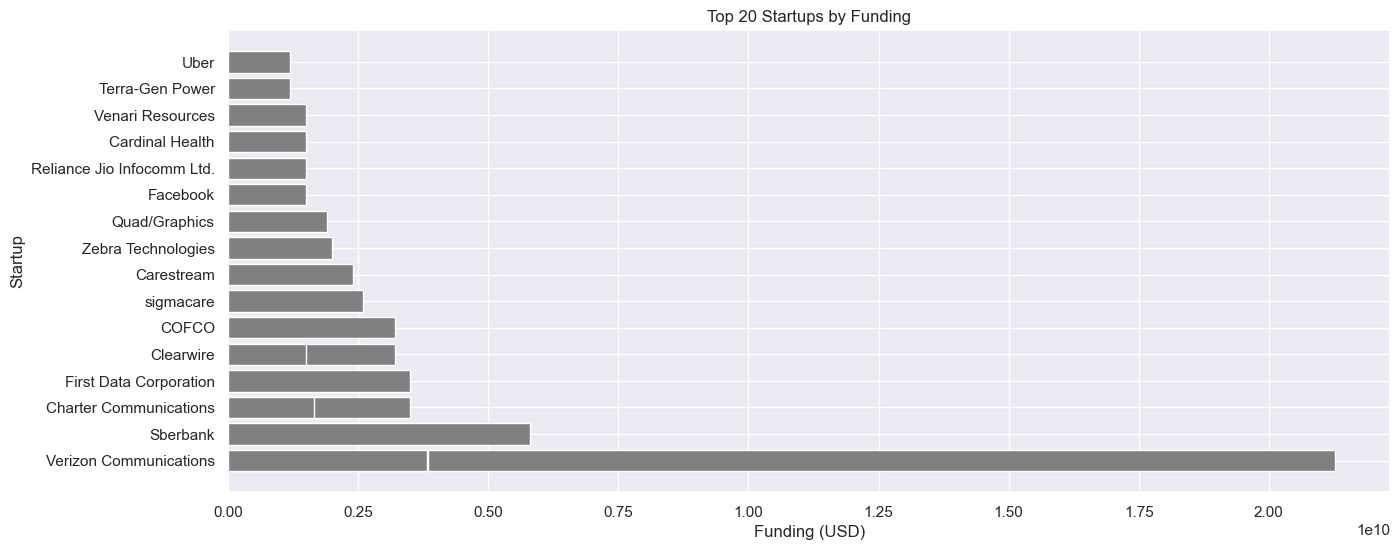

In [ ]:
# sort the data 
top = df_rd.sort_values(by=['raised_amount_usd'],ascending=False).head(20)

# Bar plot - horizontal
plt.barh(top['company_name'], top['raised_amount_usd'], color='grey')
plt.xlabel('Funding (USD)')
plt.ylabel('Startup')
plt.title('Top 20 Startups by Funding')
plt.show()

### 2.2.3 The most common markets (industries)

In [ ]:
len(df_rd['company_market'].unique())

754

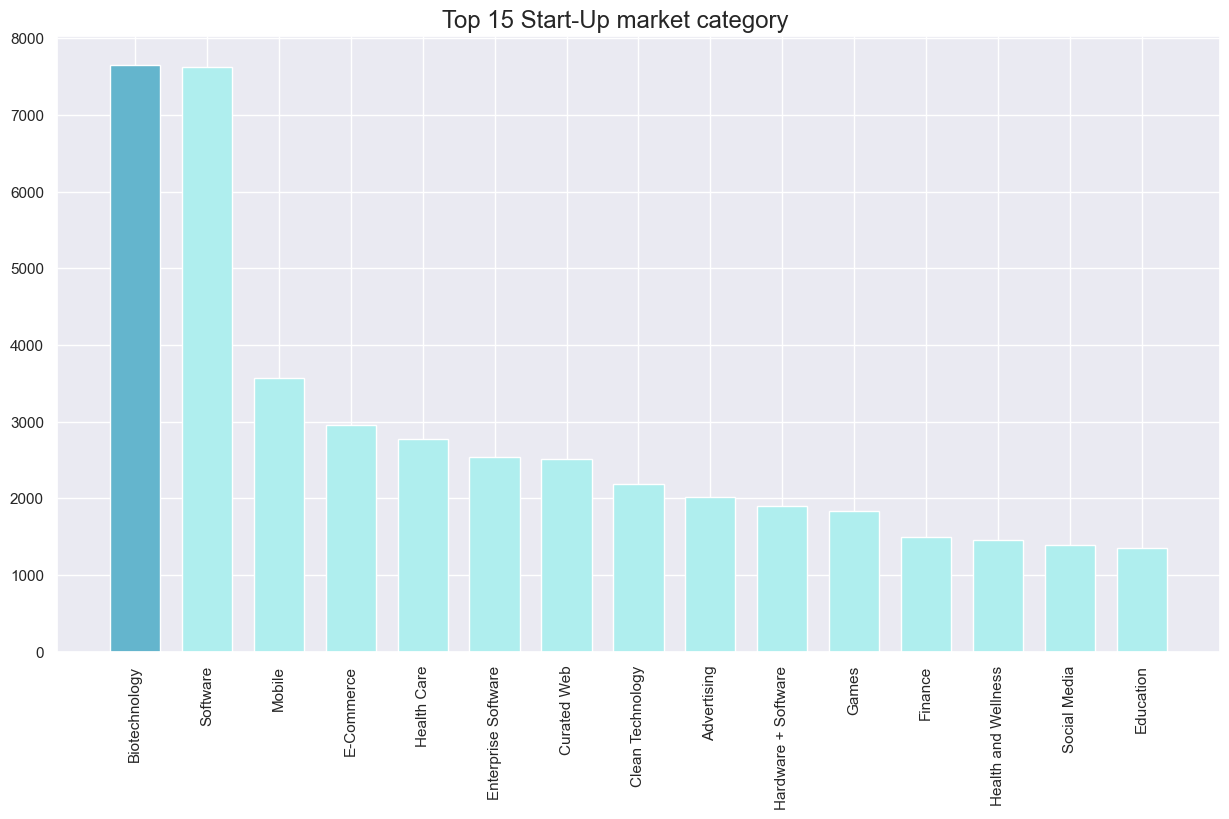

In [ ]:
plt.rcParams['figure.figsize'] = 15,8

height = df_rd['company_market'].value_counts()[:15].tolist()
bars =  df_rd['company_market'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 15 Start-Up market category", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

Compared to the total funding aquired, the biotechnology has got more funding than software. There are also other differences in the top categories. The values for each category are higher than in case of the organisation data frame.

In [ ]:
df_rd['count'] = 1
country_market = df_rd[['count','company_country_code','company_market']].groupby(['company_country_code','company_market']).agg({'count': 'sum'})
# Change: groupby state_office and divide by sum
country_market_pct = country_market.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
country_market_pct.reset_index(inplace = True)

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\65608281.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  country_market_pct = country_market.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


In [ ]:
USA_market_pct = country_market_pct[country_market_pct['company_country_code'] == "USA"]
USA_market_pct = USA_market_pct.sort_values('count',ascending = False)[0:10]

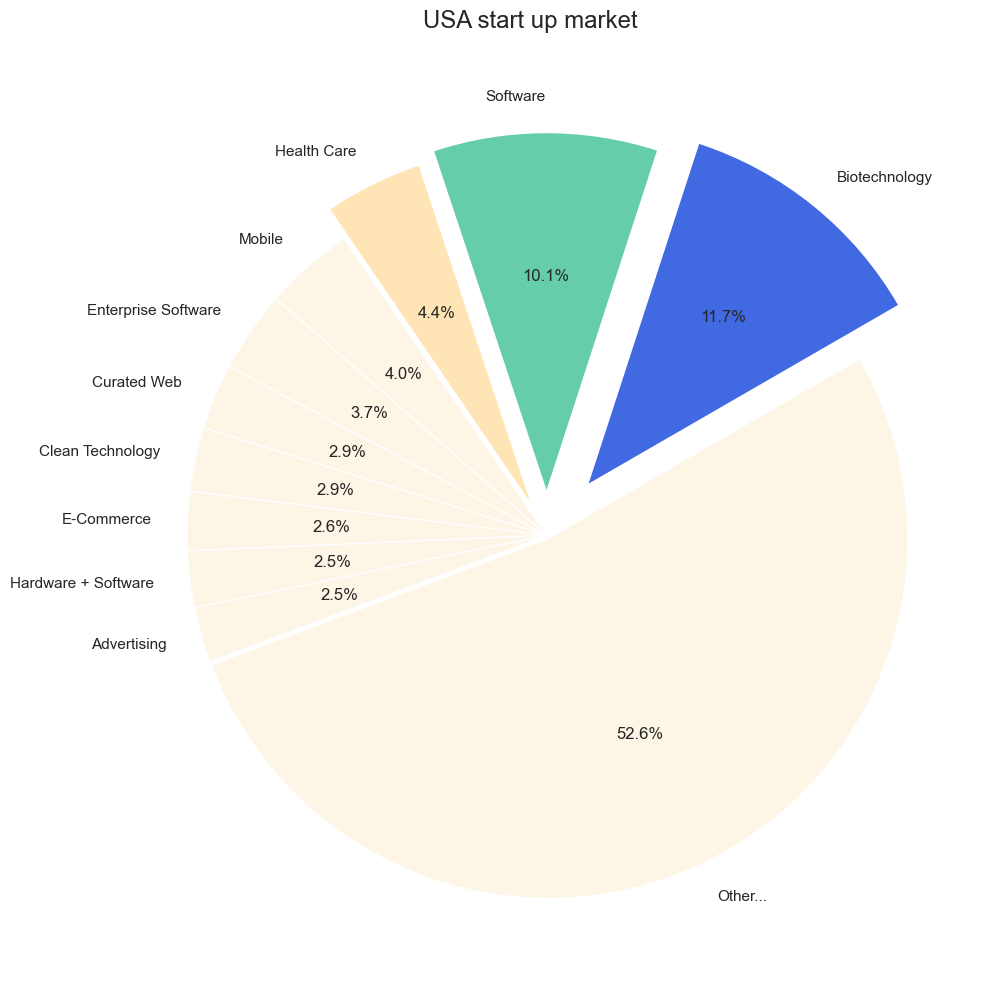

In [ ]:
## USA
plt.rcParams['figure.figsize'] =10,10
labels = list(USA_market_pct['company_market'])+['Other...']
sizes = list(USA_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['royalblue','mediumaquamarine','moccasin'] +['oldlace']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("USA start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()


The breakdown of funding on the American market leads to similar conclusions as the previous chart, presenting the worldwide breakdown of funding. Compared to the part 2.1, the biotechnology has got a higher share than software, the organisations' data inidcated the opposite. Also Health Care is on 3rd place, whilst it was on 6th position at the respective chart made on basis of the organisations data.    

### 2.2.4 Number of rounds by year and funding

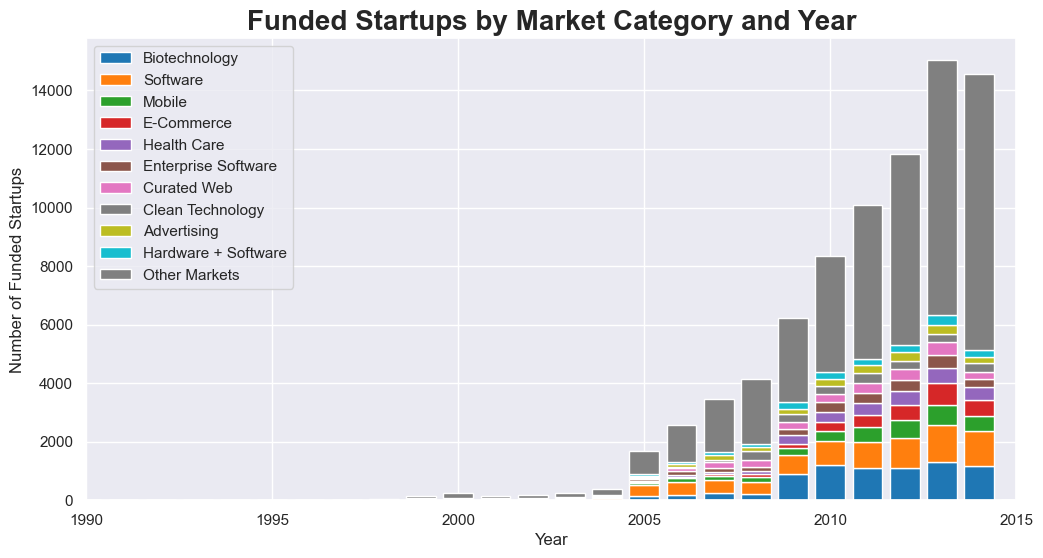

In [ ]:

market_counts = df_rd.groupby([df_rd["funded_year"], "company_market"])["company_name"].count().unstack(fill_value=0)
top_10_markets = market_counts.sum().nlargest(10).index.tolist()

for market in top_10_markets:
    market_counts[market] = market_counts[market] if market in market_counts.columns else 0
market_counts["Other"] = market_counts.sum(axis=1) - market_counts[top_10_markets].sum(axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

market_colors = plt.get_cmap('tab10').colors
for i, market in enumerate(top_10_markets):
    ax.bar(market_counts.index, market_counts[market], bottom=market_counts[top_10_markets[:i]].sum(axis=1), color=market_colors[i], label=market)
ax.bar(market_counts.index, market_counts["Other"], bottom=market_counts[top_10_markets].sum(axis=1), color="gray", label="Other Markets")


ax.set_xlabel("Year")
ax.set_ylabel("Number of Funded Startups")

ax.set_title("Funded Startups by Market Category and Year", fontdict={'fontsize': 20, 'fontweight': 'bold', 'verticalalignment': 'baseline'}, loc='center')
ax.set_xlim(left=1990)
ax.set_xlim(right=2015)

ax.legend()

plt.show()


Similar to the part 2.1, the Biotechnology, Software and Mobile are the main start-up markets. 

In [ ]:
df_rd.groupby('company_market').sum()['raised_amount_usd'].sort_values(ascending=False).head()

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\3741367596.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rd.groupby('company_market').sum()['raised_amount_usd'].sort_values(ascending=False).head()


company_market
Biotechnology       7.337290e+10
Mobile              4.947011e+10
Software            4.222748e+10
Clean Technology    3.761994e+10
Health Care         2.946608e+10
Name: raised_amount_usd, dtype: float64

### 2.2.5 Country Analyses

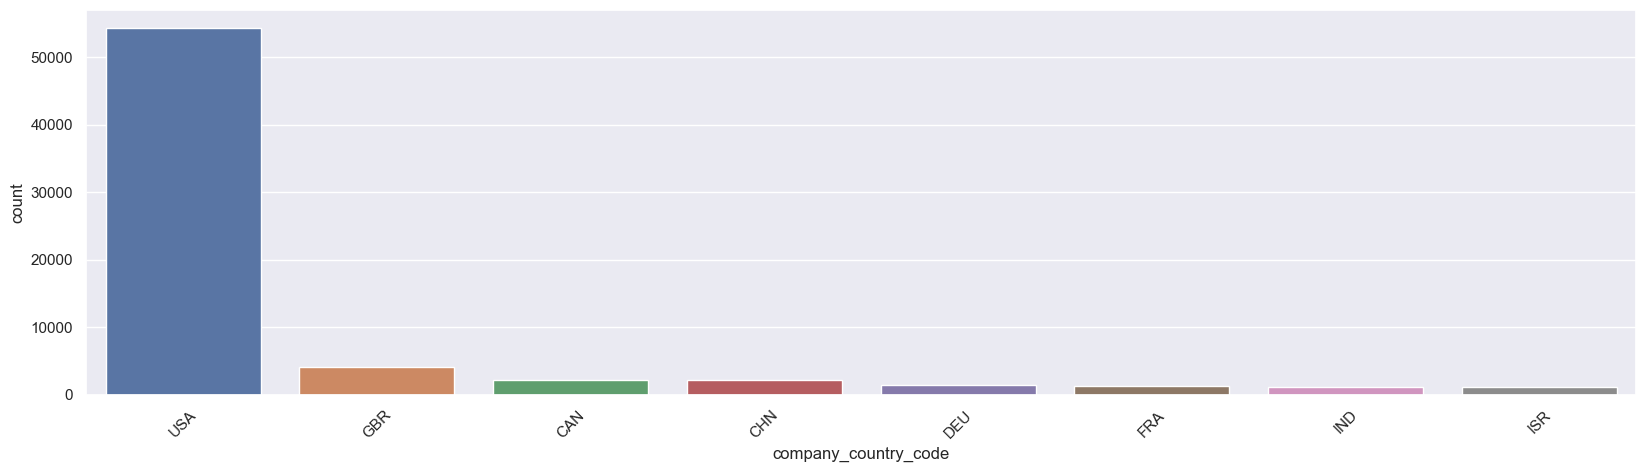

In [ ]:
#Country
plt.figure(figsize=(20,5))
sns.countplot(x ='company_country_code', data = df_rd, order=df_rd['company_country_code'].value_counts().iloc[:8].index)
plt.xticks(rotation=45)
plt.show()


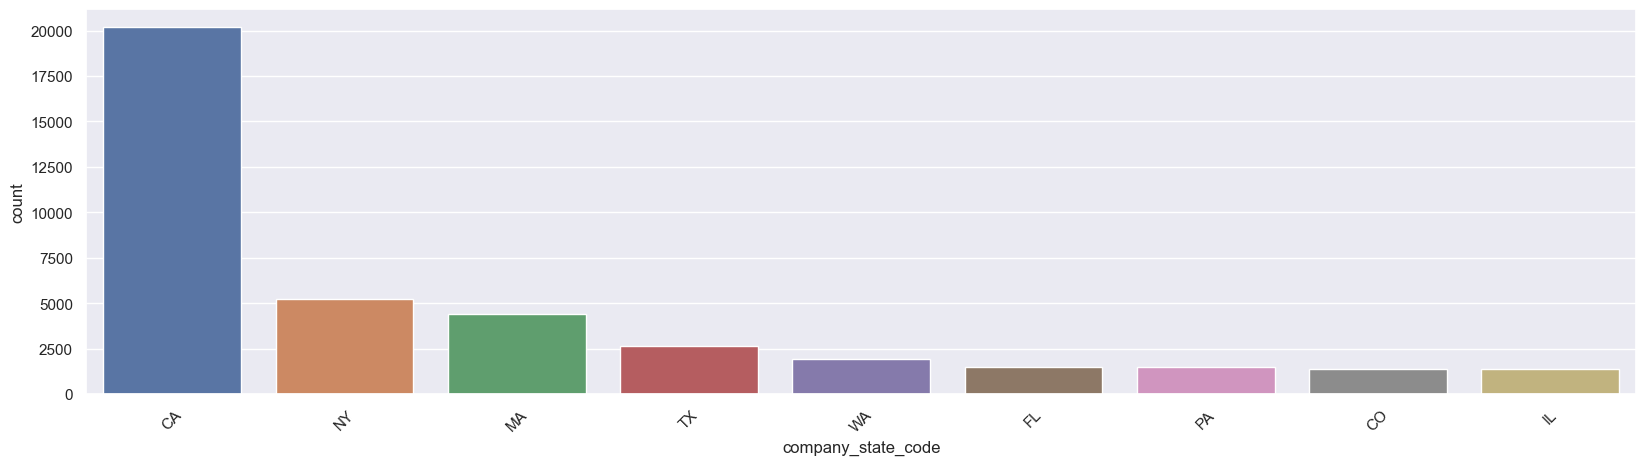

In [ ]:
plt.figure(figsize=(20,5))
g = sns.countplot(x ='company_state_code', data = df_rd[(df_rd['company_country_code'] =='USA')], order=df_rd['company_state_code'].value_counts().iloc[:9].index)
plt.xticks(rotation=45)
plt.show()


Similar to part 2.1, the US is the country in which most start-ups are founded. California leads by a great margin compared to the other states in the US.    

### 2.2.6 Funds raised depending on the round code and type

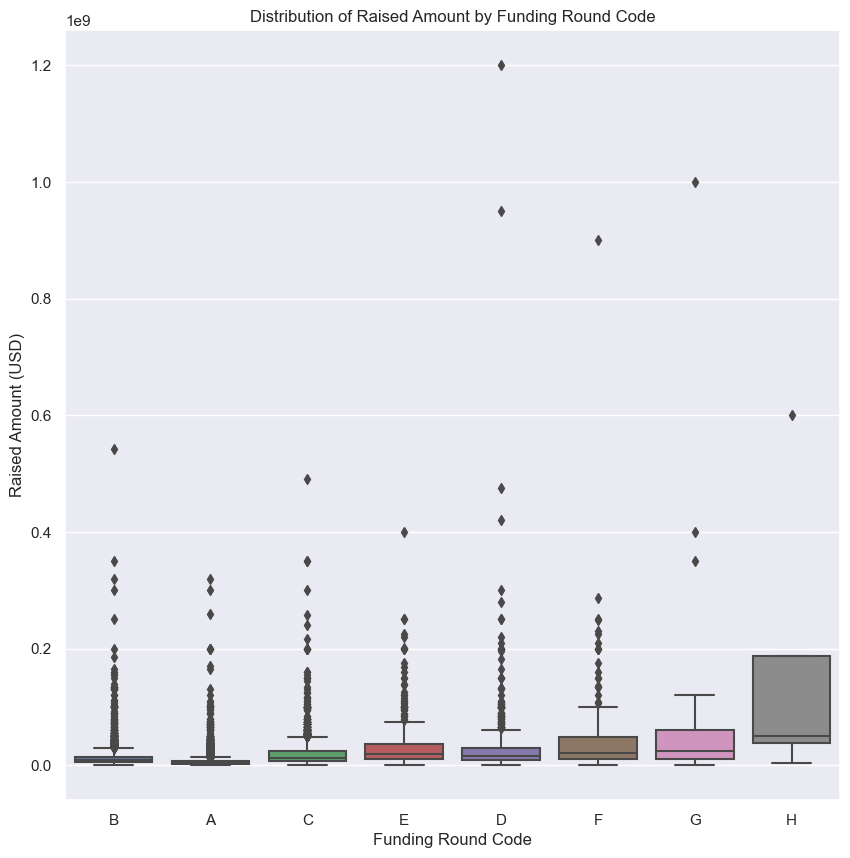

In [ ]:
sns.boxplot(x='funding_round_code', y='raised_amount_usd', data=df_rd)

plt.xlabel('Funding Round Code')
plt.ylabel('Raised Amount (USD)')
plt.title('Distribution of Raised Amount by Funding Round Code')
plt.show()

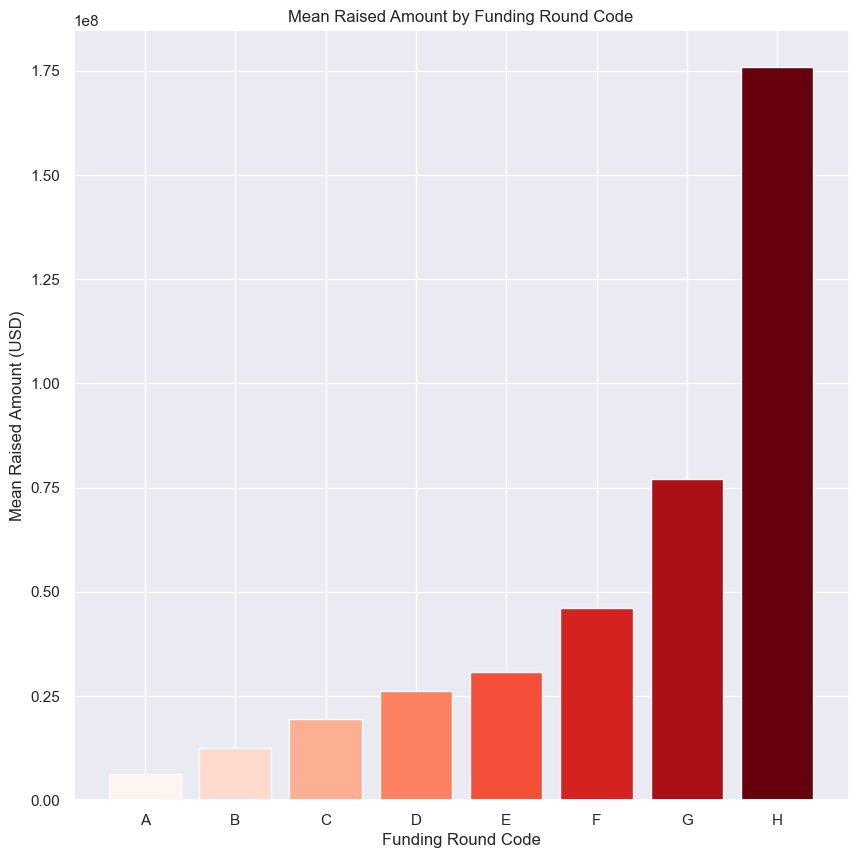

In [ ]:
#Group the data
grouped = df_rd.groupby('funding_round_code')['raised_amount_usd'].mean().reset_index()

##Create the plot
colors = plt.cm.Reds(np.linspace(0, 1, len(grouped)))
plt.bar(grouped['funding_round_code'], grouped['raised_amount_usd'], color=colors)

# Labels and formatting
plt.xlabel('Funding Round Code')
plt.ylabel('Mean Raised Amount (USD)')
plt.title('Mean Raised Amount by Funding Round Code')
plt.show()

The mean raised amount has grown exponentially from round A to round H.

#### Funding round types

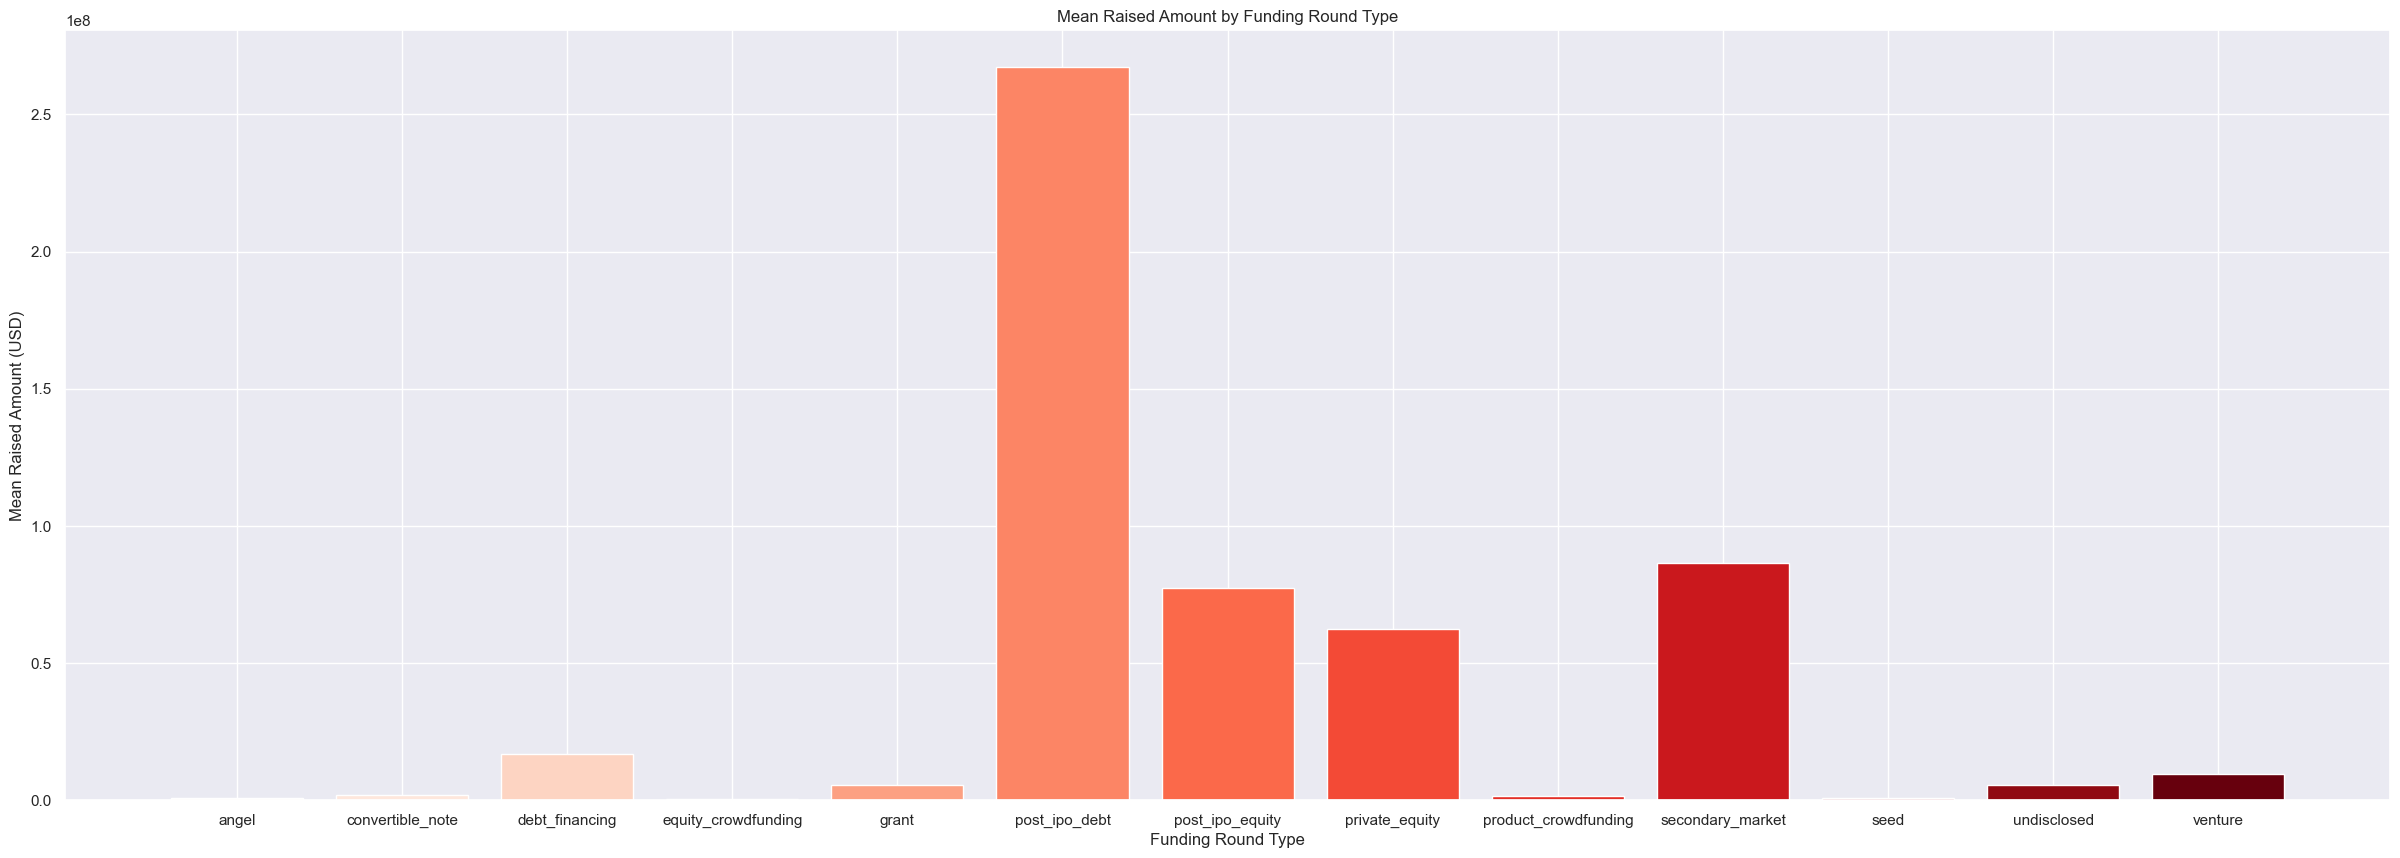

In [ ]:
#Group the data
grouped = df_rd.groupby('funding_round_type')['raised_amount_usd'].mean().reset_index()

# Create the plot
colors = plt.cm.Reds(np.linspace(0, 1, len(grouped)))
fig = plt.figure(figsize=(30, 10)) 
ax = fig.add_subplot(111)
ax.bar(grouped['funding_round_type'], grouped['raised_amount_usd'], color=colors)

# Formatring and labels
ax.set_xlabel('Funding Round Type')
ax.set_ylabel('Mean Raised Amount (USD)')
ax.set_title('Mean Raised Amount by Funding Round Type')
plt.show()

In rounds that were classified as the following types:
	
Post IPO Debt

Secondary Market

Post IPO Equity

Private Equity

the mean raised amount was substantially higher than among other types.

## 2.3 Investments

In [ ]:
df_inv.head(10)

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_list,investor_market,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/organization/test-company-3,test company,NaN,NaN,ARE,NaN,Dubai,Dubai,/person/jamessss-bondddd,jamessss bondddd,NaN,NaN,NaN,NaN,NaN,NaN,/funding-round/c308019016ead7afb2a1d117018eb6fc,seed,NaN,1921-09-01,09,Q3,1921-01-01,1000.0
1,/organization/andrewburnett-com-ltd,AndrewBurnett.com Ltd,|Internet|SEO|Services|Public Relations|Social...,Internet,GBR,NaN,Edinburgh,Edinburgh,/organization/ekaf,Ekaf,NaN,NaN,NaN,NaN,NaN,NaN,/funding-round/14fe2864e02d0f15ddc3ec8eacdc8e1b,seed,NaN,1974-01-01,01,Q1,1974-01-01,NaN
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,NaN,NaN,NaN,NaN,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,01,Q1,1979-01-01,1000000.0
3,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,NaN,NaN,NaN,NaN,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,01,Q1,1979-01-01,1000000.0
4,/organization/ikro,Ikro,NaN,NaN,BRA,NaN,BRA - Other,Canoas,/organization/crp-companhia-de-participacoes,CRP Companhia de Participações,NaN,NaN,NaN,NaN,NaN,NaN,/funding-round/46c353a8249170cc4b6ab89a522fefdc,venture,A,1982-06-01,06,Q2,1982-01-01,724000.0
5,/organization/laborat-rios-noli,Laboratórios Noli,NaN,NaN,BRA,NaN,Porto Alegre,Porto Alegre,/organization/crp-companhia-de-participacoes,CRP Companhia de Participações,NaN,NaN,NaN,NaN,NaN,NaN,/funding-round/5bdff09243b72f7fb325146259880e93,venture,A,1982-12-01,12,Q4,1982-01-01,155000.0
6,/organization/indelsul,Indelsul,NaN,NaN,NaN,NaN,NaN,NaN,/organization/crp-companhia-de-participacoes,CRP Companhia de Participações,NaN,NaN,NaN,NaN,NaN,NaN,/funding-round/48e8db0d90f95934831603622cb3f46a,venture,A,1982-12-01,12,Q4,1982-01-01,165000.0
7,/organization/polimax,Polimax,NaN,NaN,NaN,NaN,NaN,NaN,/organization/crp-companhia-de-participacoes,CRP Companhia de Participações,NaN,NaN,NaN,NaN,NaN,NaN,/funding-round/b046f5d59bc7a5bc86ddfb69c70adf77,venture,A,1983-06-01,06,Q2,1983-01-01,94000.0
8,/organization/lenovo,Lenovo,|Hardware|,Hardware,USA,NC,Raleigh,Morrisville,/organization/chinese-academy-of-sciences,Chinese Academy Of Sciences,|Education|,Education,CHN,NaN,Beijing,Beijing,/funding-round/0f444f3fdb0c1058aa70eeba9f0f5089,undisclosed,NaN,1984-01-01,01,Q1,1984-01-01,NaN
9,/organization/mixertech,Mixertech,NaN,NaN,NaN,NaN,NaN,NaN,/organization/crp-companhia-de-participacoes,CRP Companhia de Participações,NaN,NaN,NaN,NaN,NaN,NaN,/funding-round/4316813c5da6e06f2a15fa25c7946a73,venture,A,1984-05-01,05,Q2,1984-01-01,NaN


### 2.3.1 Descriptive statistics

In [ ]:
df_inv.describe()

,raised_amount_usd
count,1.011550e+05
mean,1.266338e+07
std,4.724041e+07
min,0.000000e+00
25%,1.200000e+06
50%,4.600000e+06
75%,1.300000e+07
max,5.800000e+09


### 2.3.2 Funding aquired by the startups

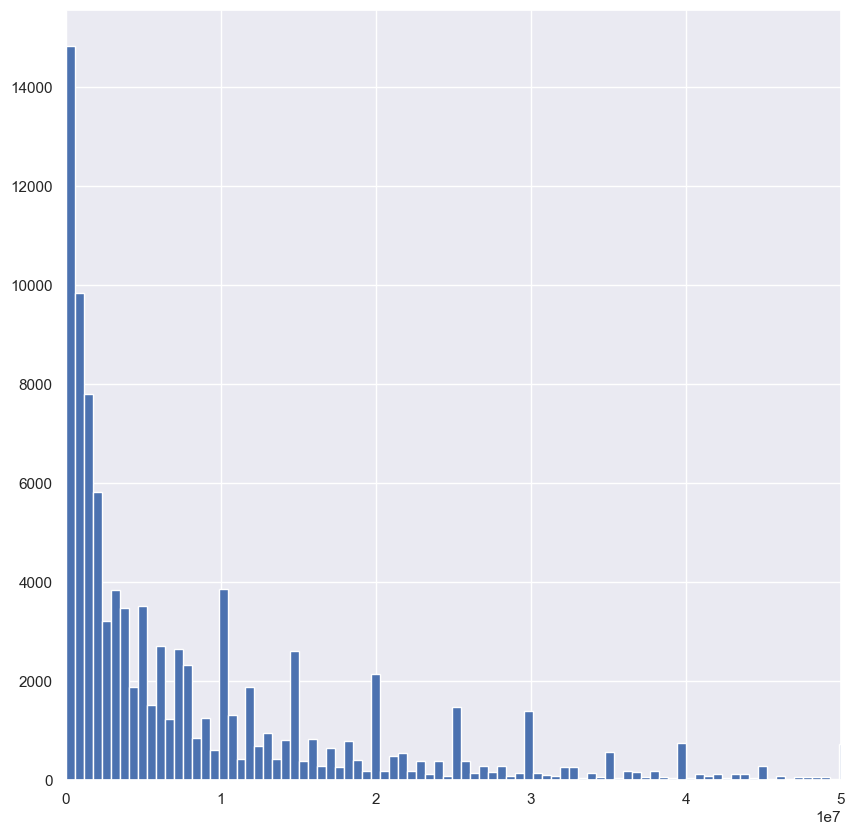

In [156]:
#Histogram of total funding aquired by the startups - zoom on the values smaller than 50000000 (50 mln USD)

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_inv['raised_amount_usd'], bins = 10000)
ax.set_xlim(left=0, right=50000000);

The distribution of the investments is similar to the distributions presented in parts 2.1 and 2.2. A slighly higher number of relatevely big investments can be observed. 

### 2.3.3 Investments over time and by market category

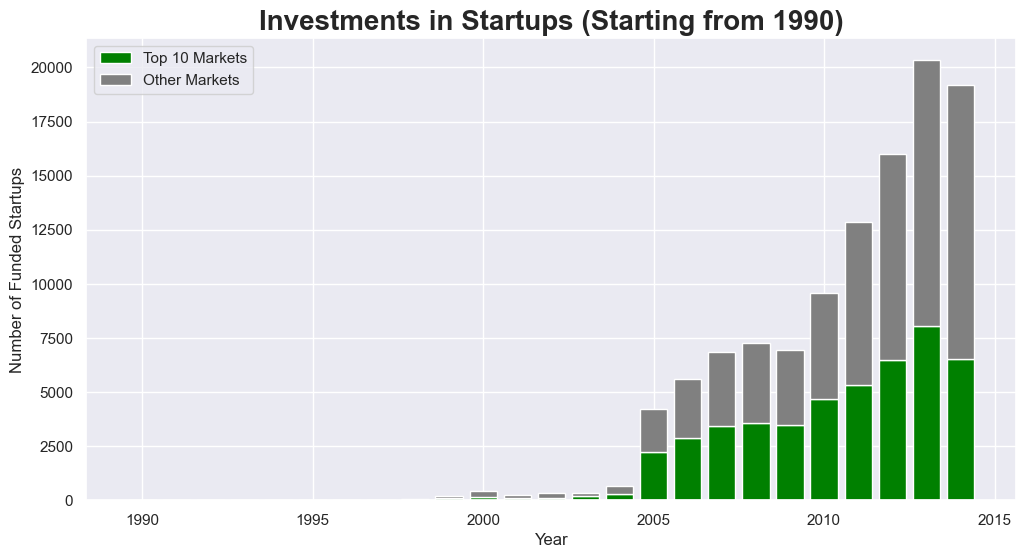

In [157]:
df_inv_1990 = df_inv[df_inv["funded_at"].dt.year >= 1990]
market_counts = df_inv_1990.groupby([df_inv_1990["funded_at"].dt.year, "company_market"])["company_name"].count().unstack(fill_value=0)
top_5_markets = market_counts.sum().nlargest(10).index.tolist()
market_counts["Other"] = market_counts.sum(axis=1) - market_counts[top_5_markets].sum(axis=1)
top_5_counts = market_counts[top_5_markets].sum(axis=1)
other_counts = market_counts["Other"]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_5_counts.index, top_5_counts, color="green", label="Top 10 Markets")
ax.bar(other_counts.index, other_counts, bottom=top_5_counts, color="gray", label="Other Markets")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Funded Startups")
ax.set_title("Investments in Startups (Starting from 1990)", fontdict={'fontsize': 20, 'fontweight': 'bold', 'verticalalignment': 'baseline'}, loc='center')
ax.legend()
plt.show()

The trend corresponds to the observations made in the previous part dedicated to the funding rounds. After 2004 the number of investments has increased dynamically.

#### Different market categories

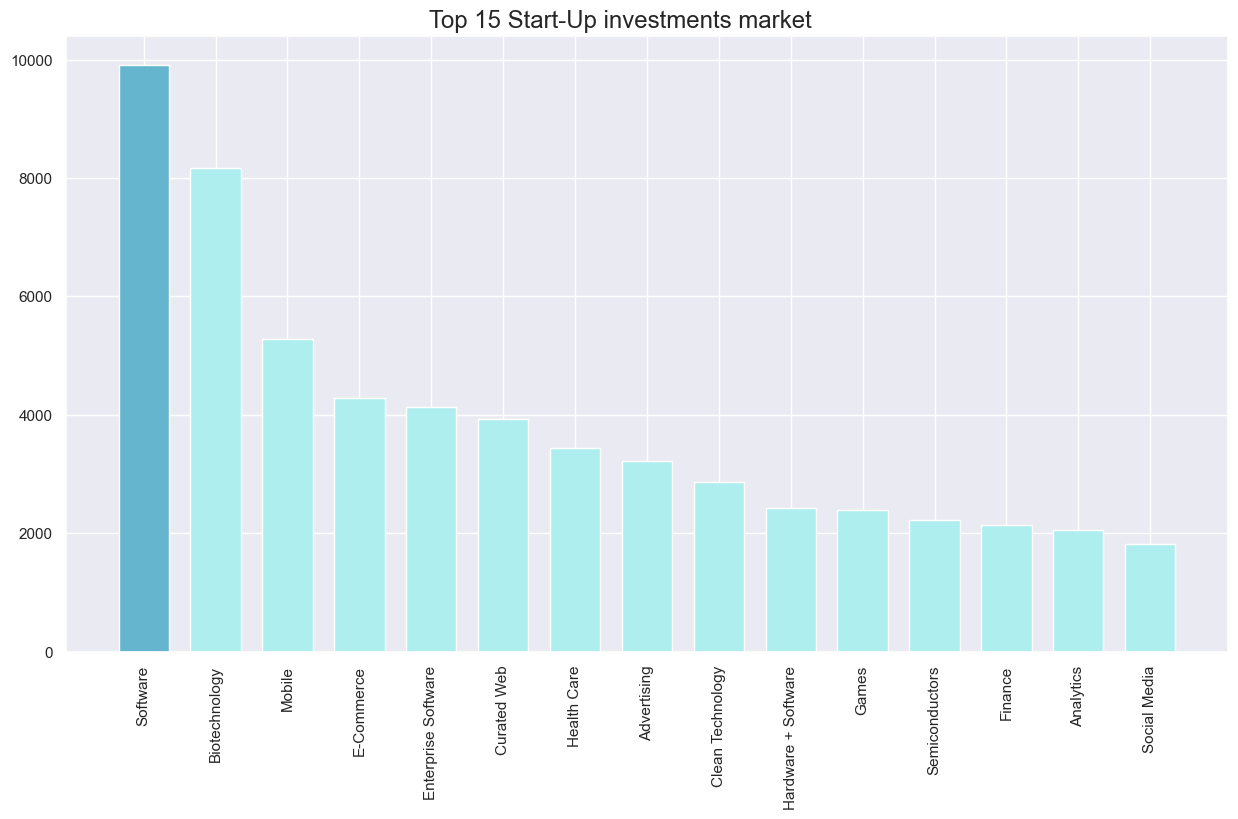

In [158]:
plt.rcParams['figure.figsize'] = 15,8

height = df_inv['company_market'].value_counts()[:15].tolist()
bars =  df_inv['company_market'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 15 Start-Up investments market ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

The top markets for investments are Software, Biotechnology and Mobile, as in the previous sections. 

### 2.3.4 Investments by country

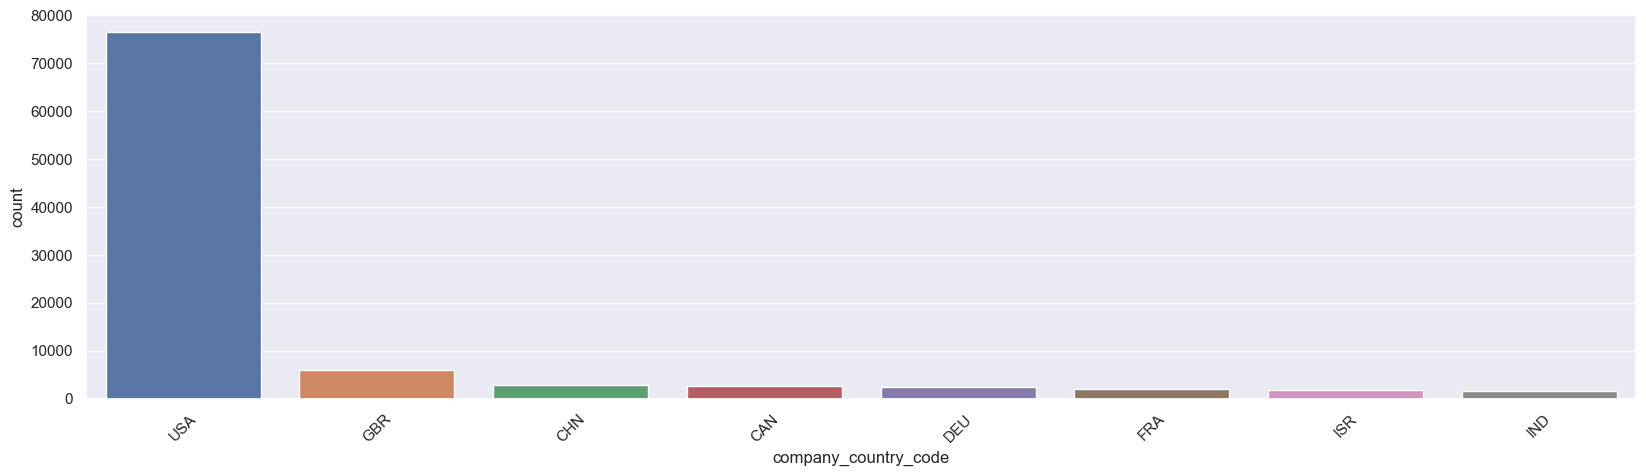

In [159]:
#Country
plt.figure(figsize=(20,5))
sns.countplot(x ='company_country_code', data = df_inv, order=df_inv['company_country_code'].value_counts().iloc[:8].index)
plt.xticks(rotation=45)
plt.show()

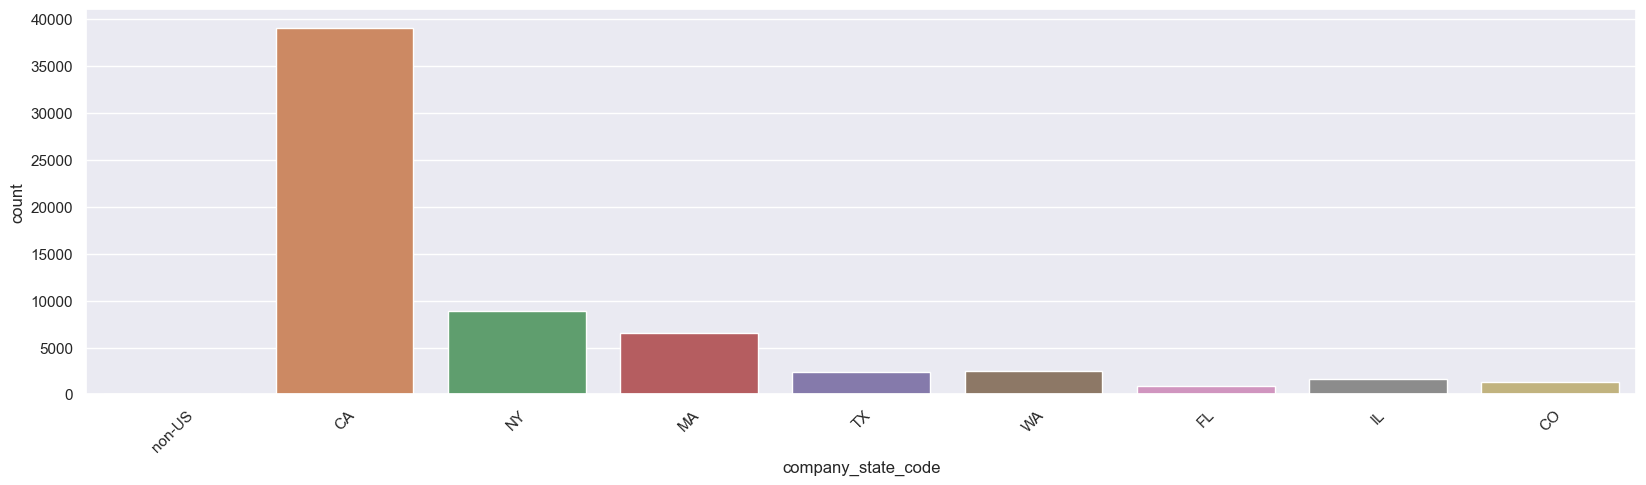

In [160]:
plt.figure(figsize=(20,5))
g = sns.countplot(x ='company_state_code', data = df_inv[(df_inv['company_country_code'] =='USA')], order=df_org['state_code'].value_counts().iloc[:9].index)
plt.xticks(rotation=45)
plt.show()

Similar to parts 2.1 and 2.2, the US is the country in which most start-ups are founded. California leads by a great margin compared to the other states in the US.  

## 2.4 Acquisitions

In [161]:
df_aq.head(10)

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_market,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,acquired_quarter,acquired_year,price_amount,price_currency_code
0,/organization/waywire,#waywire,|Entertainment|Politics|Social Media|News|,News,USA,NY,New York City,New York,/organization/magnify,Waywire Networks,|Curated Web|Video|,Curated Web,USA,NY,New York City,New York,2013-10-17,10,Q4,2013-01-01,NaN,USD
1,/organization/fluff-friends,(fluff)Friends,NaN,NaN,NaN,NaN,NaN,NaN,/organization/social-gaming-network,SGN (Social Gaming Network),|Games|,Games,USA,CA,Los Angeles,Beverly Hills,2008-09-16,09,Q3,2008-01-01,NaN,USD
2,/organization/red,(RED),|Nonprofits|,Nonprofits,USA,NY,New York City,New York,/organization/nationstar-mortgage-holdings,Nationstar Mortgage Holdings,|Finance|,Finance,USA,TX,Dallas,Lewisville,2014-05-08,05,Q2,2014-01-01,18000000.0,USD
3,/organization/vandaele-holdings,.,NaN,NaN,NaN,NaN,NaN,NaN,/organization/hi7e,HI7E,NaN,NaN,USA,FL,Palm Beaches,West Palm Beach,2011-01-01,01,Q1,2011-01-01,NaN,USD
4,/organization/co-internet,.CO,|Registrars|Domains|Curated Web|,Registrars,USA,FL,Miami,Miami,/organization/neustar,Neustar,|Telecommunications|Analytics|Information Tech...,Analytics,USA,VA,"Washington, D.C.",Sterling,2014-03-20,03,Q1,2014-01-01,109000000.0,USD
5,/organization/vantronix,.vantronix,|Cloud Security|Network Security|Security|,Cloud Security,DEU,NaN,Hanover,Hanover,/organization/compumatica,Compumatica,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01,01,Q1,2011-01-01,NaN,USD
6,/organization/003-ru,003.RU,NaN,NaN,RUS,NaN,Moscow,Moscow,/organization/media-saturn,Media Saturn,|Sales and Marketing|Media|Enterprise Software|,Media,ESP,NaN,Barcelona,Barcelona,2012-07-23,07,Q3,2012-01-01,NaN,USD
7,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,|Telecommunications|Mobile|Finance|,Mobile,USA,WA,Seattle,Seattle,2012-02-02,02,Q1,2012-01-01,9000000.0,USD
8,/organization/1-nation-technology,1 Nation Technology,NaN,NaN,NaN,NaN,NaN,NaN,/organization/vology,Vology,NaN,NaN,USA,FL,Tampa,Oldsmar,2006-01-01,01,Q1,2006-01-01,NaN,USD
9,/organization/1-800-contacts,1-800 Contacts,|Consumer Goods|Retail|,Retail,USA,UT,Salt Lake City,Draper,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,|Investment Management|Business Development|Im...,Business Development,USA,MA,Boston,Boston,2014-01-07,01,Q1,2014-01-01,NaN,USD


### 2.4.1 Descriptive statistics

In [162]:
df_aq.describe()

,price_amount
count,3.706000e+03
mean,7.401065e+08
std,4.049859e+09
min,0.000000e+00
25%,1.800000e+07
50%,8.150000e+07
75%,3.400000e+08
max,1.500000e+11


### 2.4.2 Funding aquired by the startups

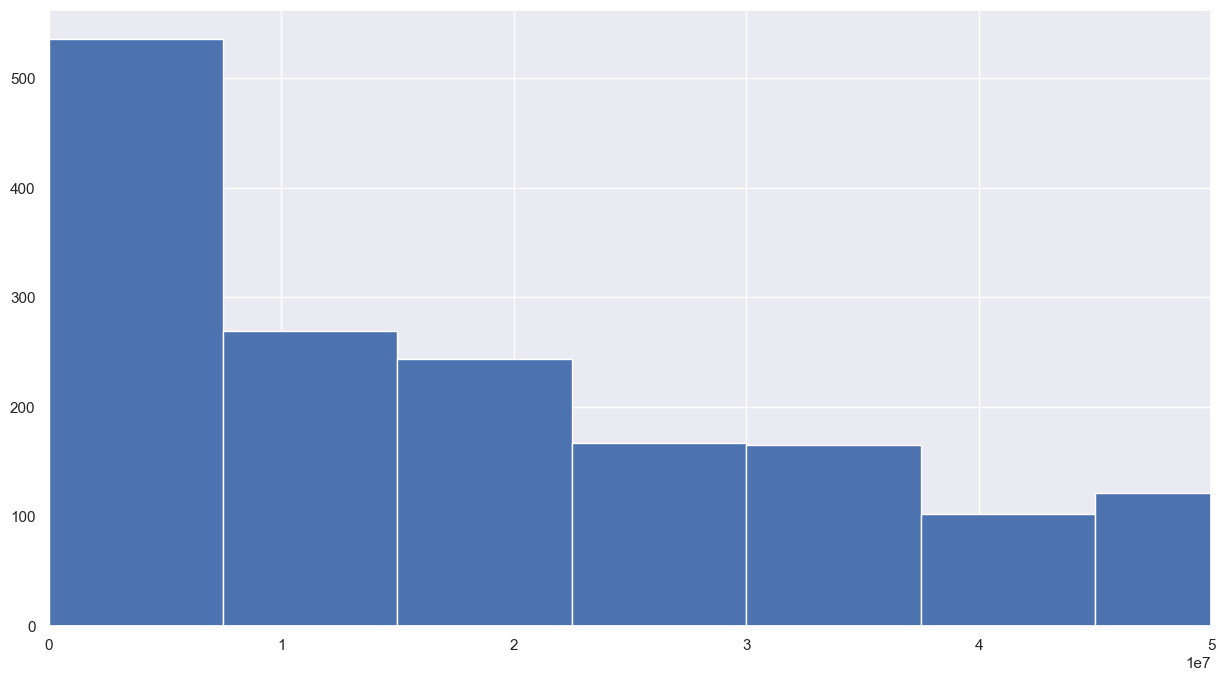

In [163]:
#Runs long! - 60s
#Histogram of total funding aquired by the startups - zoom on the values smaller than 50000000 (50 mln USD)

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_aq['price_amount'], bins = 20000)
ax.set_xlim(left=0, right=50000000);

### 2.4.3 Aquisitions over time and by market

Companies that were aquired, 5 top industries highlighted

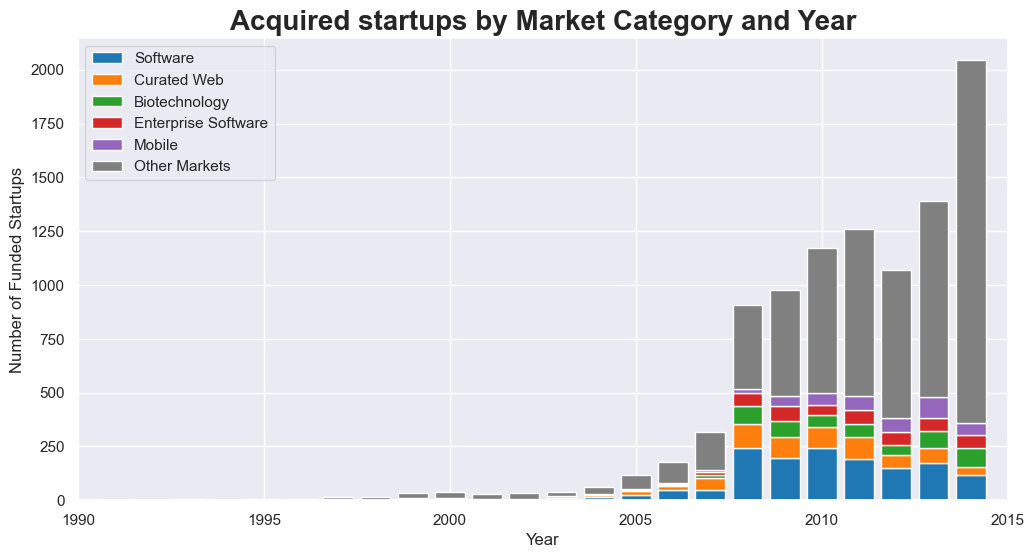

In [164]:
market_counts = df_aq.groupby([df_aq["acquired_at"].dt.year, "company_market"])["company_name"].count().unstack(fill_value=0)

top_10_markets = market_counts.sum().nlargest(5).index.tolist()

for market in top_10_markets:
    market_counts[market] = market_counts[market] if market in market_counts.columns else 0
market_counts["Other"] = market_counts.sum(axis=1) - market_counts[top_10_markets].sum(axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

market_colors = plt.get_cmap('tab10').colors
for i, market in enumerate(top_10_markets):
    ax.bar(market_counts.index, market_counts[market], bottom=market_counts[top_10_markets[:i]].sum(axis=1), color=market_colors[i], label=market)
ax.bar(market_counts.index, market_counts["Other"], bottom=market_counts[top_10_markets].sum(axis=1), color="gray", label="Other Markets")

ax.set_xlim(left=1990, right=2015)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Funded Startups")

ax.set_title("Acquired startups by Market Category and Year", fontdict={'fontsize': 20, 'fontweight': 'bold', 'verticalalignment': 'baseline'}, loc='center')

ax.legend()

plt.show()



Similar trends to previous sections can be observed - most acquired companies are from Software market, and the top 5 market consitutes a great part of all of the acquisitions.

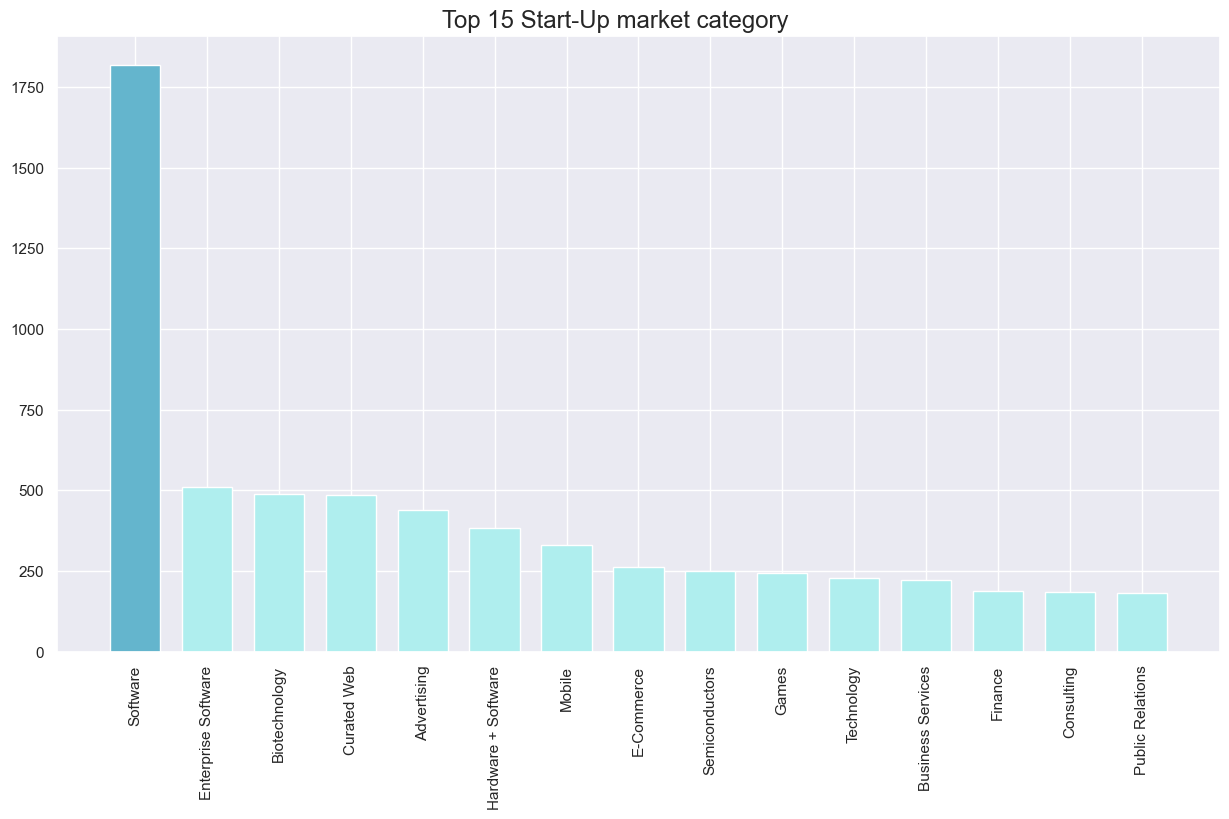

In [165]:
plt.rcParams['figure.figsize'] = 15,8

height = df_aq['acquirer_market'].value_counts()[:15].tolist()
bars =  df_aq['acquirer_market'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 15 Start-Up market category", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

Altough the trends observed on the graph above are similar to the previous sections, what is worth noting is that software companies are acquired significantly more often than others.

### 2.4.4 Acquisitions in different countries

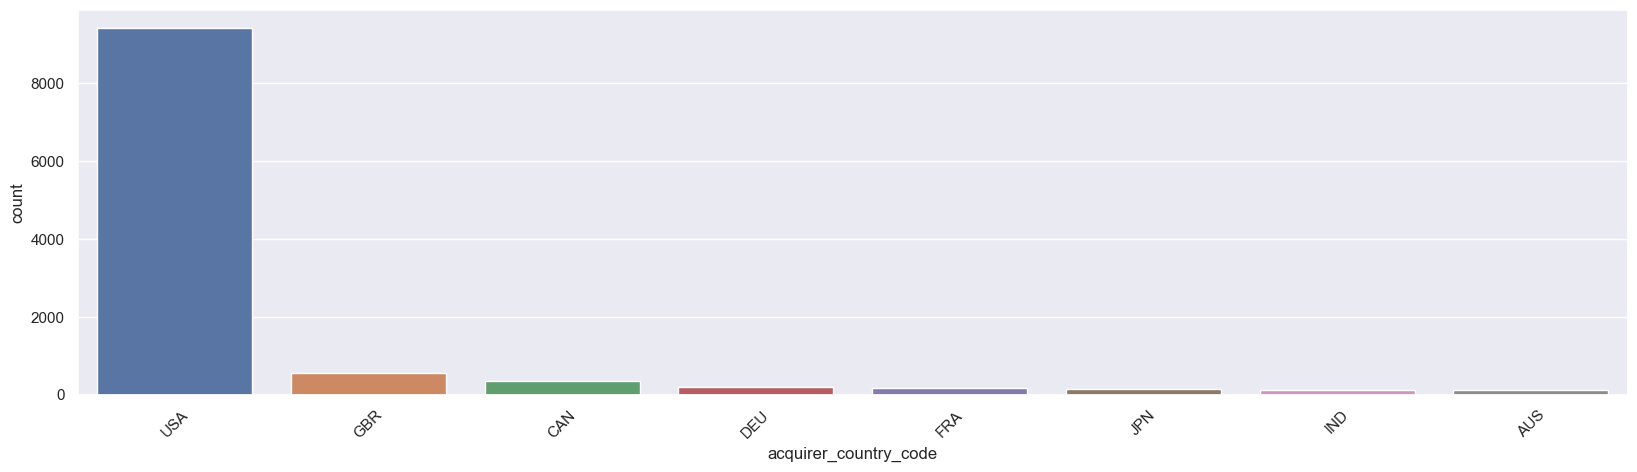

In [166]:
#Country
plt.figure(figsize=(20,5))
sns.countplot(x ='acquirer_country_code', data = df_aq, order=df_aq['acquirer_country_code'].value_counts().iloc[:8].index)
plt.xticks(rotation=45)
plt.show()

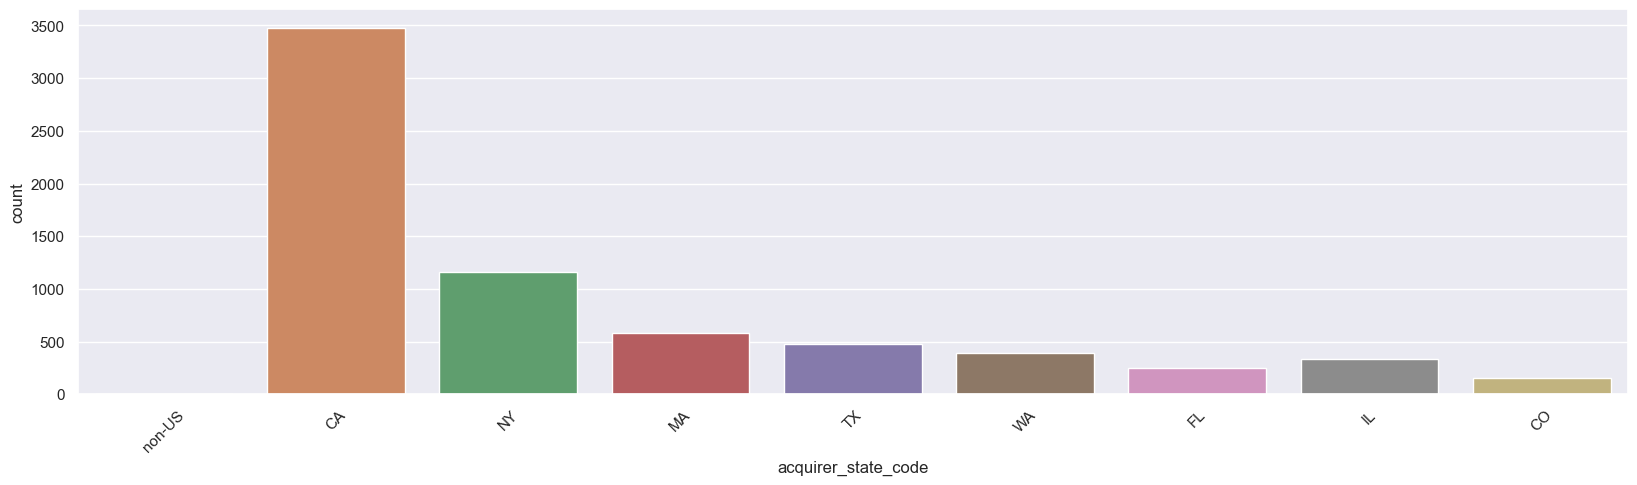

In [167]:
plt.figure(figsize=(20,5))
g = sns.countplot(x ='acquirer_state_code', data = df_aq[(df_aq['acquirer_country_code'] =='USA')], order=df_org['state_code'].value_counts().iloc[:9].index)
plt.xticks(rotation=45)
plt.show()

Similar to parts 2.1 and 2.2, the US is the country in which most start-ups are founded. California leads by a great margin compared to the other states in the US.

### 2.4.5 Aquisitions over quarters

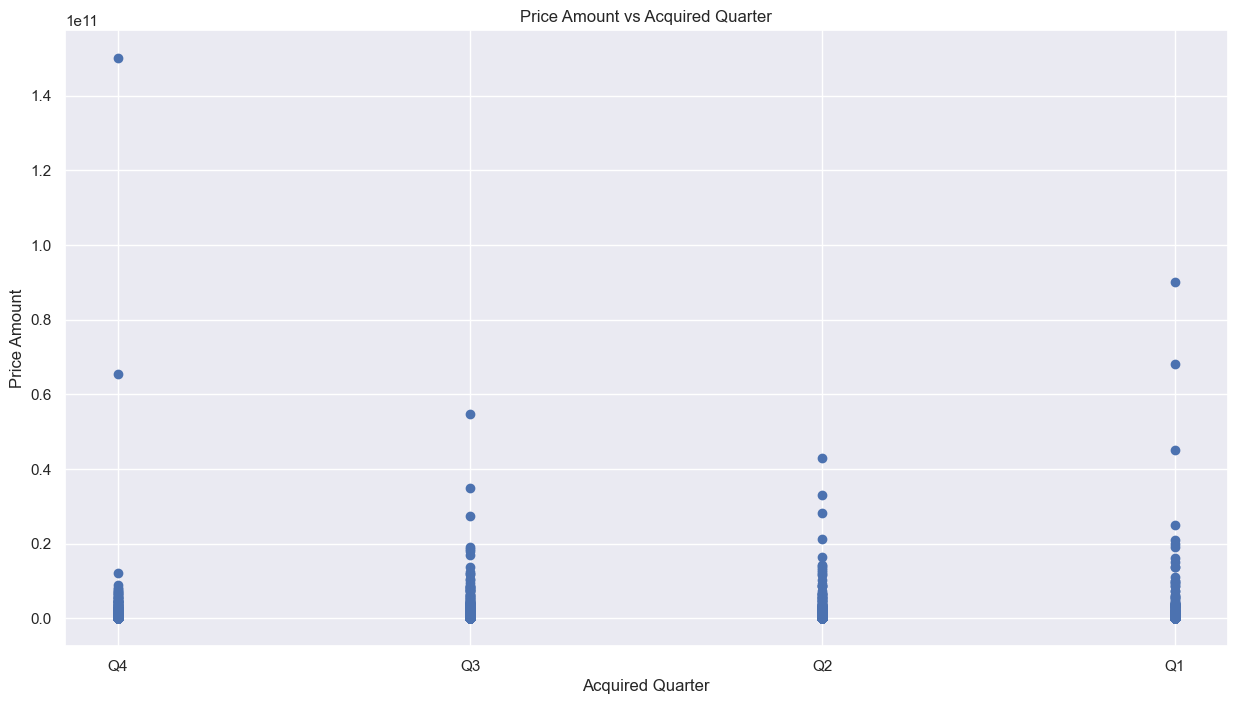

In [168]:
df_aq['acquired_quarter'] = df_aq['acquired_quarter'].astype(str)

plt.scatter(df_aq['acquired_quarter'], df_aq['price_amount'])
plt.xlabel('Acquired Quarter')
plt.ylabel('Price Amount')
plt.title('Price Amount vs Acquired Quarter')
plt.show()

Text(0.5, 1.0, 'target boxplot')

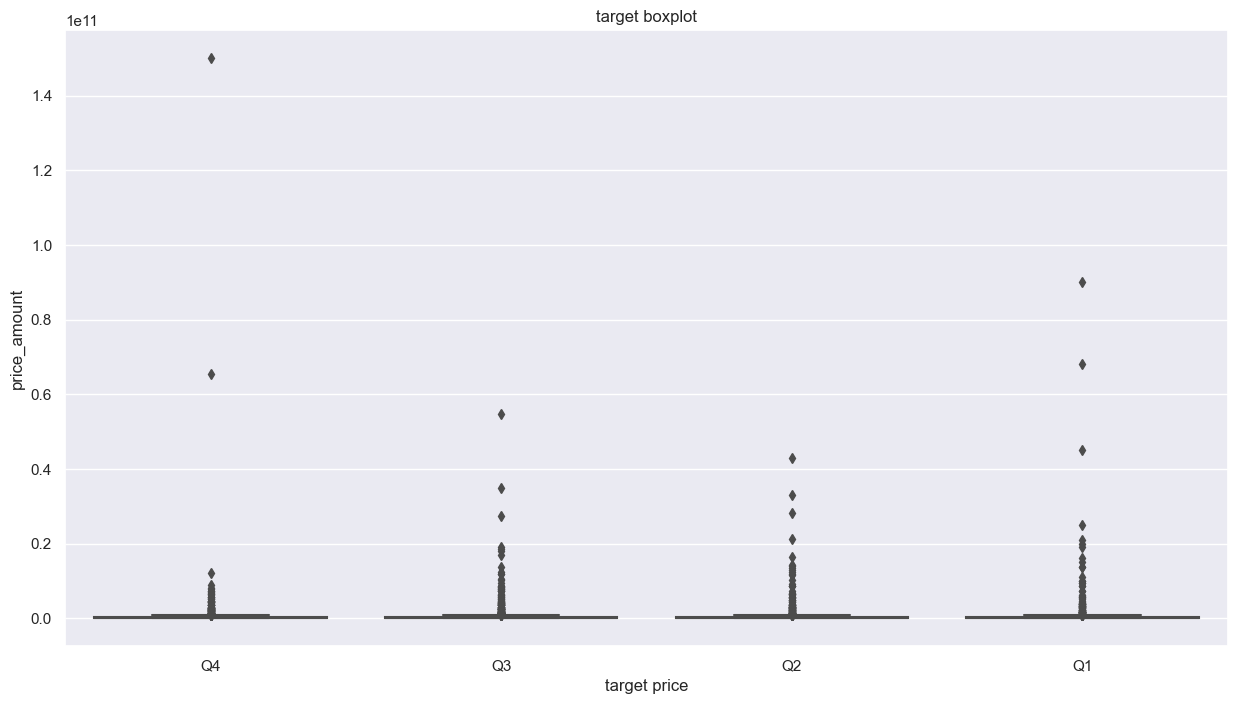

In [169]:
sns.boxplot(x='acquired_quarter', y="price_amount", data=df_aq)
plt.xlabel('target price')
plt.title("target boxplot")



In [170]:
df_aq.groupby(df_aq["acquired_quarter"])["price_amount"].mean()

acquired_quarter
Q1    9.111186e+08
Q2    6.735102e+08
Q3    7.294712e+08
Q4    6.798954e+08
Name: price_amount, dtype: float64

As seen above, the transaction prices are quite similar in case of quarters 2-4, but in the first quarter the mean acquistion price is much higher.

In [171]:
df_aq.groupby(df_aq["acquired_month"])["price_amount"].mean()

acquired_month
01    7.508985e+08
02    1.073608e+09
03    9.964317e+08
04    5.143202e+08
05    8.096348e+08
06    6.655366e+08
07    7.547915e+08
08    8.056856e+08
09    6.396868e+08
10    8.017209e+08
11    7.839094e+08
12    4.386864e+08
Name: price_amount, dtype: float64

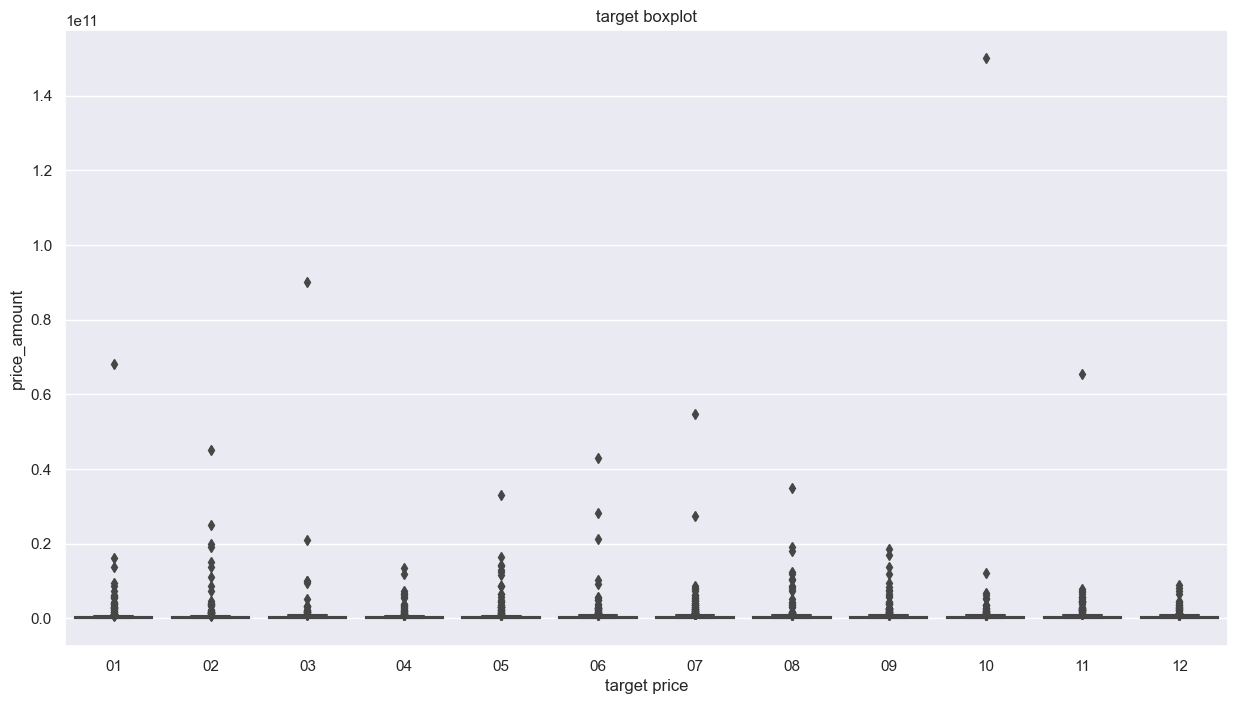

In [172]:
month_order = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
sns.boxplot(x='acquired_month', y="price_amount", data=df_aq, order=month_order)
plt.xlabel('target price')
plt.title("target boxplot")
plt.show()

# 3. Exploratory Data Analysis - Merged Data Set (df_full)

In the previous section, the four data sets were analyzed individually. After that, the EDA on merged data was conducted (following the code below). Due to the problematic interpreatation of the merged data set (one company can be present in many rows) it was decided that this part is of less importance and should be regarded as an additional material.

So, the following section is quite similar to section 2 in regards to the data exploration. No significant differences important for understanding the data set and future feature engineering were noticed.

In [173]:
#Take a look at the data:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105118 entries, 0 to 105117
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   permalink                105118 non-null  object        
 1   name                     105118 non-null  object        
 2   homepage_url             101731 non-null  object        
 3   category_list            102927 non-null  object        
 4   market                   105118 non-null  object        
 5   funding_total_usd        105118 non-null  int64         
 6   status                   105118 non-null  object        
 7   country_code             100162 non-null  object        
 8   state_code               105118 non-null  object        
 9   region                   100162 non-null  object        
 10  city                     99398 non-null   object        
 11  funding_rounds           105118 non-null  int64         
 12  founded_at      

In [174]:
df_full.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_market,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,acquired_quarter,acquired_year,price_amount,price_currency_code,investor_permalink,investor_name,investor_country_code,investor_region,investor_city
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30 00:00:00,2012-06-30 00:00:00,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,Unknown,2012-06-30,6.0,2.0,2012.0,1750000.0,/organization/magnify,Waywire Networks,|Curated Web|Video|,Curated Web,USA,NY,New York City,New York,2013-10-17,10.0,4.0,2013.0,NaN,USD,/organization/afsquare,AFSquare,USA,Los Angeles,Culver City
1,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30 00:00:00,2012-06-30 00:00:00,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,Unknown,2012-06-30,6.0,2.0,2012.0,1750000.0,/organization/magnify,Waywire Networks,|Curated Web|Video|,Curated Web,USA,NY,New York City,New York,2013-10-17,10.0,4.0,2013.0,NaN,USD,/organization/first-round-capital,First Round,USA,SF Bay Area,San Francisco
2,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30 00:00:00,2012-06-30 00:00:00,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,Unknown,2012-06-30,6.0,2.0,2012.0,1750000.0,/organization/magnify,Waywire Networks,|Curated Web|Video|,Curated Web,USA,NY,New York City,New York,2013-10-17,10.0,4.0,2013.0,NaN,USD,/organization/innovation-endeavors,Innovation Endeavors,USA,SF Bay Area,Palo Alto
3,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,non-US,Tallinn,Tallinn,1,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09 00:00:00,2012-08-09 00:00:00,/funding-round/f06b420775f7cb6c1541a9db526534bb,seed,Unknown,2012-08-09,8.0,3.0,2012.0,40000.0,None,None,None,None,None,None,None,None,NaT,NaN,NaN,NaN,0.0,None,/organization/start-up-chile,Start-Up Chile,CHL,Santiago,Santiago
4,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,non-US,London,London,1,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01 00:00:00,2011-04-01 00:00:00,/funding-round/33c3f135f05d7b734b8d7b7c8ae82647,seed,Unknown,2011-04-01,4.0,2.0,2011.0,1500000.0,None,None,None,None,None,None,None,None,NaT,NaN,NaN,NaN,0.0,None,None,None,None,None,None


In [175]:
df_full.shape

(105118, 45)

In [176]:
#Total number of startups
len(df_full['name'].unique())

37346

#### Change the data types and the notation

In [177]:
#Change the format to avoid printing numbers in a scientific format
pd.options.display.float_format = '{:.2f}'.format

#### Descriptive statistics

In [178]:
df_full.describe()

,funding_total_usd,funding_rounds,founded_year,funded_month,funded_quarter,funded_year,raised_amount_usd,acquired_month,acquired_quarter,acquired_year,price_amount
count,105118.00,105118.00,105118.00,105112.00,105112.00,105112.00,93587.00,13327.00,13327.00,13327.00,96956.00
mean,38299156.48,3.17,2007.16,6.33,2.46,2010.84,12000468.50,6.63,2.55,2011.49,29167746.83
std,130510958.01,2.26,4.69,3.44,1.11,2.87,47006881.93,3.39,1.10,2.33,1375263148.98
min,0.00,1.00,1990.00,1.00,1.00,1960.00,0.00,1.00,1.00,1987.00,0.00
25%,1131562.50,1.00,2004.00,3.00,1.00,2009.00,846057.50,4.00,2.00,2010.00,0.00
50%,8800000.00,3.00,2008.00,6.00,2.00,2012.00,3860000.00,7.00,3.00,2012.00,0.00
75%,36962500.00,4.00,2011.00,9.00,3.00,2013.00,12000000.00,10.00,4.00,2013.00,0.00
max,5700000000.00,18.00,2014.00,12.00,4.00,2015.00,3500000000.00,12.00,4.00,2014.00,150000000000.00


#### Correlation plot

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\1409999165.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_full.corr(),annot=True,cmap='cubehelix_r')


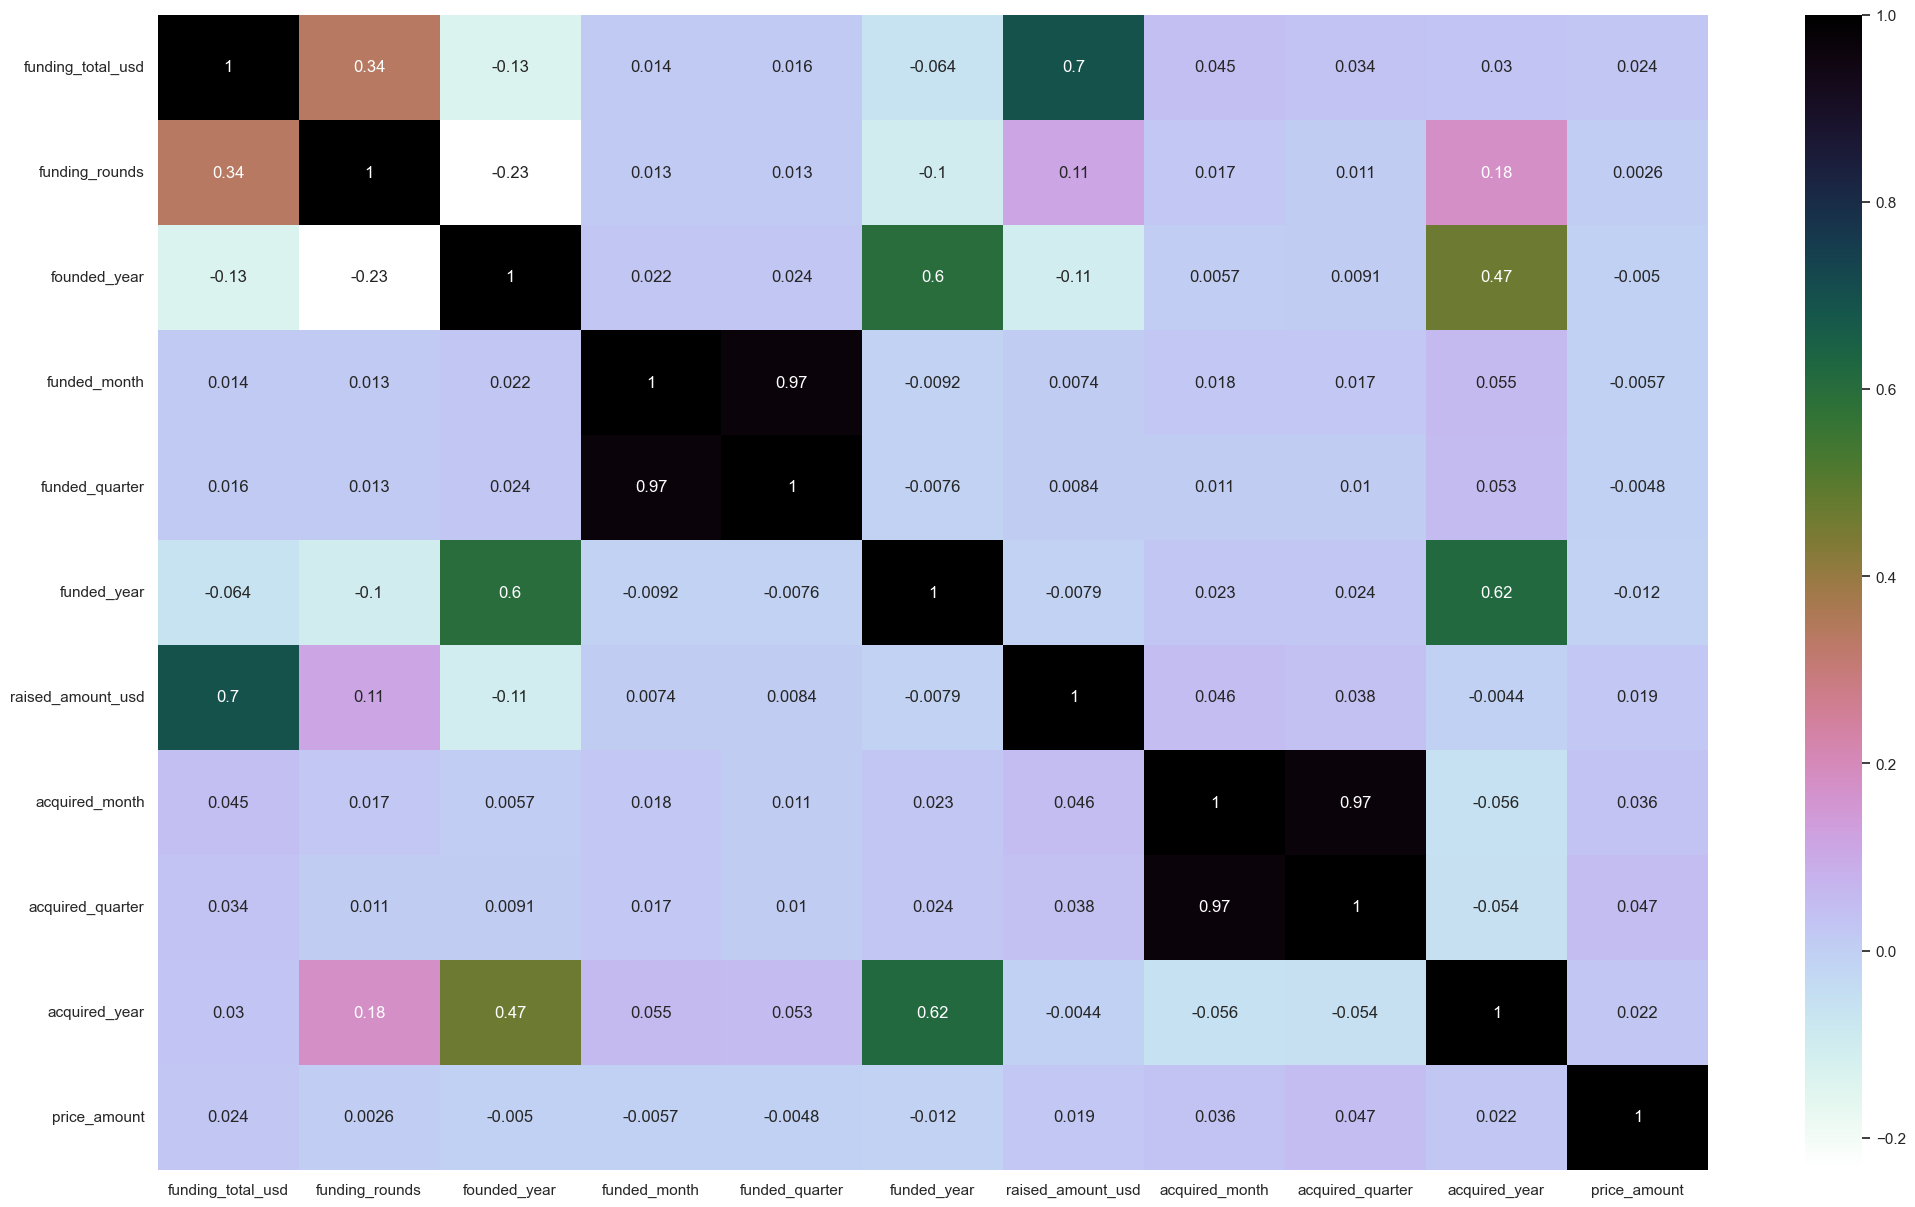

In [179]:
plt.figure(figsize=(25,15)) 
sns.heatmap(df_full.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

#### Funding aquired by the startups

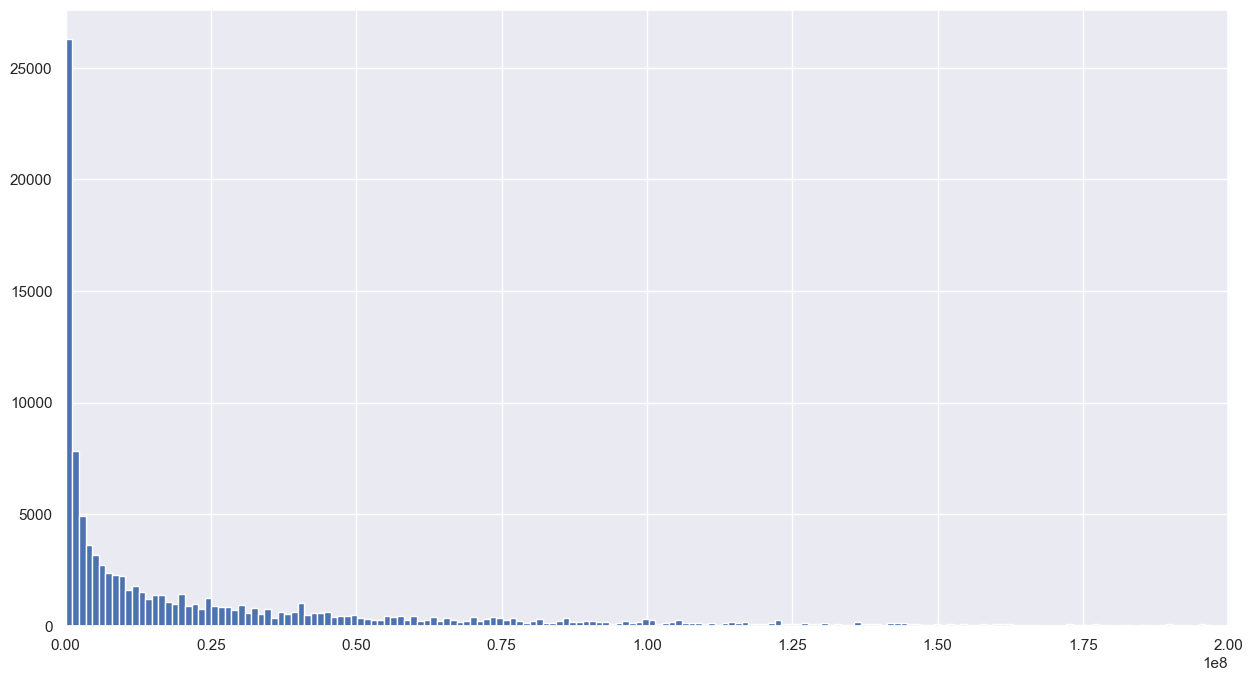

In [180]:
#Histogram of total funding aquired by the startups

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_full['funding_total_usd'], bins = 5000)
ax.set_xlim(left=0, right=200000000);

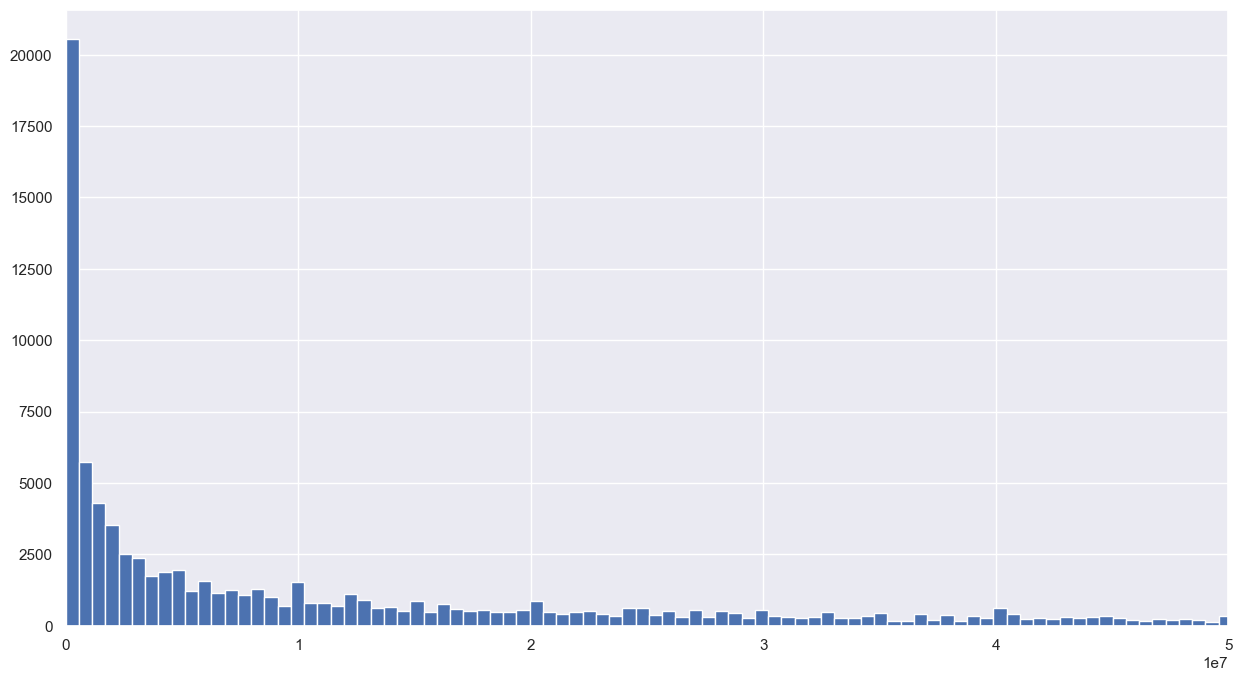

In [181]:
#Histogram of total funding aquired by the startups - zoom on the values smaller than 50000000

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_full['funding_total_usd'], bins = 10000)
ax.set_xlim(left=0, right=50000000);

#### Top startups

In [182]:
pd.set_option('display.max_columns', None)

#### Status of the start-ups

In [183]:
df_full['status'].value_counts()

operating    86110
acquired     13232
closed        4033
Unknown       1743
Name: status, dtype: int64

#### Total funding by the market

In [184]:
len(df_full['market'].unique())

735

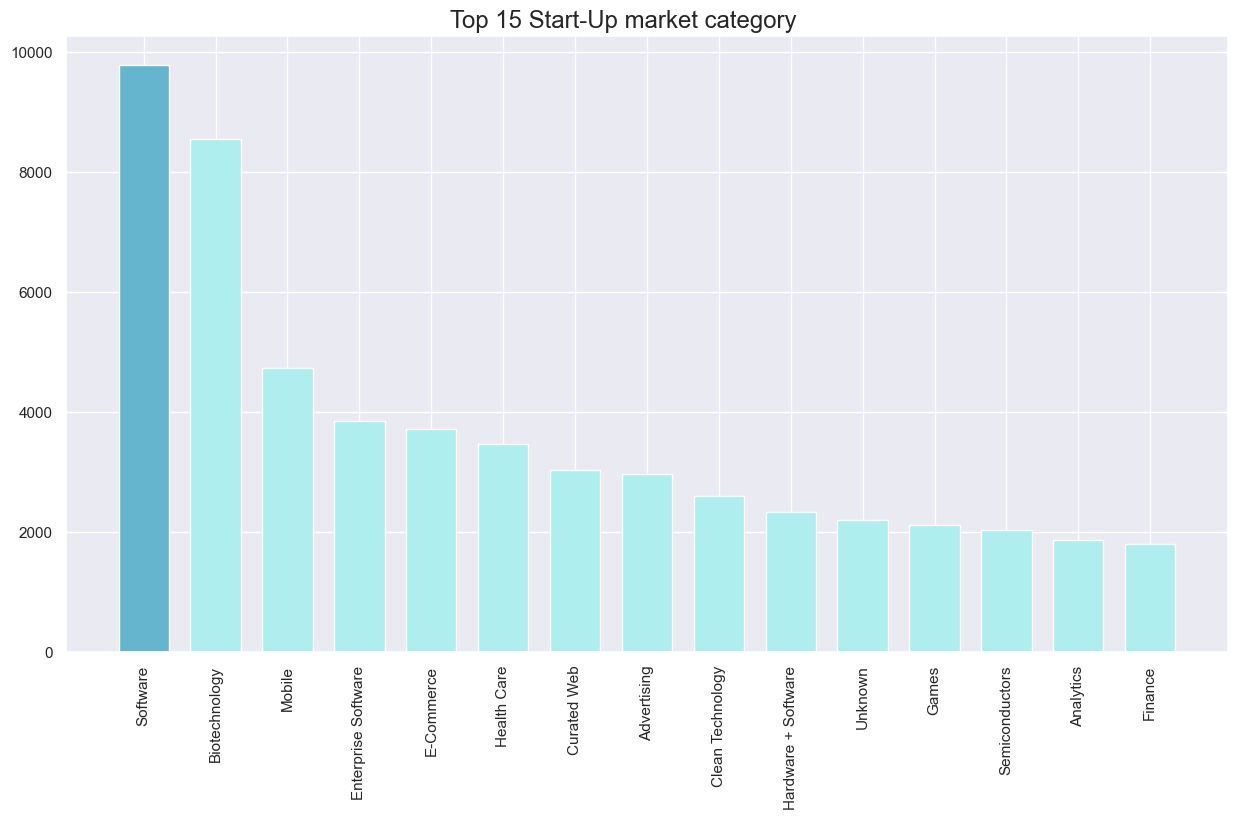

In [185]:
plt.rcParams['figure.figsize'] = 15,8

height = df_full['market'].value_counts()[:15].tolist()
bars =  df_full['market'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 15 Start-Up market category", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

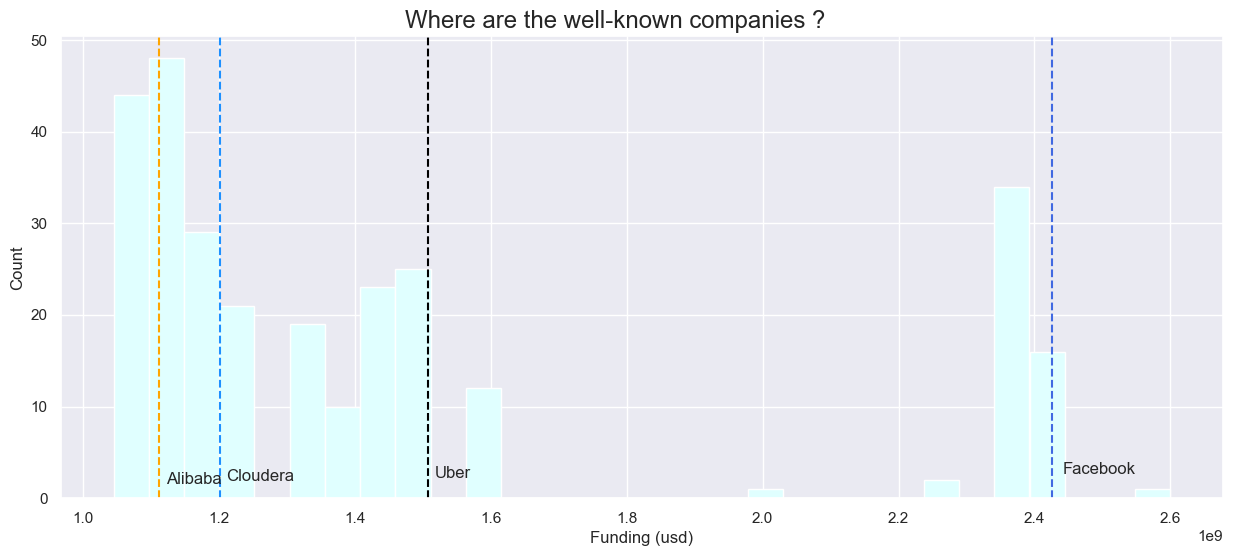

In [186]:
Facebook_total_funding = df_full['funding_total_usd'][df_full['name']=="Facebook"].values[0]
Uber_total_funding = df_full['funding_total_usd'][df_full['name']=="Uber"].values[0]
Alibaba_total_funding = df_full['funding_total_usd'][df_full['name']=="Alibaba"].values[0]
Cloudera_total_funding = df_full['funding_total_usd'][df_full['name']=="Cloudera"].values[0]

plt.rcParams['figure.figsize'] = 15,6

plt.hist(df_full['funding_total_usd'][(df_full['funding_total_usd'] >= 1000000000)&(df_full['funding_total_usd'] <= 3000000000)].dropna(), bins=30,color = 'lightcyan' )
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Where are the well-known companies ? ", fontdict=None, position= [0.48,1.05], size = 'x-large')

plt.axvline(Facebook_total_funding,color='royalblue',linestyle ="--")
plt.text(Facebook_total_funding+15000000, 2.6,"Facebook")

plt.axvline(Uber_total_funding,color='black',linestyle ="--")
plt.text(Uber_total_funding+10000000, 2.2,"Uber")

plt.axvline(Cloudera_total_funding,color='dodgerblue',linestyle ="--")
plt.text(Cloudera_total_funding+10000000, 1.9,"Cloudera")

plt.axvline(Alibaba_total_funding,color='orange',linestyle ="--")
plt.text(Alibaba_total_funding+10000000, 1.6,"Alibaba")
#plt.ticklabel_format(style='plain')



plt.show()

#### How was the distribution of the funding given the economic events

In [187]:
df_full['founded_at'] = pd.to_datetime(df_full['founded_at'])

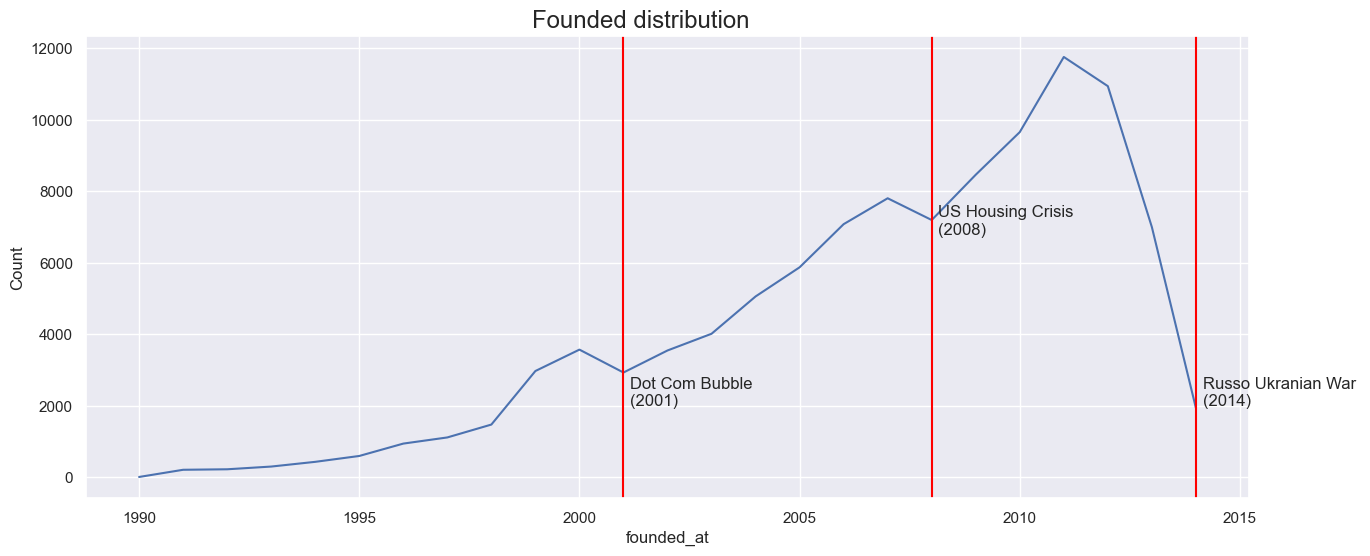

In [188]:
plt.rcParams['figure.figsize'] = 15,6
df_full['name'].groupby(df_full["founded_at"].dt.year).count().plot(kind="line")

plt.ylabel('Count')
plt.title("Founded distribution ", fontdict=None, position= [0.48,1.05], size = 'x-large')

plt.axvline(2008,color='red')
plt.text(2008+0.15, 6800,"US Housing Crisis \n(2008)")

plt.axvline(2001,color='red')
plt.text(2001+0.15, 2000,"Dot Com Bubble \n(2001)")

plt.axvline(2014,color='red')
plt.text(2014+0.15, 2000,"Russo Ukranian War \n(2014)")
plt.show()

### When the companies were founded?

In [189]:
df_full['founded_at'] = pd.to_datetime(df_full['founded_at'], errors = 'coerce' )

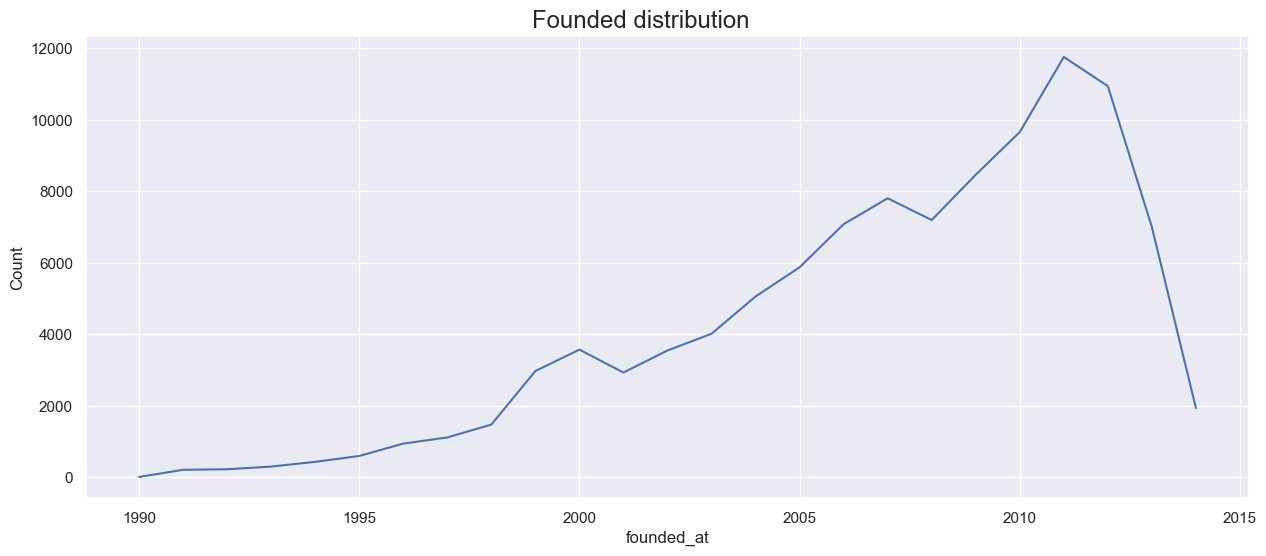

In [190]:
plt.rcParams['figure.figsize'] = 15,6
df_full['name'].groupby(df_full["founded_at"].dt.year).count().plot(kind="line")

plt.ylabel('Count')
plt.title("Founded distribution ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [191]:
Facebook_founded_year = df_full['founded_at'][df_full['name']=="Facebook"].dt.year.values[0]
Uber_founded_year  = df_full['founded_at'][df_full['name']=="Uber"].dt.year.values[0]
Alibaba_founded_year  = df_full['founded_at'][df_full['name']=="Alibaba"].dt.year.values[0]

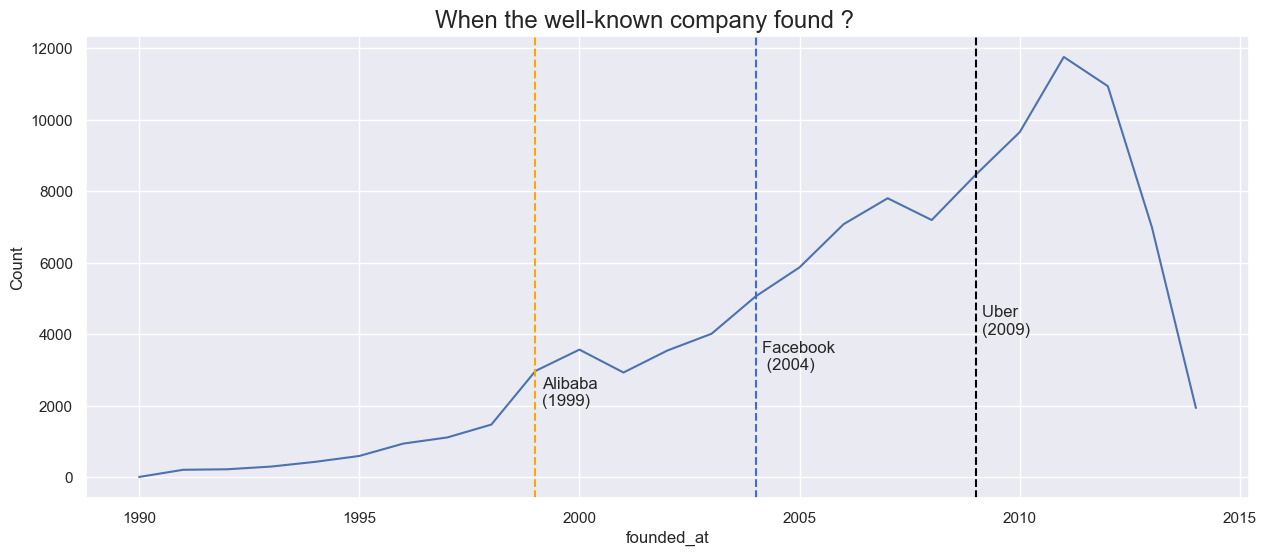

In [192]:
plt.rcParams['figure.figsize'] = 15,6
df_full['name'][df_full["founded_at"].dt.year >= 1990].groupby(df_full["founded_at"].dt.year).count().plot(kind="line")
plt.ylabel('Count')

plt.axvline(Facebook_founded_year,color='royalblue',linestyle ="--")
plt.text(Facebook_founded_year+0.15, 3000,"Facebook \n (2004)")

plt.axvline(Uber_founded_year,color='black',linestyle ="--")
plt.text(Uber_founded_year+0.15, 4000,"Uber \n(2009)")

plt.axvline(Alibaba_founded_year,color='orange',linestyle ="--")
plt.text(Alibaba_founded_year+0.15, 2000,"Alibaba \n(1999)")


plt.title("When the well-known company found ?", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

### The markets

In [193]:
df_full['count'] = 1
country_market = df_full[['count','country_code','market']].groupby(['country_code','market']).agg({'count': 'sum'})
# Change: groupby state_office and divide by sum
country_market_pct = country_market.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
country_market_pct.reset_index(inplace = True)

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\339824326.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  country_market_pct = country_market.groupby(level=0).apply(lambda x:


In [194]:
USA_market_pct = country_market_pct[country_market_pct['country_code'] == "USA"]
USA_market_pct = USA_market_pct.sort_values('count',ascending = False)[0:10]

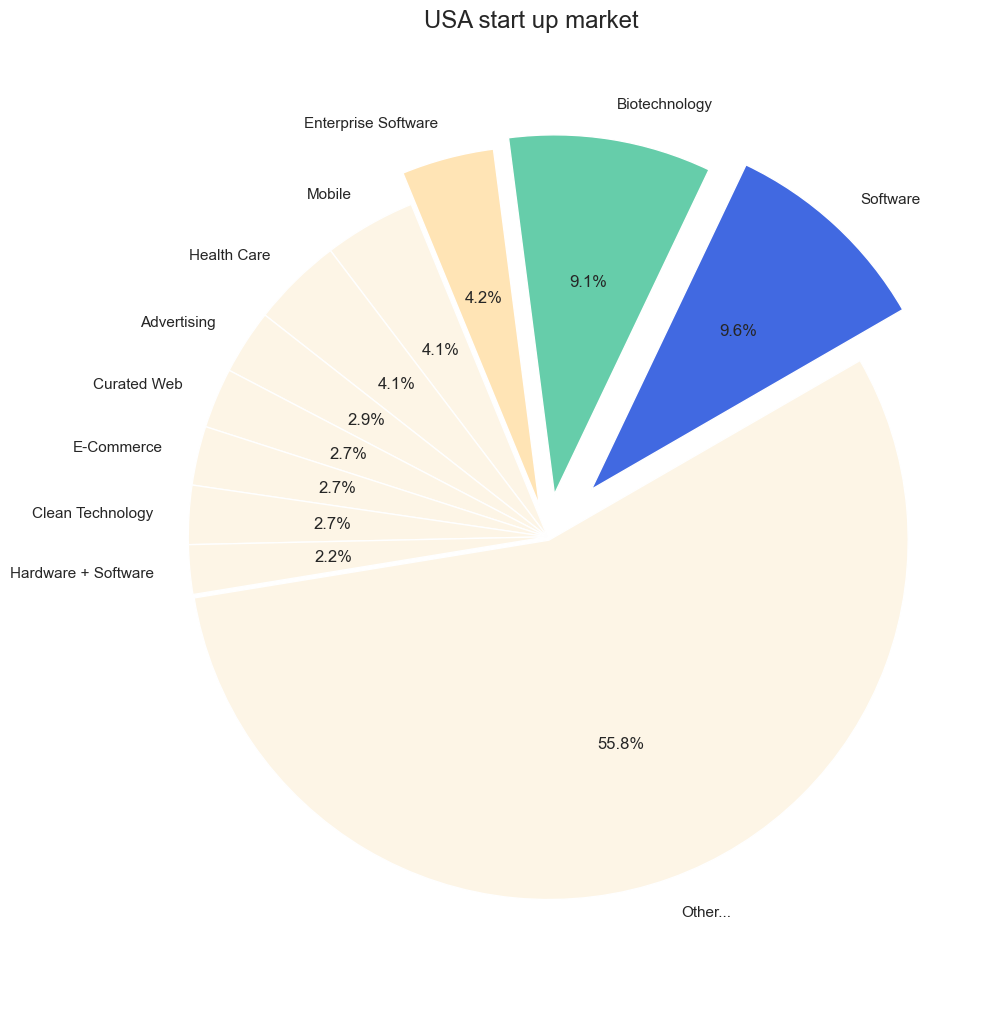

In [195]:
## USA
plt.rcParams['figure.figsize'] =10,10
labels = list(USA_market_pct['market'])+['Other...']
sizes = list(USA_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['royalblue','mediumaquamarine','moccasin'] +['oldlace']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("USA start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()


### How much money

In [196]:
#Create the df_grouped data frame which will be used for external data analysis
df_grouped = df_full.groupby(df_full["founded_at"].dt.year)["funding_total_usd"].sum()
df_grouped

founded_at
1990       205909500
1991      8953490873
1992      8124496204
1993     18156978353
1994     17182855470
1995     26094902526
1996     39523725874
1997     52680575088
1998     82790458412
1999    172572935207
2000    170329877278
2001    165264564277
2002    199447876238
2003    331341356153
2004    353613444639
2005    354330331164
2006    402234474688
2007    514961574380
2008    303228515521
2009    298738918046
2010    196667073021
2011    167548577101
2012    103066509209
2013     34044032836
2014      4827278382
Name: funding_total_usd, dtype: int64

In [197]:
#Top invested categories, can be compared with the graph above including the total number of startups
df_full.groupby('market').sum()['funding_total_usd'].sort_values(ascending=False).head()

C:\Users\piotr\AppData\Local\Temp\ipykernel_17832\1368089779.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_full.groupby('market').sum()['funding_total_usd'].sort_values(ascending=False).head()


market
Biotechnology       411769712980
Software            246871372336
Clean Technology    225492700809
Health Care         194058502970
E-Commerce          179912699691
Name: funding_total_usd, dtype: int64

### Country Analyses

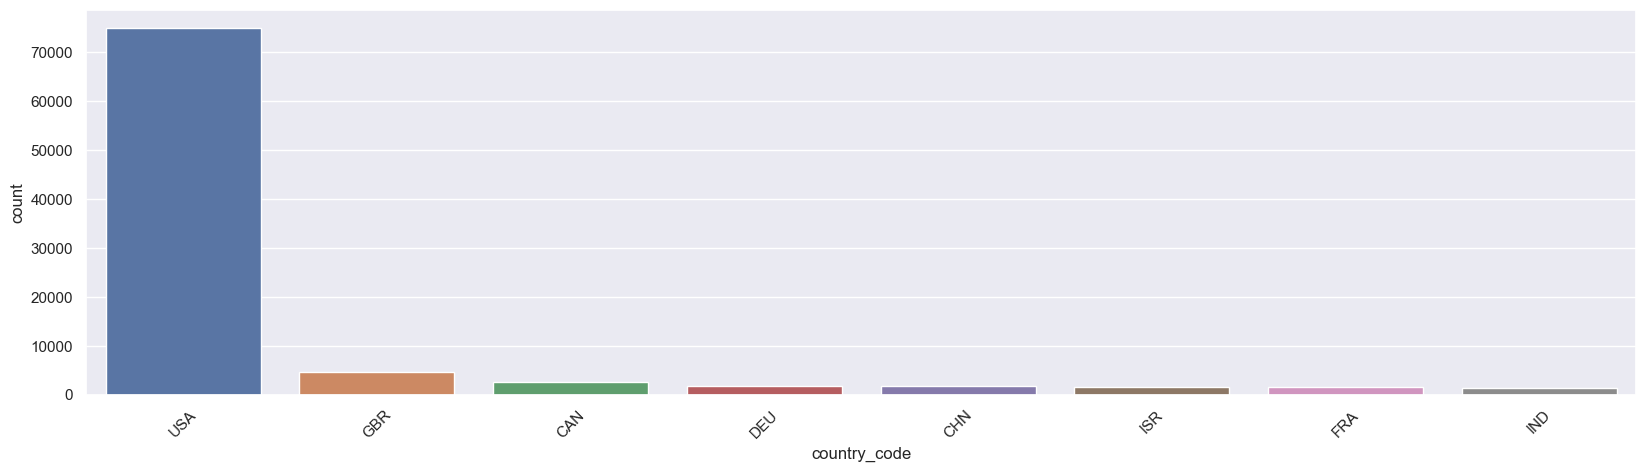

In [198]:
#Country
plt.figure(figsize=(20,5))
sns.countplot(x ='country_code', data = df_full, order=df_full['country_code'].value_counts().iloc[:8].index)
plt.xticks(rotation=45)
plt.show()

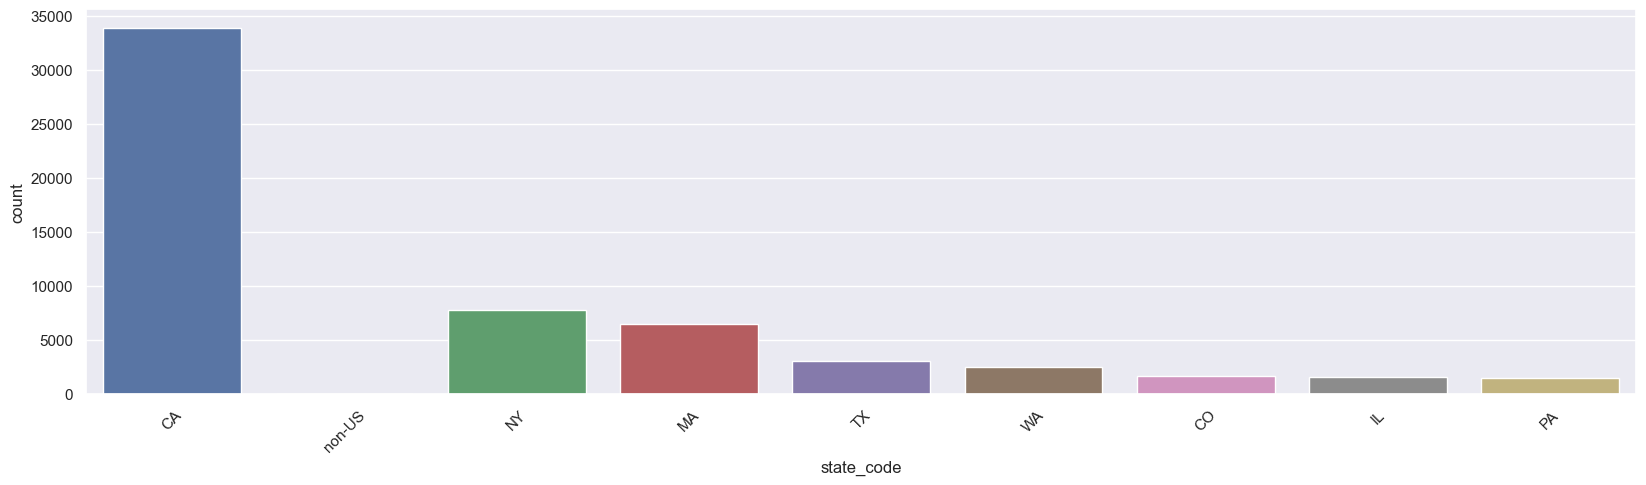

In [199]:
plt.figure(figsize=(20,5))
g = sns.countplot(x ='state_code', data = df_full[(df_full['country_code'] =='USA')], order=df_full['state_code'].value_counts().iloc[:9].index)
plt.xticks(rotation=45)
plt.show()

### Markets

In [202]:
# fig,axes = plt.subplots(1,1,figsize=(20,5))
# sns.countplot(df_full.market, order = df_full.market.value_counts()[:20].index)
# plt.xticks(rotation = 50)
# plt.show()